### Import Python Libraries  

In [355]:
import pandas as pd
import numpy as np
from statistics import mean, stdev

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Import Dataset

In [2]:
train_relative_path = 'datasets/train.csv'
df = pd.read_csv(train_relative_path)

### Data Inspection

In [3]:
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
df.shape

(2051, 81)

#### Column Inspection
|column|dtype|nulls|nunique|unique|vtype||
|:--|:-:|:-:|:--|:--|---|--:|
|**Id**|int64|0|2051|Continuous|Continuous|
|**PID**|int64|0|2051|Continuous|Continuous|
|**MS SubClass**|int64|0|16|[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]|Nominal|
|**MS Zoning**|object|0|7|['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']|Nominal|
|**Lot Frontage**|float64|330|118|Continuous|Continuous|
|**Lot Area**|int64|0|1476|Continuous|Continuous|
|**Street**|object|0|2|['Pave' 'Grvl']|Nominal|
|**Alley**|object|1911|2|[nan 'Pave' 'Grvl']|Nominal|
|**Lot Shape**|object|0|4|['IR1' 'Reg' 'IR2' 'IR3']|Ordinal|
|**Land Contour**|object|0|4|['Lvl' 'HLS' 'Bnk' 'Low']|Nominal|
|**Utilities**|object|0|3|['AllPub' 'NoSeWa' 'NoSewr']|Ordinal|
|**Lot Config**|object|0|5|['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']|Nominal|
|**Land Slope**|object|0|3|['Gtl' 'Sev' 'Mod']|Ordinal|
|**Neighborhood**|object|0|28|['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale', 'CollgCr', 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor', 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr', 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']|Nominal|
|**Condition 1**|object|0|9|['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']|Nominal|
|**Condition 2**|object|0|8|['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']|Nominal|
|**Bldg Type**|object|0|5|['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']|Nominal|
|**House Style**|object|0|8|['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']|Nominal|
|**Overall Qual**|int64|0|10|[ 6  7  5  8 10  4  9  3  2  1]|Ordinal|
|**Overall Cond**|int64|0|9|[8 5 7 6 3 9 2 4 1]|Ordinal|
|**Year Built**|int64|0|113|Continuous|Continuous|
|**Year Remod/Add**|int64|0|61|[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989 1991 1986 1982 1983 1974]|Continuous|
|**Roof Style**|object|0|6|['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']|Nominal|
|**Roof Matl**|object|0|6|['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']|Nominal|
|**Exterior 1st**|object|0|15|['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng' 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc' 'AsphShn']|Nominal|
|**Exterior 2nd**|object|0|15|['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd' 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock' 'AsphShn']|Nominal|
|**Mas Vnr Type**|object|22|4|['BrkFace' 'None' nan 'Stone' 'BrkCmn']|Nominal|
|**Mas Vnr Area**|float64|22|373|Continuous|Continuous|
|**Exter Qual**|object|0|4|['Gd' 'TA' 'Ex' 'Fa']|Ordinal|
|**Exter Cond**|object|0|5|['TA' 'Gd' 'Fa' 'Ex' 'Po']|Ordinal|
|**Foundation**|object|0|6|['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']|Nominal|
|**Bsmt Qual**|object|55|5|['TA' 'Gd' 'Fa' nan 'Ex' 'Po']|Ordinal|
|**Bsmt Cond**|object|55|5|['TA' 'Gd' nan 'Fa' 'Po' 'Ex']|Ordinal|
|**Bsmt Exposure**|object|58|4|['No' 'Gd' 'Av' nan 'Mn']|Ordinal|
|**BsmtFin Type 1**|object|55|6|['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']|Ordinal|
|**BsmtFin SF 1**|float64|1|821|Continuous|Continuous|
|**BsmtFin Type 2**|object|56|6|['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']|Ordinal|
|**BsmtFin SF 2**|float64|1|205|Continuous|Continuous|
|**Bsmt Unf SF**|float64|1|967|Continuous|Continuous|
|**Total Bsmt SF**|float64|1|892|Continuous|Continuous|
|**Heating**|object|0|5|['GasA' 'GasW' 'Grav' 'Wall' 'OthW']|Nominal|
|**Heating QC**|object|0|5|['Ex' 'TA' 'Gd' 'Fa' 'Po']|Ordinal|
|**Central Air**|object|0|2|['Y' 'N']|Nominal|
|**Electrical**|object|0|5|['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']|Ordinal|
|**1st Flr SF**|int64|0|915|Continuous|Continuous|
|**2nd Flr SF**|int64|0|504|Continuous|Continuous|
|**Low Qual Fin SF**|int64|0|31|[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234  390  697  114  512  144  514  397  140  479  259  436  156  384  360   53  362  450]|Ordinal|
|**Gr Liv Area**|int64|0|1053|Continuous|Continuous|
|**Bsmt Full Bath**|float64|2|4|[ 0.  1.  2. nan  3.]|Discrete|
|**Bsmt Half Bath**|float64|2|3|[ 0.  1. nan  2.]|Discrete|
|**Full Bath**|int64|0|5|[2 1 3 0 4]|Discrete|
|**Half Bath**|int64|0|3|[1 0 2]|Discrete|
|**Bedroom AbvGr**|int64|0|8|[3 4 2 5 1 0 6 8]|Discrete|
|**Kitchen AbvGr**|int64|0|4|[1 2 0 3]|Discrete|
|**Kitchen Qual**|object|0|4|['Gd' 'TA' 'Fa' 'Ex']|Ordinal|
|**TotRms AbvGrd**|int64|0|14|[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]|Discrete|
|**Functional**|object|0|8|['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']|Ordinal|
|**Fireplaces**|int64|0|5|[0 1 2 4 3]|Discrete|
|**Fireplace Qu**|object|1000|5|[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']|Ordinal|
|**Garage Type**|object|113|6|['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']|Nominal|
|**Garage Yr Blt**|float64|114|100|Continuous|Continuous|
|**Garage Finish**|object|114|3|['RFn' 'Unf' 'Fin' nan]|Ordinal|
|**Garage Cars**|float64|1|6|[ 2.  1.  3.  0.  4.  5. nan]|Discrete|
|**Garage Area**|float64|1|514|Continuous|Continuous|
|**Garage Qual**|object|114|5|['TA' 'Fa' nan 'Gd' 'Ex' 'Po']|Ordinal|
|**Garage Cond**|object|114|5|['TA' 'Fa' nan 'Po' 'Gd' 'Ex']|Ordinal|
|**Paved Drive**|object|0|3|['Y' 'N' 'P']|Ordinal|
|**Wood Deck SF**|int64|0|322|Continuous|Continuous|
|**Open Porch SF**|int64|0|223|Continuous|Continuous|
|**Enclosed Porch**|int64|0|159|Continuous|Continuous|
|**3Ssn Porch**|int64|0|22|[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216  245 182 290  304]|Discrete|
|**Screen Porch**|int64|0|100|Continuous|Continuous|
|**Pool Area**|int64|0|10|[  0 519 576 800 228 480 648 738 368 561]|Discrete|
|**Pool QC**|object|2042|4|[nan 'Fa' 'Gd' 'Ex' 'TA']|Ordinal|
|**Fence**|object|1651|4|[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']|Ordinal|
|**Misc Feature**|object|1986|5|[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']|Nominal|
|**Misc Val**|int64|0|28|[    0   400   500  2000   650   600  1200   480   700   450  3000 12500  4500   460  3500  8300   455   300  1150   900    54  6500   800  1500  2500  1300 17000    80]|Discrete|
|**Mo Sold**|int64|0|12|[ 3  4  1  6  5  9  7  2 12 10 11  8]|Ordinal|
|**Yr Sold**|int64|0|5|[2010 2009 2006 2007 2008]|Ordinal|
|**Sale Type**|object|0|9|['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']|Nominal|
|**SalePrice**|int64|0|828|Continuous|Cintinuous|

--- 
---

# Data Cleaning (Initial)
- [ ] Are missing values imputed appropriately?
- [ ] Are distributions examined and described?
- [ ] Are outliers identified and addressed?
- [ ] Are appropriate summary statistics provided?
- [ ] Are steps taken during data cleaning and EDA framed appropriately?
- [ ] Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

### Columns Inspection Function 

In [5]:
# Function to Inspect Current df
def columns_info(df):
    columns_df = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                         'dtype': [df[col].dtype for col in df.keys()], 
                         'nunique_values': [df[col].nunique() for col in df.keys()], 
                         'unique_values': [df[col].unique()for col in df.keys()], 
                         'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                         index=[col for col in df.keys()])
    return columns_df

# Function to Inspect Column
def col_info(col):
    return pd.DataFrame({'nulls': df[col].isna().sum(), 
                         'dtype': df[col].dtype,
                         'nunique': df[col].nunique(), 
                         'unique_values': [df[col].unique()], 
                         'value_counts': [df[col].value_counts()]}, 
                         index=[col])

## Initial Data Cleanup

**Dropping Columns with more than 60% nulls**

In [6]:
# 5 columns being dropped
df.isna().sum().sort_values(ascending=False).head()

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
dtype: int64

In [7]:
df.dropna(axis=1, thresh=df.shape[0]/1.67, inplace=True)

**Dropping 'Id' Column**

In [8]:
df.drop(columns='Id', inplace=True)

**Dropping 'PID' Column**

In [9]:
df.drop(columns='PID', inplace=True)

**Renaming columns to Lowercase Snake Space**

In [10]:
df.columns = [col.lower().replace(' ','_') for col in df.columns]

**Renaming year_remod/add to year_remod_add**

In [11]:
df.rename(columns={'year_remod/add': 'year_remod_add'}, inplace=True)

**Imputing median bedroom number for 5 rows listed as 0 bedrooms**

In [12]:
df['bedroom_abvgr'] = df['bedroom_abvgr'].replace(0, df.bedroom_abvgr.median())

### Addressing Missing Values

**Lot Frontage:**  replacing nulls with median grouped by neighborhood

In [13]:
df.lot_frontage = df.groupby(['neighborhood'])['lot_frontage'].transform(lambda x: x.fillna(x.median()))

**Garage Condition, Quality, Finish, Type:**  

- garage with incorrect non null in garage_type corrected to 'NoGar'`

In [14]:
# df.loc[(df.garage_type.notnull()) & (df.garage_cond.isnull())]
df.garage_type.iloc[1712] = 'NoGar'

/Users/andrewdeemer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
# df.loc[(df.garage_type.notnull()) & (df.garage_cond.isnull())]['garage_type']

- replacing nulls as 'NoGar' as per dataset dictionary

In [16]:
df.garage_cond.fillna('NoGar', inplace=True)
df.garage_qual.fillna('NoGar', inplace=True)
df.garage_finish.fillna('NoGar', inplace=True)
df.garage_type.fillna('NoGar', inplace=True)

- replacing null in garage_yr_blt with median. I hypothesis all the garage variables have multicollinearity, so I will only use garage_area

In [17]:
df.garage_yr_blt.fillna(df.garage_yr_blt.median(), inplace=True)

**Basement Exposure, Type, Quality, Condition, Finish Type 1:** replacing all nulls with 'NoBas' as per dataset dictionary

In [18]:
df.bsmt_qual.fillna('NoBas', inplace=True)
df.bsmt_exposure.fillna('NoBas', inplace=True)
df.bsmtfin_type_2.fillna('NoBas', inplace=True)
df.bsmt_cond.fillna('NoBas', inplace=True)
df.bsmtfin_type_1.fillna('NoBas', inplace=True)

**Masonry Veneer Type & Area in Sq Feet:** replacing nulls with 'None'

In [19]:
df.mas_vnr_type.fillna('None', inplace=True)
df.mas_vnr_area.fillna('None', inplace=True)

**Deleting 6 rows (0.003% of data) with erroneous nulls**

In [20]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Addressing Outliers

**Dropping 2 ``gr_liv_area`` Outliers**

This feature is used in out baseline model. These two outliers improve the baseline model very slightly. 

In [21]:
df.drop(index=df.loc[df.gr_liv_area > 5000].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 2 ```year_built``` Outliers**

- These two outliers were in the years 1892 and 1893. 
- They were the only houses built in those years, and they were well about the average price of homes in years around them. 
- We included this ordinal feature in our model. So removing these two outliers will improve our model slightly. The std deviation of the models score was reduced by 0.001.


In [22]:
df.drop(index=df[df['year_built'] == 1892].index, inplace=True)
df.drop(index=df[df['year_built'] == 1893].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 2 ```garage_cars``` outliers**
- there is only a single house with a 5 car garage, so we will drop it in order to make fewer dummies and better represent the majority of houses
- one 4 car garage is a significant outlier, so we will drop this row 
- we include this discrete feature in our model. Removing these outliers improves their categories indications of Sale Price. 

In [23]:
df.drop(index=df[df.garage_cars == 5].index, inplace=True)
df.drop(index=df[df.garage_cars == df.garage_cars.max()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 1 ```foundation``` outlier**
- stone has one outlier skewing the distribution. I'm removing it to even it out. 

In [24]:
df.drop(index=df[df['foundation'] == 'Stone']['saleprice']
        .sort_values(ascending=False)
        .head(1)
        .index, 
        inplace=True
       )
df.reset_index(drop=True, inplace=True)

**Dropping 1 Fireplaces outliers**
- There is only one house with 4 fireplaces, so it is statistically insignificant. 

In [25]:
df.drop(index=df[df.fireplaces == 4].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 3 rows the have 0 or 3 kitchens**
- these rows are unrepresentative of most houses. Removing them will allow us to interpret the coefficient as the increase in sale price from 1 kitchen to 2

In [26]:
df.drop(index=df[(df.kitchen_abvgr == 0) | (df.kitchen_abvgr == 3)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 2 rows that have 3 basement full bathrooms**
- this will allow us to great dummies for houses with 0, 1, or 2 bathrooms and include the latter in our model

In [27]:
df.drop(index=df[df.bsmt_full_bath == 3].index, inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 1 outlier in Kitchen Quality group 'Gd'**

In [28]:
df.drop(df[df.kitchen_qual == 'Gd']['saleprice']
        .sort_values(ascending=False)
        .head(1)
        .index, 
        inplace=True)
df.reset_index(drop=True, inplace=True)

**Dropping 3 rows that have 0 extra rooms or 9 extra rooms**
- I created a column calculating extra rooms by the difference of total rooms - bedrooms
- these this allows me to have fewer groups and create fewer dummies
- I found their index while creating this new feature, and used iloc to drop the rows here so as to avoid problems with control flow and dropping rows below

In [29]:
df.drop(index=[342, 1539, 1644], inplace=True)
df.reset_index(drop=True, inplace=True)

**Converting ```garage_cars``` from float to int**
- I convert this column to float here because somewhere above I dropped a row where there was a null value and it was preventing me from converting the floats to int

In [30]:
df.garage_cars = [int(num) for num in df.garage_cars]

---
---

In [31]:
# def string_to_float(num):
#     try:
#         return float(num)
#     except:
#         return np.nan

In [32]:
# TEST: still required but it's late so double check 
# df.mas_vnr_area = [string_to_float(num) for num in df.mas_vnr_area]

---
---

# Baseline Model 
I chose to make the baseline model based on the General Living Area. It is the continuous feature with the highest correlation to the target. 

Searching for features that correlate most with the target. Overall quality correlates more, but it is a categorical variable. So I will use General Living Area. 

In [33]:
df.corr()['saleprice'].sort_values(ascending=False).head()

saleprice        1.000000
overall_qual     0.806369
gr_liv_area      0.723546
garage_cars      0.671551
total_bsmt_sf    0.667273
Name: saleprice, dtype: float64

In [34]:
X_base = df[['gr_liv_area']]
y_base = df['saleprice']

lm = LinearRegression()

lm.fit(X_base, y_base);

In [35]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c = 'red', label = 'model')

 Intercept: 3972.56 
 Coefficient: 118.63 
 R2 Score: 0.524


''

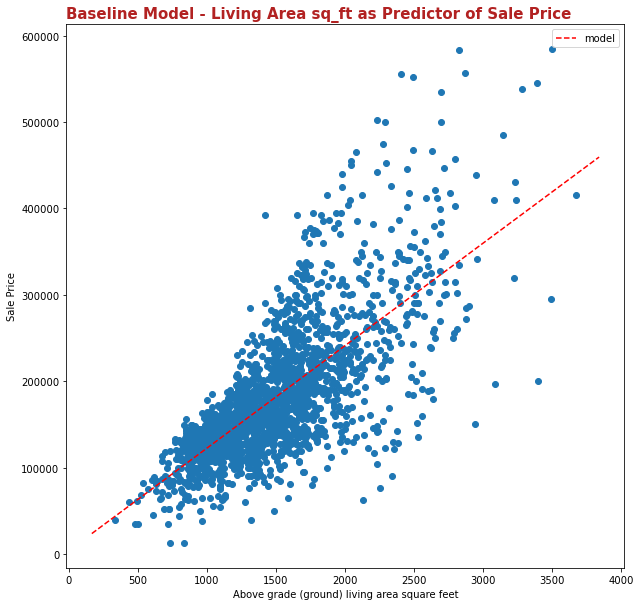

In [36]:
print(' Intercept:', round(lm.intercept_, 2), '\n',
      'Coefficient:', round(lm.coef_[0], 2), '\n',
      'R2 Score:', round(lm.score(X_base, y_base), 3)
     )

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['gr_liv_area'], df['saleprice'])

abline(lm.coef_, lm.intercept_)

ax.legend()
ax.set_xlabel('Above grade (ground) living area square feet')
ax.set_ylabel('Sale Price');
ax.set_title('Baseline Model - Living Area sq_ft as Predictor of Sale Price', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
;

### Linear Regression Model

I initialize my model here and create a function that allows me to add new features and compare the model to the baseline. 

I'm creating a list ```features``` to add features into as I do EDA and manufacture features. This way I can keep all information in the original dataframe to compare different features between one another and continue manufacturing features. Once I'm ready to fit my model I will pull these features from the original dataframe ```df```

In [37]:
# features list to append to with initial baseline feature 
features = ['gr_liv_area']

This function allows me to add features and test my model with cross validation while working through EDA

In [38]:
def comp_test_base(*feature): 
    for feat in feature: 
        features.append(feat)

# fitting linear regression model 
    X = df[list(features)]
    y = df['saleprice']

    linreg = LinearRegression(n_jobs=-1)

    linreg.fit(X, y)

    print('Base Score:', lm.score(X_base, y_base))
    print('Model Score:', linreg.score(X, y), '\n')
    print(features, '\n')

# running cross_val_score for baseline and my model 
    base_scores = cross_val_score(lm, X_base, y_base, cv=5)

    print('Base Cross val scores:', base_scores)
    print('Base Mean:', round(base_scores.mean(), 3))
    print('Base Stdev:', round(base_scores.std(), 3), '\n')

    scores = cross_val_score(linreg, X, y, cv=5)

    print('Cross val scores:', scores)
    print('Mean:', round(scores.mean(), 3))
    print('Stdev:', round(scores.std(), 3), '\n')

def remove_features(*feature):
    for feat in feature: 
        features.remove(feat)

--- 
---

# EDA and Data Cleaning 

### Plot Functions

# TEMPORARY this is for slideshow plots

In [39]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.bar(x = df.groupby(['kitchen_qual'])['saleprice'].mean()
#        .sort_values(ascending=False).index, 
#           height = df.groupby(['kitchen_qual'])['saleprice'].mean()
#        .sort_values(ascending=False))
# ax.set_ylabel('Avg Sale Price', fontsize=13)
# ax.set_title('Average Sale Price for ', 
#                 fontsize=13, 
#                 fontweight='bold', 
#                 color='firebrick', 
#                 pad=18, 
#                 loc='left')

In [40]:
# df.groupby(['kitchen_qual'])['saleprice'].mean().sort_values(ascending=False).index

In [41]:
# df.groupby(['kitchen_qual'])['saleprice'].mean().sort_values(ascending=False)

In [42]:
# Function to plot nominal_feature

def plot_nominal_feature(feature):    
    fig, ax = plt.subplots(3, 1, figsize=(16, 18))

# Bar chart showing nominal_features dist

    ax[0].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df[feature].value_counts(normalize=True).sort_index())
    ax[0].set_ylabel('Proportion of ' + feature, fontsize=13)
    ax[0].set_title('Proportion of Each ' + feature, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')

# Bar chart showing SalePrice dist for unique() values of feature

    ax[1].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df.groupby([feature])['saleprice'].mean())
    ax[1].set_ylabel('Avg Sale Price', fontsize=13)
    ax[1].set_title('Average Sale Price for ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')
    
    df.boxplot(column=['saleprice'], by=feature, ax=ax[2])
    ax[2].set_ylabel('Distribution', fontsize=13)
    ax[2].set_title('Sale Price for each ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left');    
  

In [43]:
def plot_continuous_feature(feature):

    corr = round(np.corrcoef(df['saleprice'], df[feature])[0, 1], 3)
    
    fig, ax = plt.subplots(2, 1, figsize=(16, 14))

# Distribution of ordinal feature     
    
    ax[0].hist(df[feature])
    ax[0].set_xlabel(feature, fontsize=13)
    ax[0].set_ylabel('Freq of ' + feature)
    ax[0].set_title(feature + ' Distribution', 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')

# Scatter Plot of ordinal feature     
    
    ax[1].scatter(df[feature], df['saleprice'])
    ax[1].set_xlabel(feature, fontsize=13)        
    ax[1].set_ylabel('Sale Price')
    ax[1].set_title(feature + ' vs. Sale Price. Corr: ' + str(corr), 
                fontweight='bold', 
                color='firebrick', 
                pad=18, 
                loc='left')  

In [44]:
def plot_two_continuous_feature(feature1, feature2):

    corr = round(np.corrcoef(df[feature1], df[feature2])[0, 1], 3)
    
    fig, ax = plt.subplots(3, 1, figsize=(16, 14))

# Distribution of continuous feature     
    
    ax[0].hist(df[feature1])
    ax[0].set_xlabel(feature1, fontsize=13)
    ax[0].set_ylabel('Freq of ' + feature1)
    ax[0].set_title(feature1 + ' Distribution', 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')

    ax[1].hist(df[feature2])
    ax[1].set_xlabel(feature2, fontsize=13)
    ax[1].set_ylabel('Freq of ' + feature2)
    ax[1].set_title(feature2 + ' Distribution', 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')    
    
# Scatter Plot of continuous feature     
    
    ax[2].scatter(df[feature1], df[feature2])
    ax[2].set_xlabel(feature1, fontsize=13)        
    ax[2].set_ylabel(feature2)
    ax[2].set_title(feature1 + ' vs. ' + feature2 + ' Corr: ' + str(corr), 
                fontweight='bold', 
                color='firebrick', 
                pad=18, 
                loc='left')  
    
    fig.tight_layout();

### Examining Distributions & Summary Statistics

### Target 

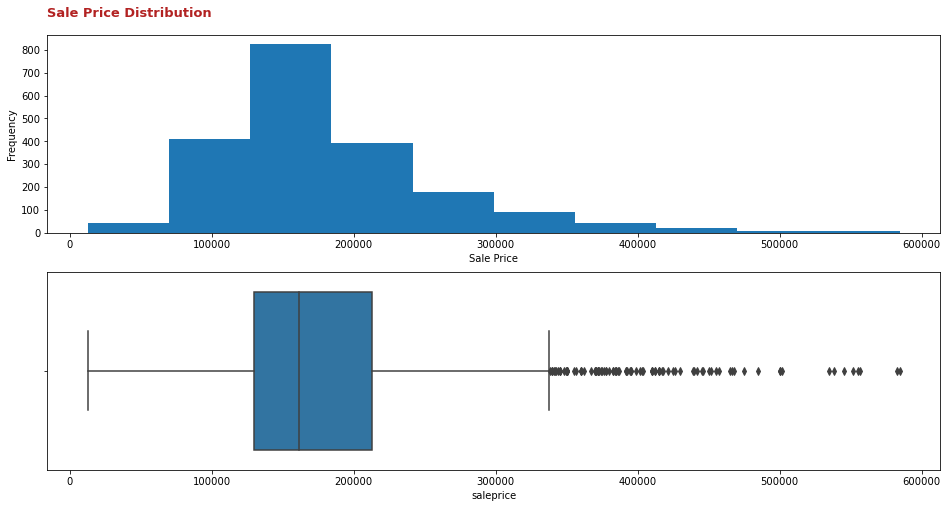

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
ax[0].hist(df.saleprice)
ax[0].set_title('Sale Price Distribution',
             fontsize=13, fontweight='bold', color='firebrick', pad=18, loc='left')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Frequency')

# df.boxplot(column=['saleprice'], ax=ax[1]);
sns.boxplot(x='saleprice', data=df, ax=ax[1]);

In [46]:
df.saleprice.describe()

count      2016.000000
mean     180522.150298
std       77874.522342
min       12789.000000
25%      129500.000000
50%      161500.000000
75%      213062.500000
max      584500.000000
Name: saleprice, dtype: float64

## Continuous Features
**Above Ground Living Area** has been used as used to establish a baseline model, so we will look for multicollinearity between this feature and others. 

There are 19 continuous variables in this dataset, not including Sale Price. 

While we explore the continuous features, we will look for multicollinearity issues between variables and select  the features that correlate most with the target. 
- I hypothesize that continuous features measuring sq footage of parts of a house both correlate and overlap thus leading to multicollinearity and redundancies. If so, only one feature for each part of the house will be included in the regression model. 
    - Living Area
    - Basement
    - Garage
- There are several features that seem to represent small portions of the dataset overall. If this continuous features are not good indicators of Sale Price, we will exclude them from our model.     

In [47]:
all_continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 
                  'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', 
                  '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 
                  'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 
                  'screen_porch', 'pool_area', 'misc_val']

selected_cont_feats = ['gr_liv_area', 'total_bsmt_sf', 'garage_area']

### Living Areas
- ```gr_liv_area```, ```1st_flr_sf```, ```2nd_flr_sf```
- 1st floor sq ft and 2nd floor sq ft are included in general living area. If the house is a one story house, 2nd floor sq ft is recorded as 0. 
- we chose gr_liv_area as our baseline, and we will include it in our regression model. 
- 1st floor sq ft and 2nd floor sq ft will be excluded. 

**Above Ground Living Area** <font color=green> INCLUDED! in our model </font>

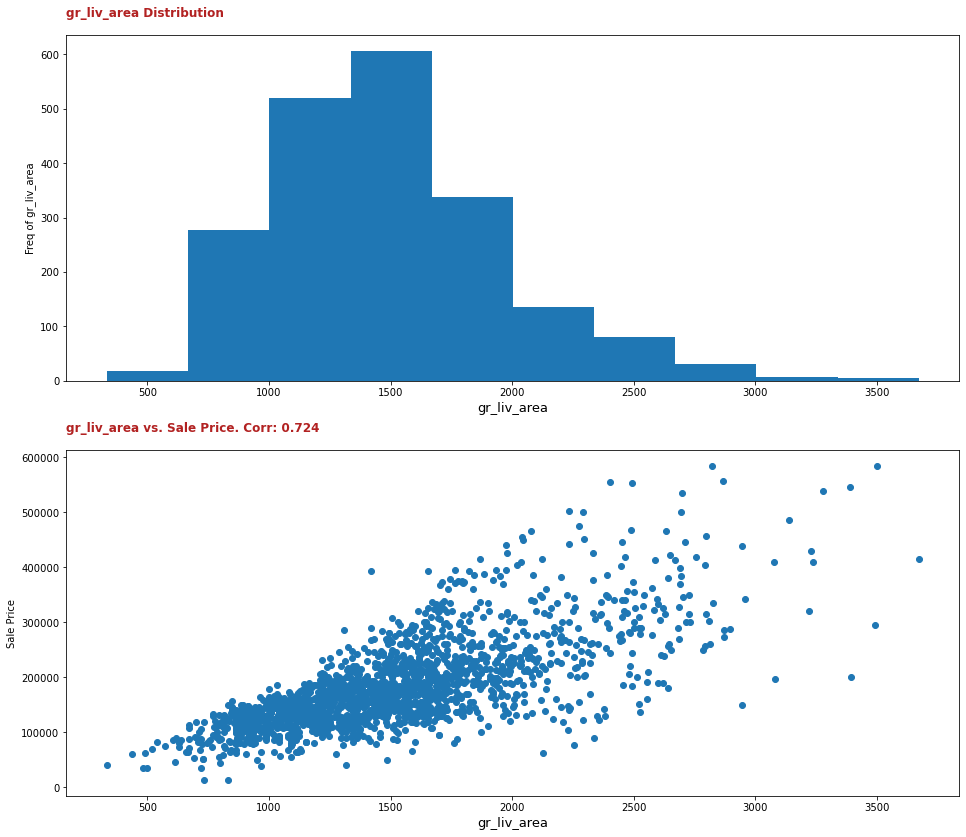

In [48]:
plot_continuous_feature('gr_liv_area')

**Above Ground Living Area**

Obersations
- this feature is most correlating continuous variable with Sale Price. 
- we used this feature as our base model and will also include it as a feature in our model

#### Exploring Multicollinearity between ```gr_liv_area``` and other house sq ft measurements

**1st Floor Sq Ft correlation & Above Ground Living Area**

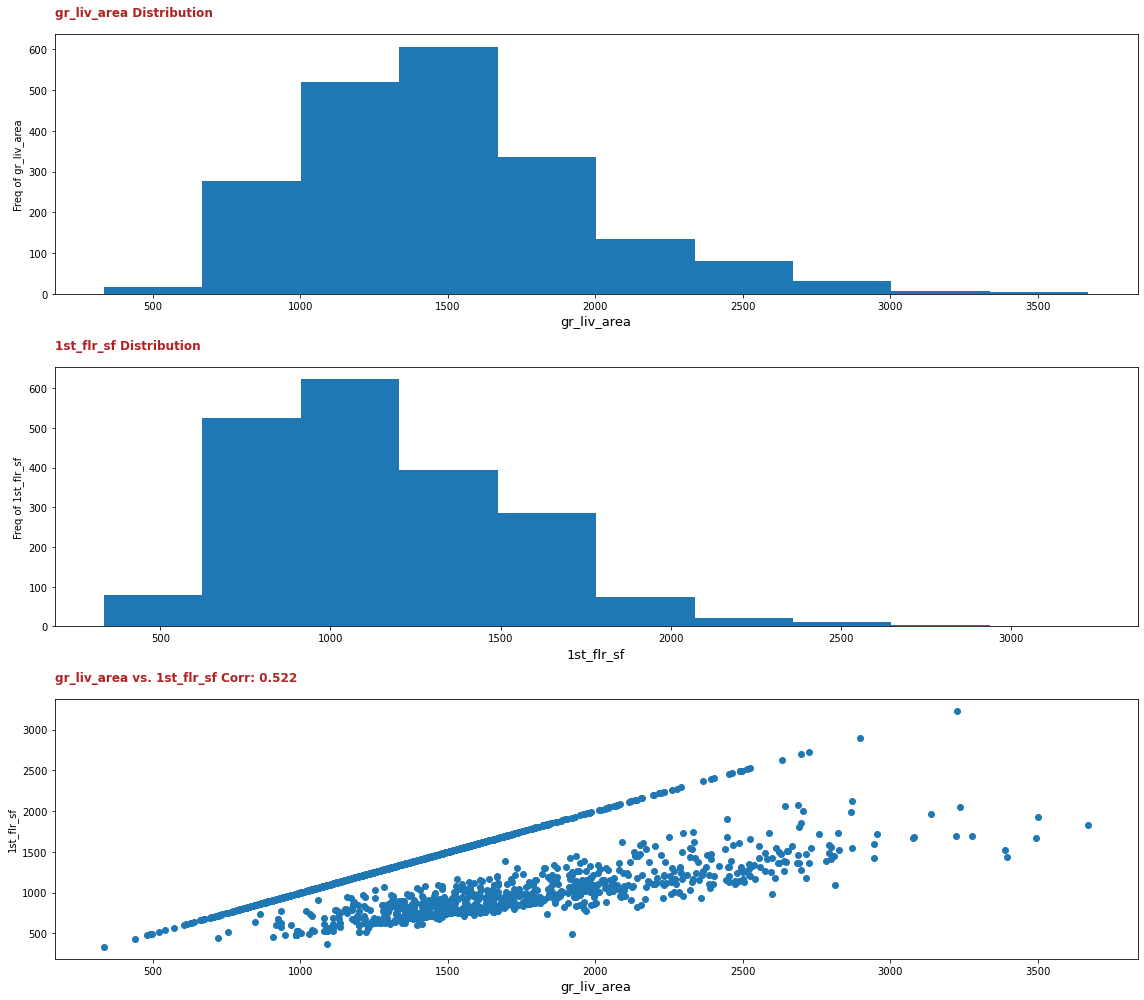

In [49]:
plot_two_continuous_feature('gr_liv_area', '1st_flr_sf')

In [50]:
round(np.corrcoef(df['saleprice'], df['1st_flr_sf'])[0, 1], 3)

0.65

**1st Floor Sq Ft & Above Ground Living Area correlation**

Observations
- houses with only 1 floor represent the upper bounds of this spread. The data overlaps. 
- these features both correlate with Sale Price, but because they overlap, we will exclude 1st Floor Sq Ft from our model. 

**2nd Floor Sq Ft & Above Ground Living Area correlation**

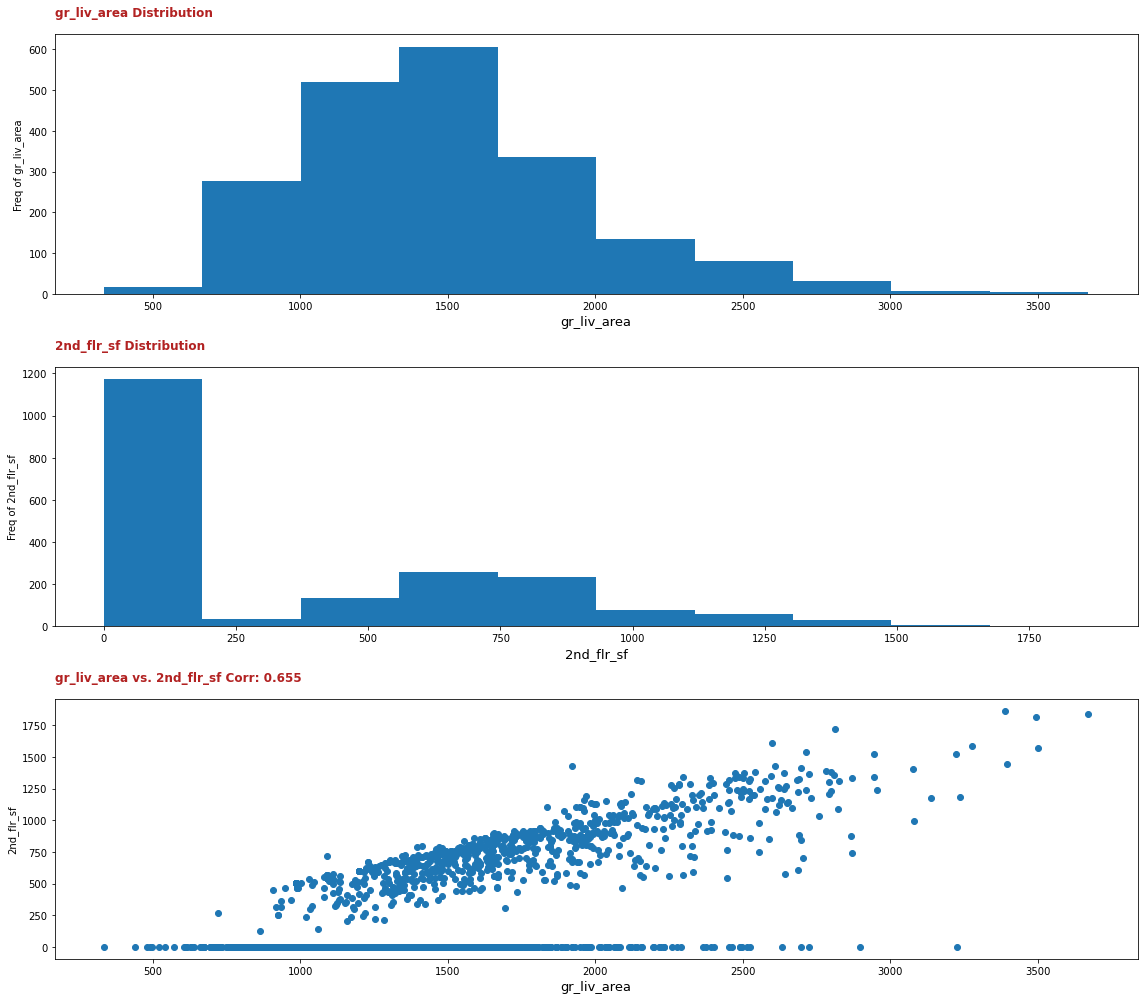

In [51]:
plot_two_continuous_feature('gr_liv_area', '2nd_flr_sf')

**2nd Floor Sq Ft & Above Ground Living Area correlation**

Observations
- Houses without a 2nd floor are recorded as 0. Data from these two features overlap and are correlated. 
- We will exclude this feature from our model. 

**Low Quality Finished Sq Ft (all floors) vs Above Ground Living Area correlation**

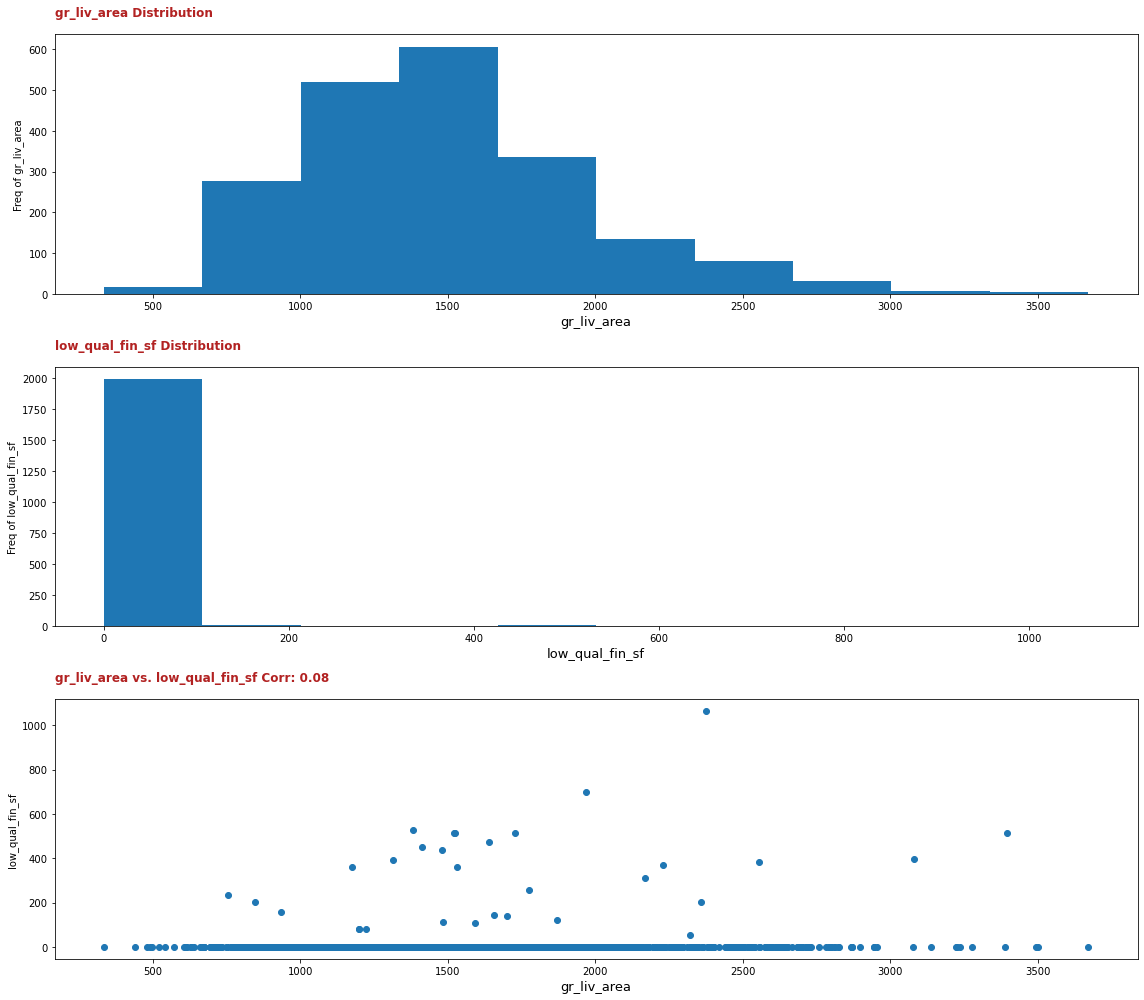

In [52]:
plot_two_continuous_feature('gr_liv_area', 'low_qual_fin_sf')

In [53]:
round(np.corrcoef(df['saleprice'], df['low_qual_fin_sf'])[0, 1], 3)

-0.067

**Low Quality Finished Sq Ft (all floors) vs Above Ground Living Area correlation**

Observations
- there is no correlation between these two features or between Low Quality Finished Sq Ft and Sale Price.
- we will exclude this feature from our model 

### Basement
- ```total_bsmt_sf```, ```bsmtfin_sf_1```, ```bsmtfin_sf_2```, ```bsmt_unf_sf```

**Total Basement Sq Ft** <font color=green>INCLUDED! in model</font>

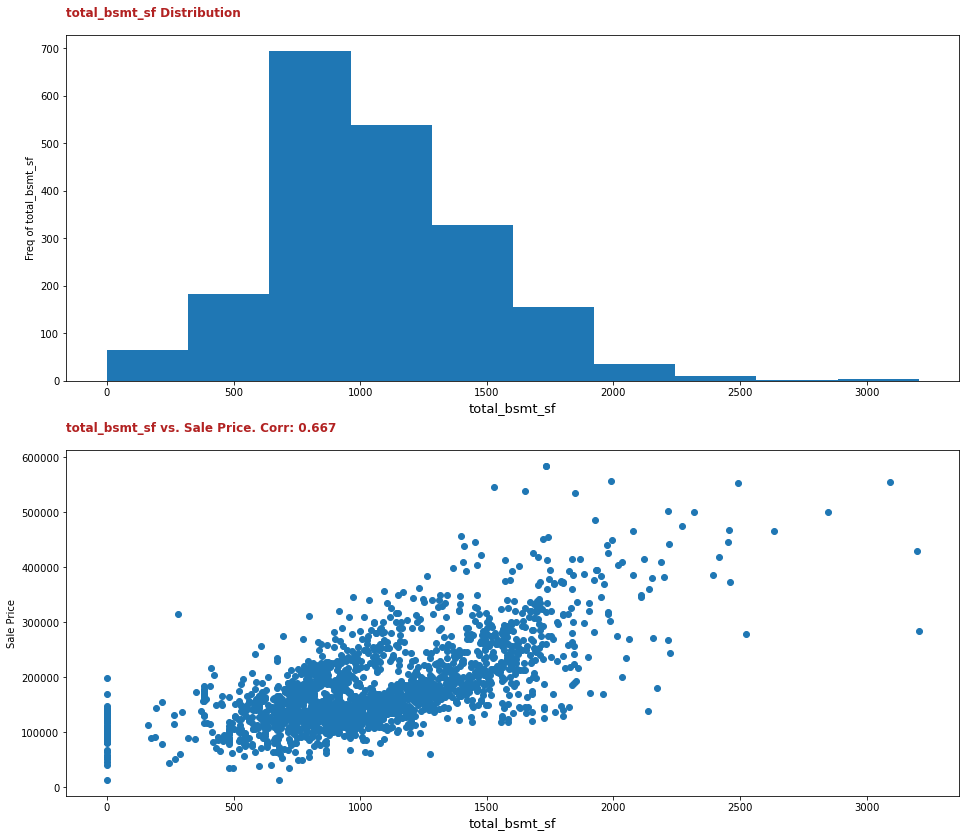

In [54]:
plot_continuous_feature('total_bsmt_sf')

**Total Basement Sq Ft vs Sale Price**
- this feature is considerably correlated with Sale Price. 0.669
- we suspect this feature will be selected out of the different basement measurement features. 
- since it is the second most correlated feature with Sale Price out of all the continuous variables, I will include it in my model

In [55]:
features.append('total_bsmt_sf')

#### Looking for multicollinearity between ```total_bsmt_sf``` and other basement measurement variables

**Total Basement Sq Ft vs. Basement Fin SF 1**

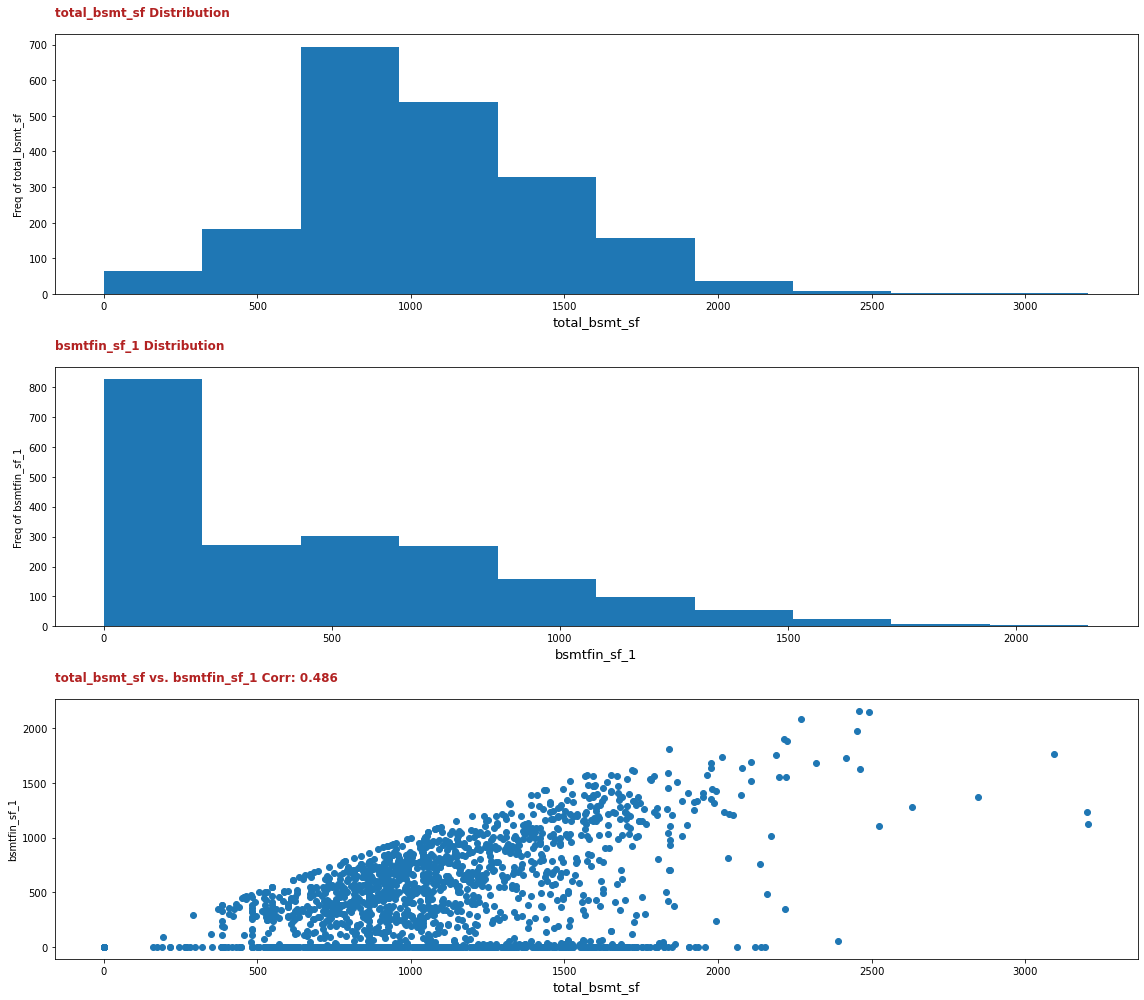

In [56]:
plot_two_continuous_feature('total_bsmt_sf', 'bsmtfin_sf_1')

In [57]:
print('0 Total Basement Sq Ft count: ', 
      df[df['total_bsmt_sf'] == 0]['total_bsmt_sf'].count())
print('0 Basement Finished Sq Ft 1 count: ', 
      df[df['bsmtfin_sf_1'] == 0]['bsmtfin_sf_1'].count())

0 Total Basement Sq Ft count:  51
0 Basement Finished Sq Ft 1 count:  650


In [58]:
print('Total Basement Sq Ft & Sale Price Corr: ', 
      round(np.corrcoef(df['saleprice'], df['total_bsmt_sf'])[0, 1], 3))
print('Basement Finished Sq Ft 1 & Sale Price Corr: ', 
      round(np.corrcoef(df['saleprice'], df['bsmtfin_sf_1'])[0, 1], 3))

Total Basement Sq Ft & Sale Price Corr:  0.667
Basement Finished Sq Ft 1 & Sale Price Corr:  0.445


**Total Basement Sq Ft vs. Basement Fin SF 1**

Observations
- Houses without a basement are recorded as 0 on both total_bsmt_sf and bsmtfin_sf_1.
- Houses with the entire basement finished represent the upper limits of this spread.
- Because more than 655 houses record 0 Basement finished and only 55 houses record 0 Total Basement Sq Ft, we will exclude Basement Finished Sq Ft 1 from our model. 

**Total Basement Sq Ft vs. Basement Fin SF 2**

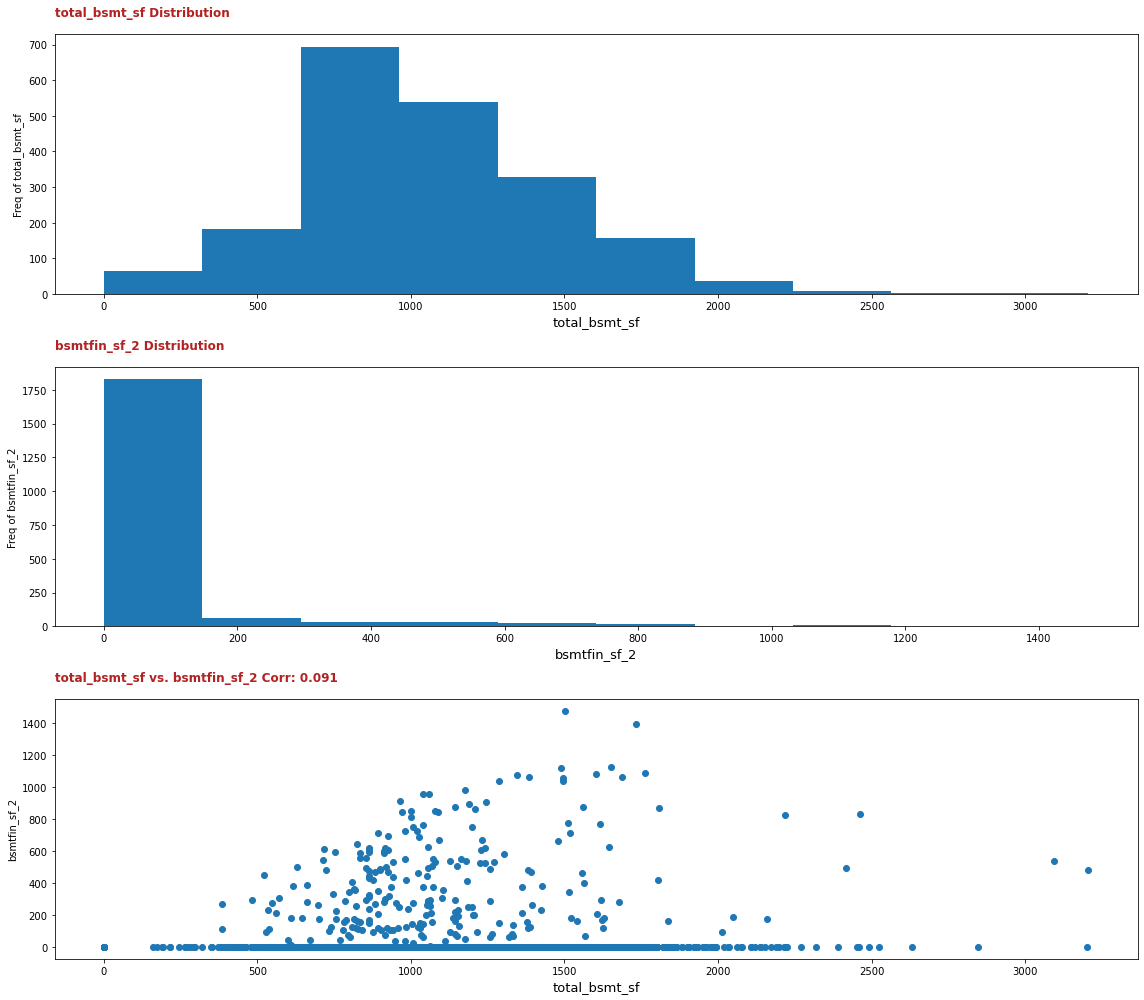

In [59]:
plot_two_continuous_feature('total_bsmt_sf', 'bsmtfin_sf_2')

In [60]:
round(np.corrcoef(df['saleprice'], df['bsmtfin_sf_2'])[0, 1], 3)

0.017

**Basement Fin SF 2 & Total Basement Sq Ft**

Observations
- Houses that have basements with only one type of basement finish are recorded as 0 in bsmtfin_sf_2. 
- there is no correlation between total_bsmt_sf and bsmtfin_sf_2, so multicollinearity is not an issue. 
- bsmtfin_sf_2 has no correlation with Sale Price, so we will exclude it from our model. 

**Basement Unfinished Sq Ft & Total Basement Sq Ft**

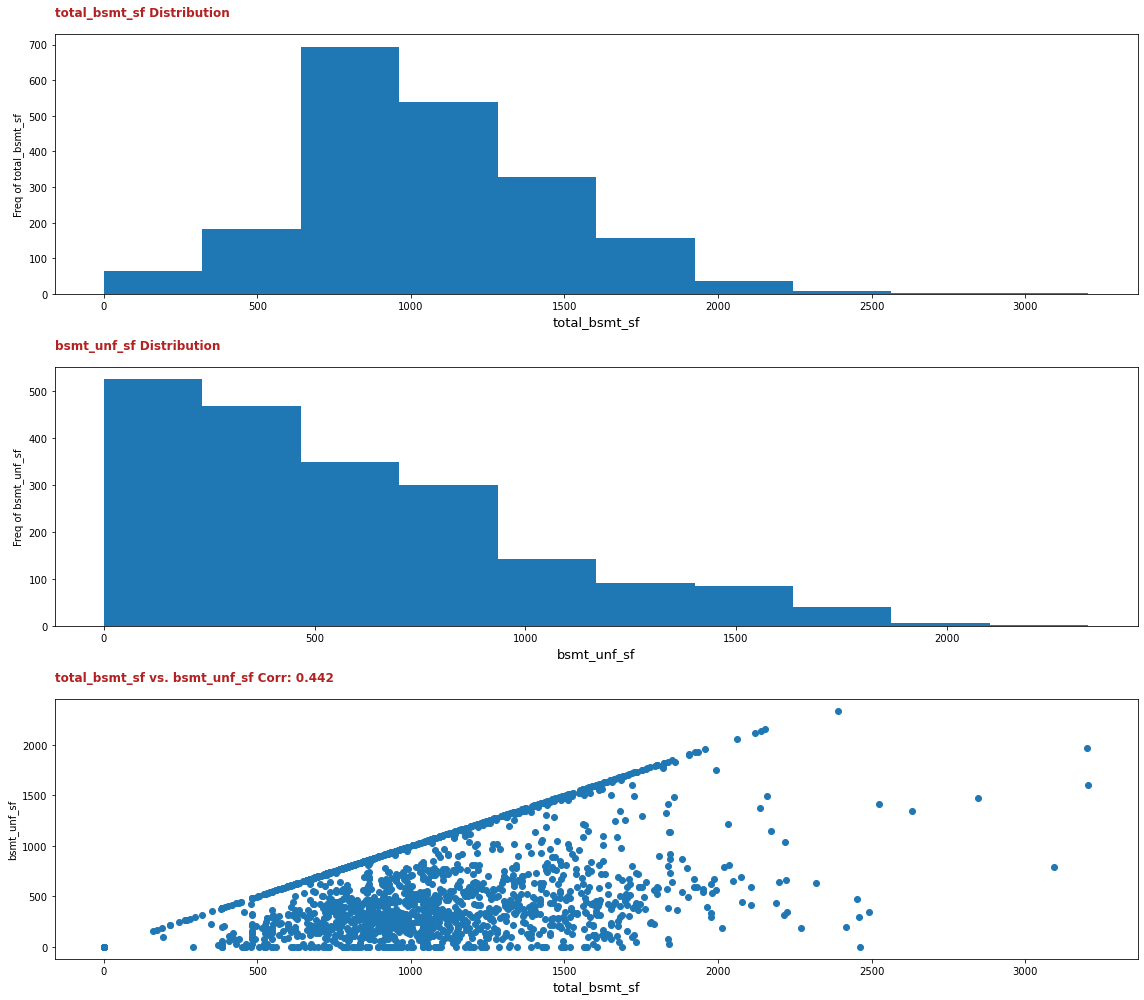

In [61]:
plot_two_continuous_feature('total_bsmt_sf', 'bsmt_unf_sf')

In [62]:
round(np.corrcoef(df['saleprice'], df['bsmt_unf_sf'])[0,1], 3)

0.193

**Basement Unfinished Sq Ft & Total Basement Sq Ft**

Observations
- houses with Basements entirely unfinished represent the upper bounds of this spread. 
- there is no significant correlation between these two features avoiding multicollinearity. 
- there is also no correlation between Basement Unfinished Sq Ft and Sale Price, so we will exclude this feature from our model. 

**Lot Frontage**

In [63]:
# outliers
df[df.lot_frontage > 175]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
436           190        RL         195.0     41600   Pave       IR1   
1313           20        RL         313.0     27650   Pave       IR2   

     land_contour utilities lot_config land_slope  ... open_porch_sf  \
436           Lvl    AllPub        FR2        Gtl  ...             0   
1313          HLS    AllPub     Inside        Mod  ...             0   

     enclosed_porch 3ssn_porch screen_porch pool_area  misc_val  mo_sold  \
436               0          0            0         0         0       11   
1313              0          0            0         0         0       11   

      yr_sold  sale_type saleprice  
436      2007        WD     155000  
1313     2008        WD     242000  

[2 rows x 74 columns]

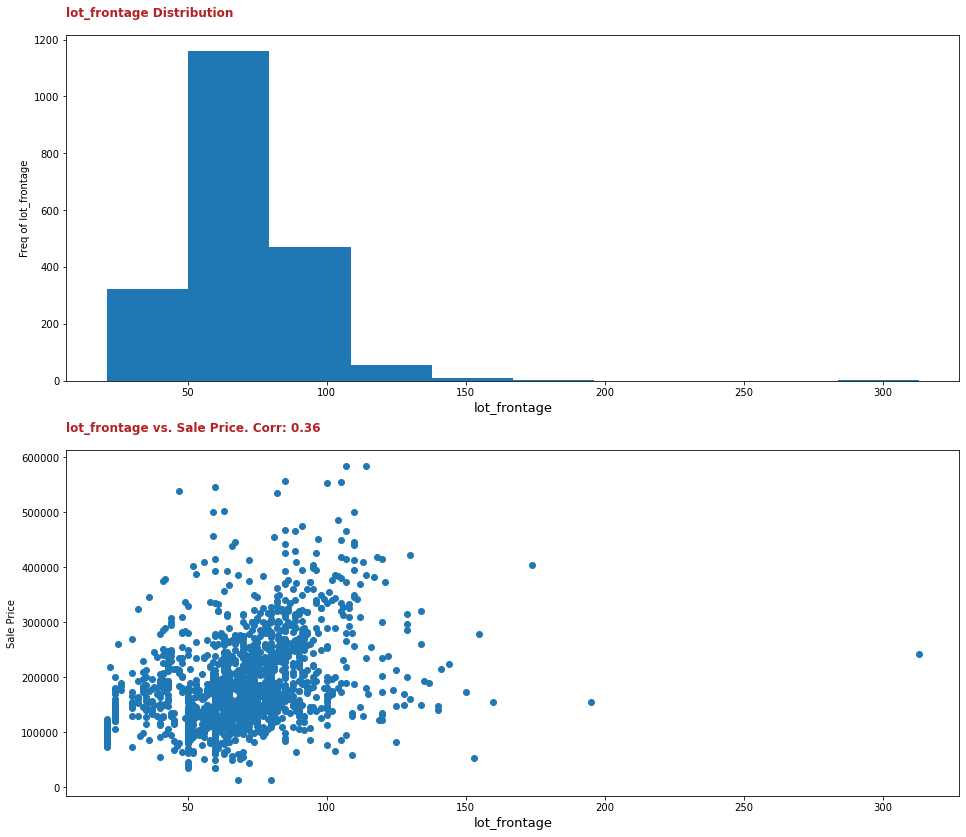

In [64]:
plot_continuous_feature('lot_frontage')

In [65]:
round(np.corrcoef(df['lot_area'], df['saleprice'])[0,1], 3)

0.295

**Lot Frontage**

Observations
- Lot Frontage is not correlated with the taregt and will be excluded from the model. 

**Lot Area**

In [66]:
# outliers
df[df.lot_area > 60000]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
465            50        RL          82.5    159000   Pave       IR2   
685            20        RL          82.5    115149   Pave       IR2   
1822           20        RL          62.0     70761   Pave       IR1   

     land_contour utilities lot_config land_slope  ... open_porch_sf  \
465           Low    AllPub    CulDSac        Sev  ...            98   
685           Low    AllPub    CulDSac        Sev  ...            48   
1822          Low    AllPub     Inside        Mod  ...            54   

     enclosed_porch 3ssn_porch screen_porch pool_area  misc_val  mo_sold  \
465               0          0            0         0       500        6   
685               0          0            0         0         0        6   
1822              0          0            0         0         0       12   

      yr_sold  sale_type saleprice  
465      2007        WD     277000  
685      2007        WD     302000  
1822     2006        WD     280000  

[3 rows x 74 columns]

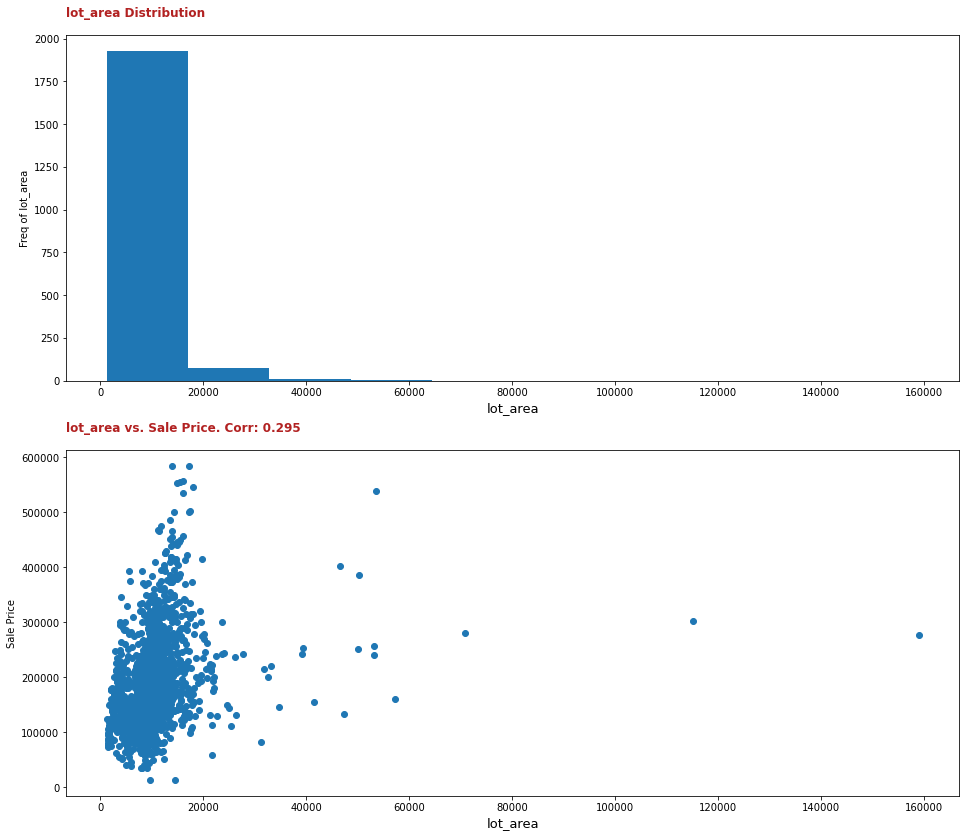

In [67]:
plot_continuous_feature('lot_area')

In [68]:
# Lot Area correlation with Sale Price minus 22 outliers
round(np.corrcoef(df[df.wood_deck_sf < 30000]['lot_area'], 
                  df[df.wood_deck_sf < 30000]['saleprice'])[0,1], 3)

0.295

**Lot Area** 

Observations
- Lot Area is not correlated with Sale Price
- I removed 22 outliers in this feature as a test, and it did not improve it's correlation with the target. These outliers were no dropped after this test. 
- We will exclude this feature from our model. 

**Masonry Veneer Area in Sq Ft**

In [69]:
# outliers
# df[df.mas_vnr_area == df.mas_vnr_area.max()]

In [70]:
# plot_continuous_feature('mas_vnr_area')

In [71]:
df[df['mas_vnr_area'] == 0]['mas_vnr_area'].count()

1199

In [72]:
# round(np.corrcoef(df['mas_vnr_area'], df['saleprice'])[0,1], 3)

**Masonry Veneer Area in Sq Ft**

Observations
- there are 1211 houses with mas_vnr_area recorded as 0. These houses do not have any masonry veneer. 
- it is a significant portion of the data, 1211. The unseen data will most likely follow the same pattern of houses not having masonry veneer. 
- this feature is not a good indicator of the sale price of a house and it will be excluded from the model. 

**Garage Area** <font color=green>INCLUDED! in model</font>

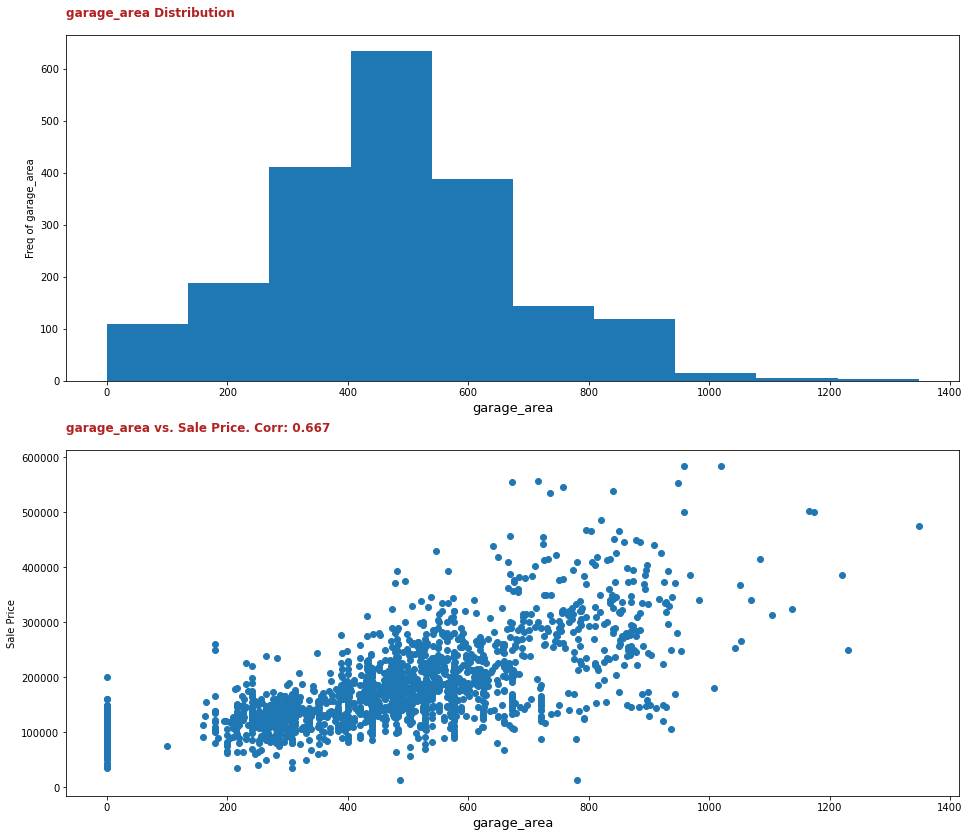

In [73]:
plot_continuous_feature('garage_area')

In [74]:
round(np.corrcoef(df['garage_area'], df['saleprice'])[0,1], 3)

0.667

In [75]:
features.append('garage_area')

**Garage Area** 

Obersvation 
- this feature correlates with Sale Price
- below I explore whether it correlates with ```gr_liv_area``` and ```garage_area``` and they do not
- I also explore this features correlations with other basement measurement variables, and the data overlaps for upper and lower limits. 
- this feature will be included in our model

**Garage Area vs. Above Ground Living Area Multicollinearity?**

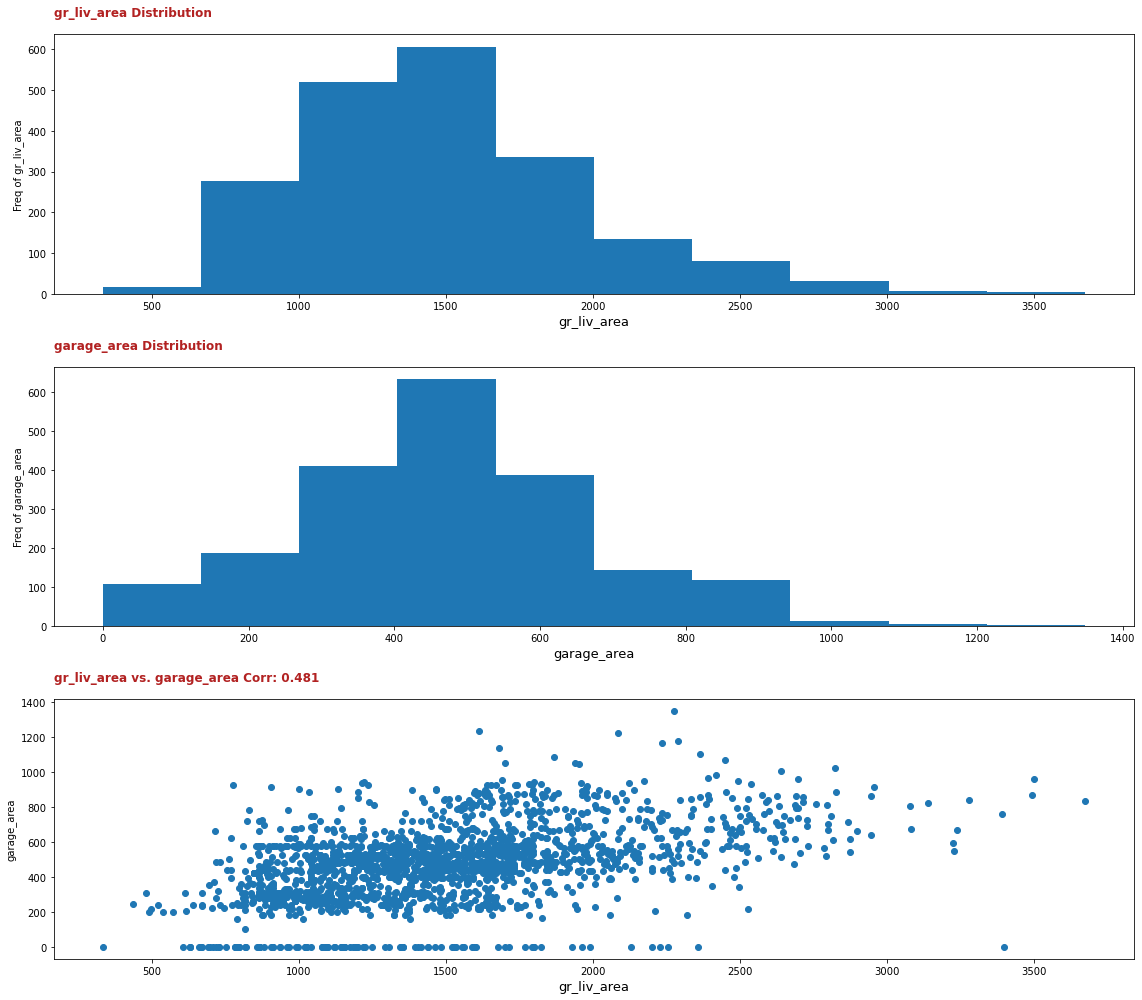

In [76]:
plot_two_continuous_feature('gr_liv_area', 'garage_area')

In [77]:
round(np.corrcoef(df['garage_area'], df['gr_liv_area'])[0,1], 3)

0.481

**Garage Area vs. Above Ground Living Area Multicollinearity?**

Observation
- Garage Area and Above Ground Living Area are not correlated

**Above Ground Living Area vs. Total Basement Sq Ft Multicollinearity?**

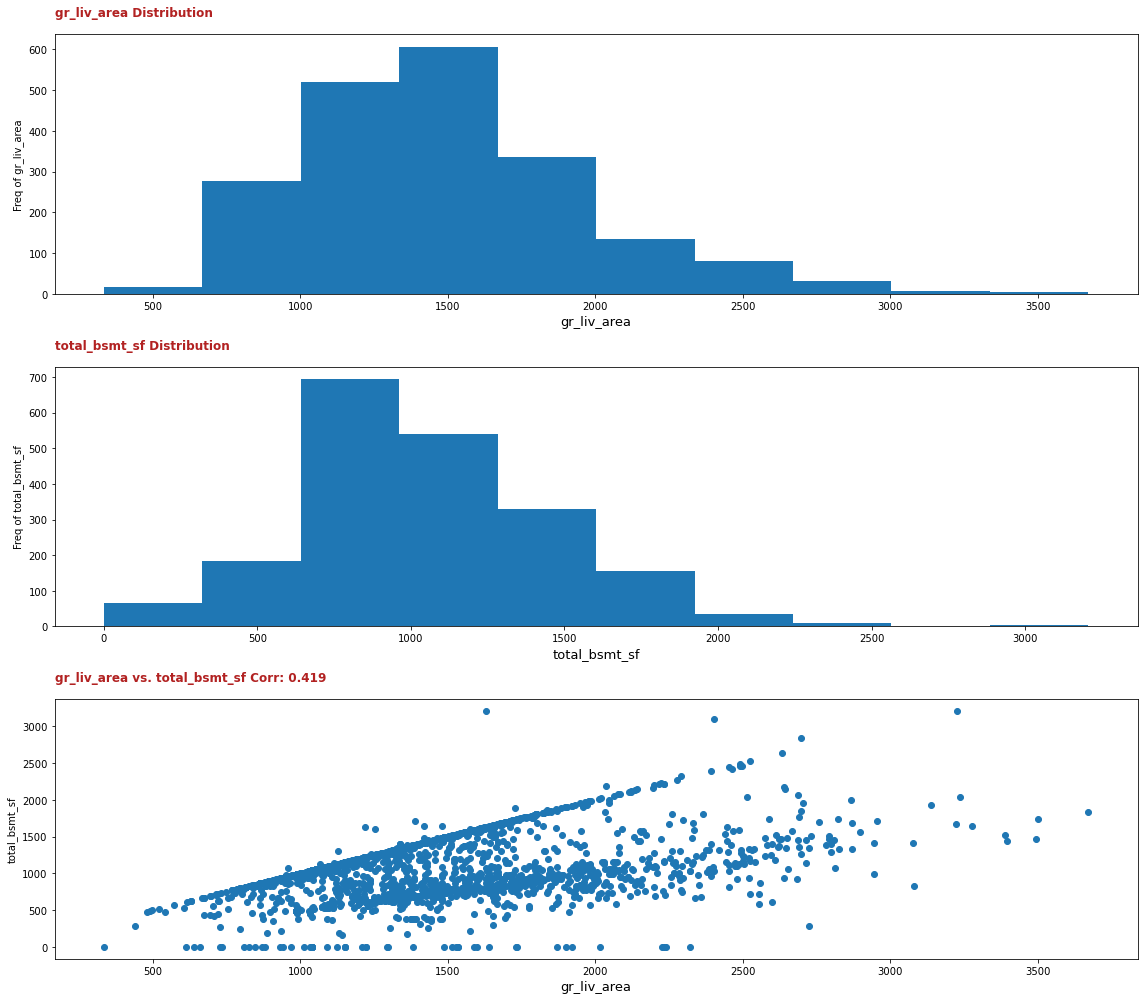

In [78]:
plot_two_continuous_feature('gr_liv_area', 'total_bsmt_sf')

**Garage Area**

Observations
- this feature has a high correlation with Sale Price 
- it is not correlated with either gr_liv_area of total_bsmt_sf, avoiding multicollinearity in our model. 
- we will include this feature in our model. 

**Wood Deck Sq Ft**

In [79]:
# outlier
df[df.wood_deck_sf == df.wood_deck_sf.max()]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
953           80        RL          74.0     15957   Pave       IR1   

    land_contour utilities lot_config land_slope  ... open_porch_sf  \
953          Low    AllPub     Corner        Mod  ...             0   

    enclosed_porch 3ssn_porch screen_porch pool_area  misc_val  mo_sold  \
953              0          0            0         0         0        9   

     yr_sold  sale_type saleprice  
953     2007        WD     188000  

[1 rows x 74 columns]

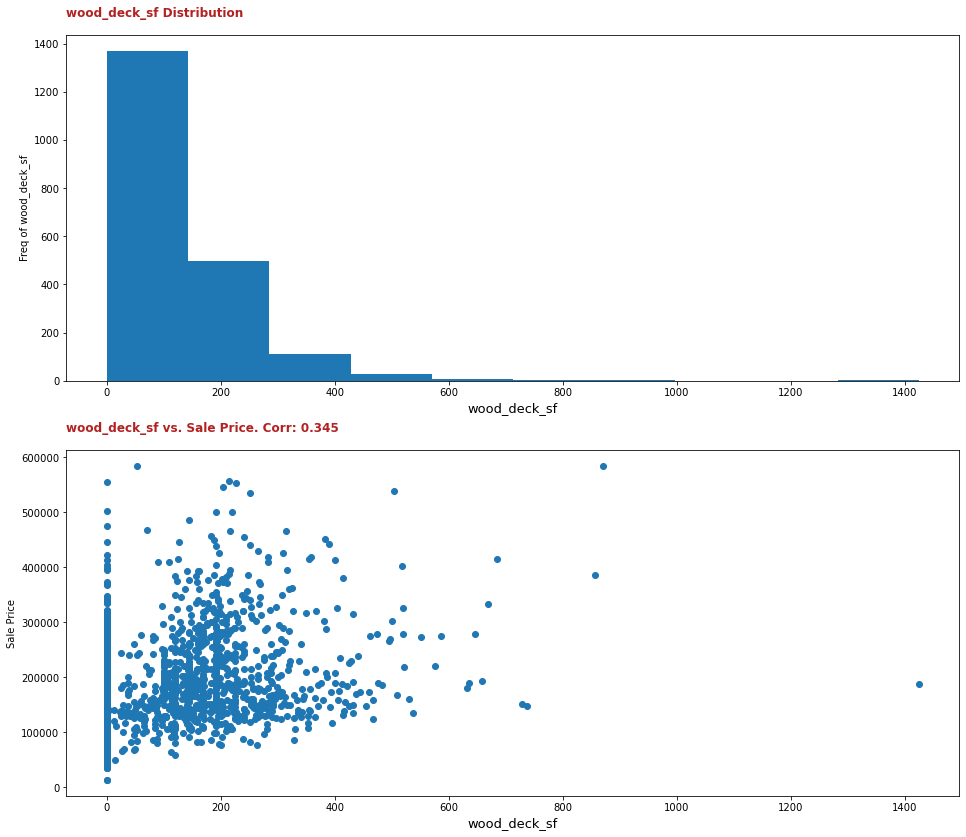

In [80]:
plot_continuous_feature('wood_deck_sf')

In [81]:
df[df.wood_deck_sf == 0]['wood_deck_sf'].count()

1057

In [82]:
round(np.corrcoef(df[df.wood_deck_sf != 0]['wood_deck_sf'], 
                  df[df.wood_deck_sf != 0]['saleprice'])[0,1], 3)

0.193

**Wood Deck Sq Ft**

Observations
- over half of the dataset does not have a wood deck. 
- of those house that do have wood decks, sq ft of wood decks does not correlate with Sale Price. 
- we will exclude this feature form our model.

**Open Porch Sq Ft**

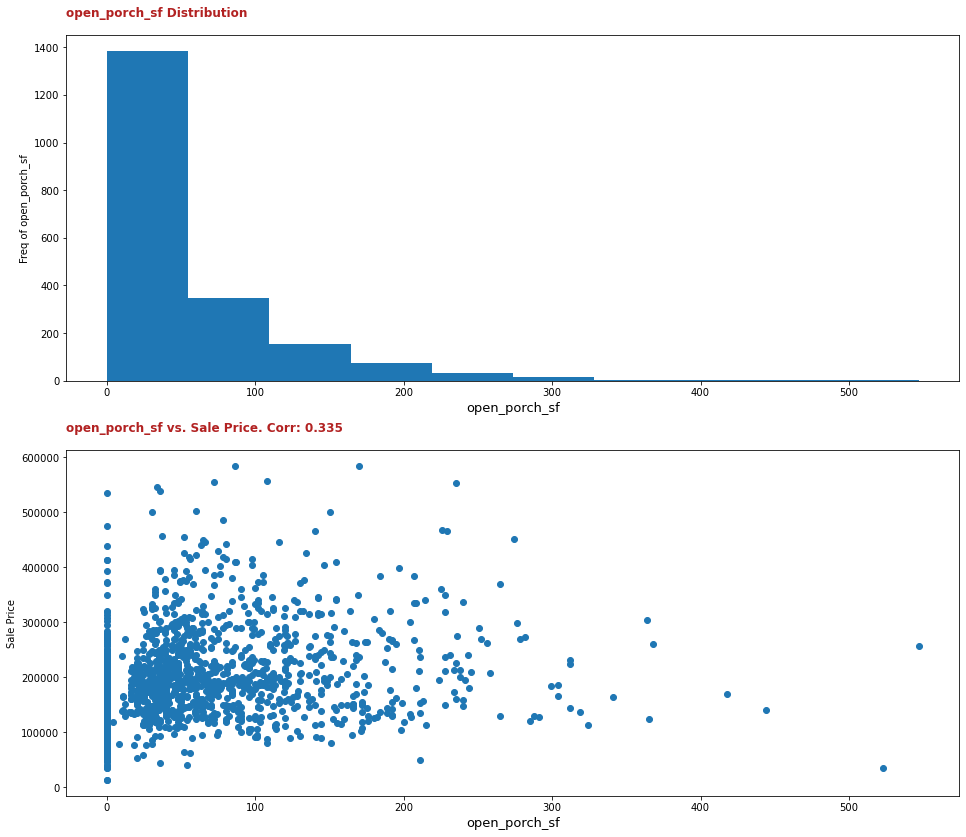

In [83]:
plot_continuous_feature('open_porch_sf')

In [84]:
df[df.open_porch_sf == 0]['open_porch_sf'].count()

893

In [85]:
# Correlation with Sale Price minus 1070 nulls
round(np.corrcoef(df[df.open_porch_sf != 0]['open_porch_sf'], 
                  df[df.open_porch_sf != 0]['saleprice'])[0,1], 3)

0.074

**Open Porch Sq Ft**

Observations
- almost half of the dataset does not have a an open porch
- of those house with an open porch, sq ft of open porches does not correlate with sale price
- we will not include this feature in our model

**Enclosed Porch**

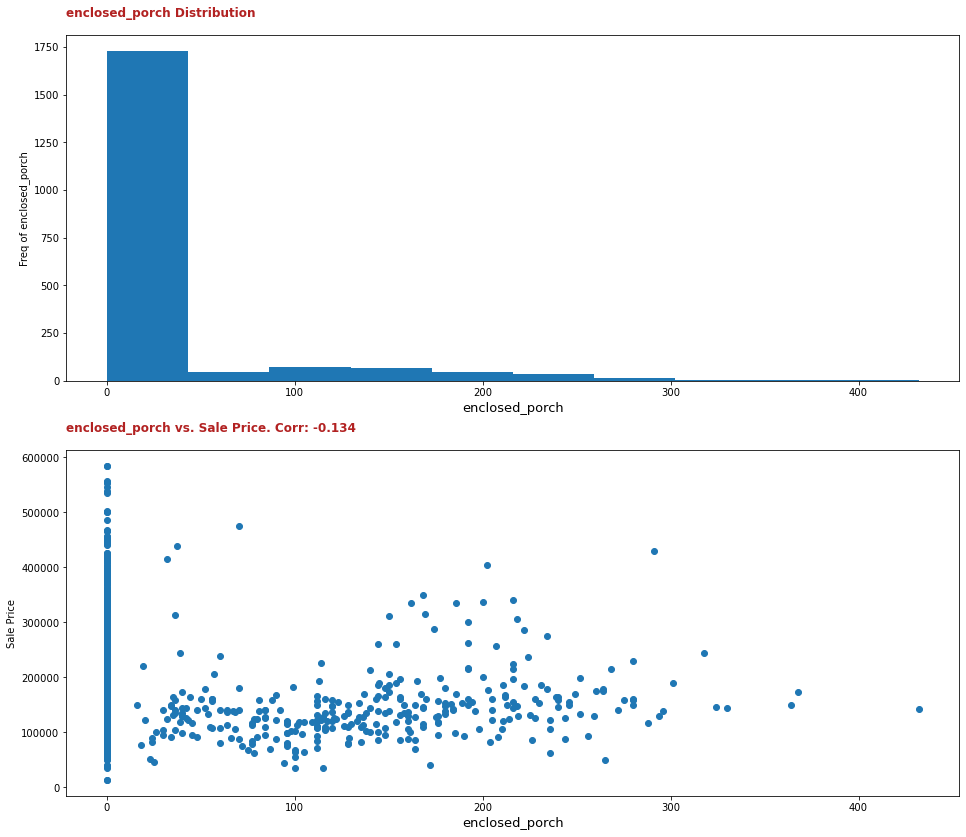

In [86]:
plot_continuous_feature('enclosed_porch')

**Enclosed Porch**

Observations
- Most houses do not have an enclosed porch. We will not inlcude this feature in our model. 

**3 Season Porch**

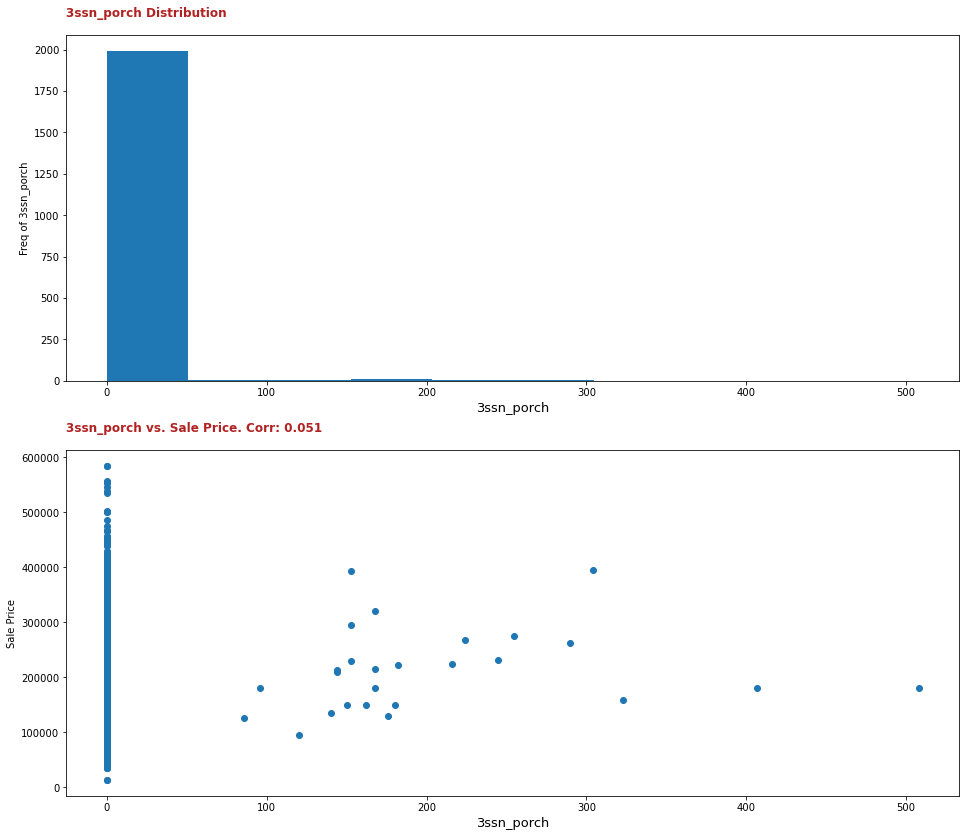

In [87]:
plot_continuous_feature('3ssn_porch')

In [88]:
df[df['3ssn_porch'] != 0]['3ssn_porch'].count()

26

**3 Season Porch**
- only 26 houses have 3 season porches. It is not a good indicator for any significant portion of a dataset. 
- we will not include this feature in our model. 

**Screen Porch**

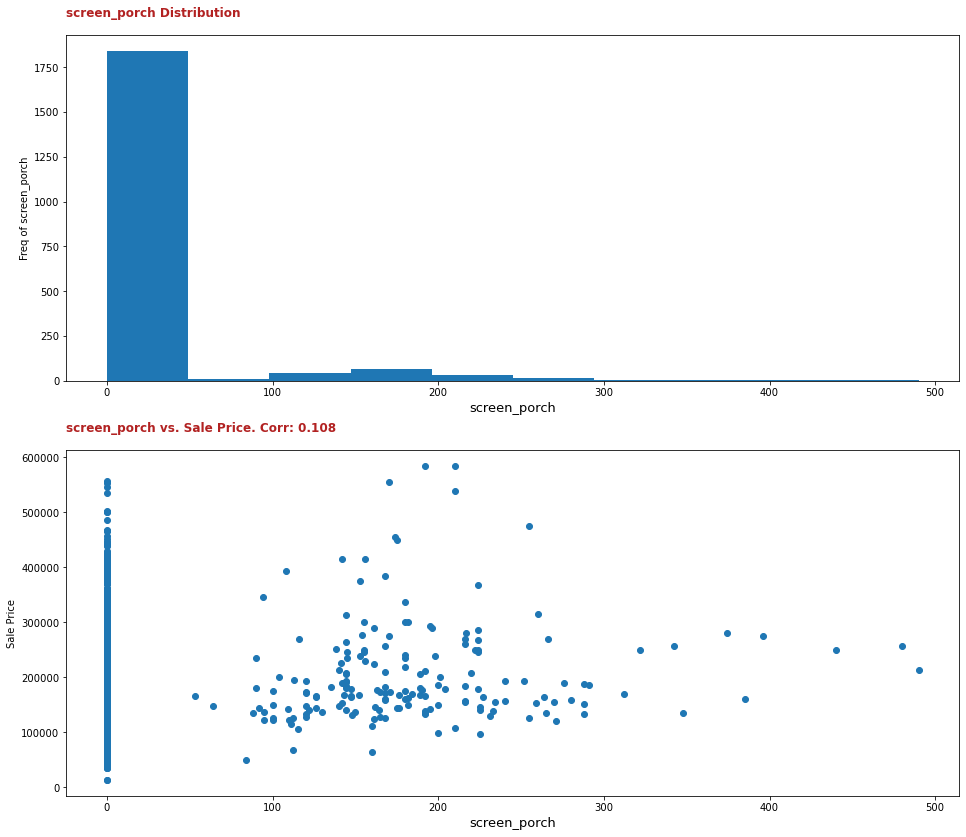

In [89]:
plot_continuous_feature('screen_porch')

In [90]:
df[df.screen_porch != 0]['screen_porch'].count()

177

In [91]:
round(np.corrcoef(df[df.screen_porch != 0]['screen_porch'], 
                  df[df.screen_porch != 0]['saleprice'])[0,1], 3)

0.116

**Screen Porch**

Observation 
- only 181 houses have Screen Porches
- of those houses that do have screen porches, screen porch sq ft does not correlate with Sale Price
- we will not include this feature in our model.

**Pool Area**

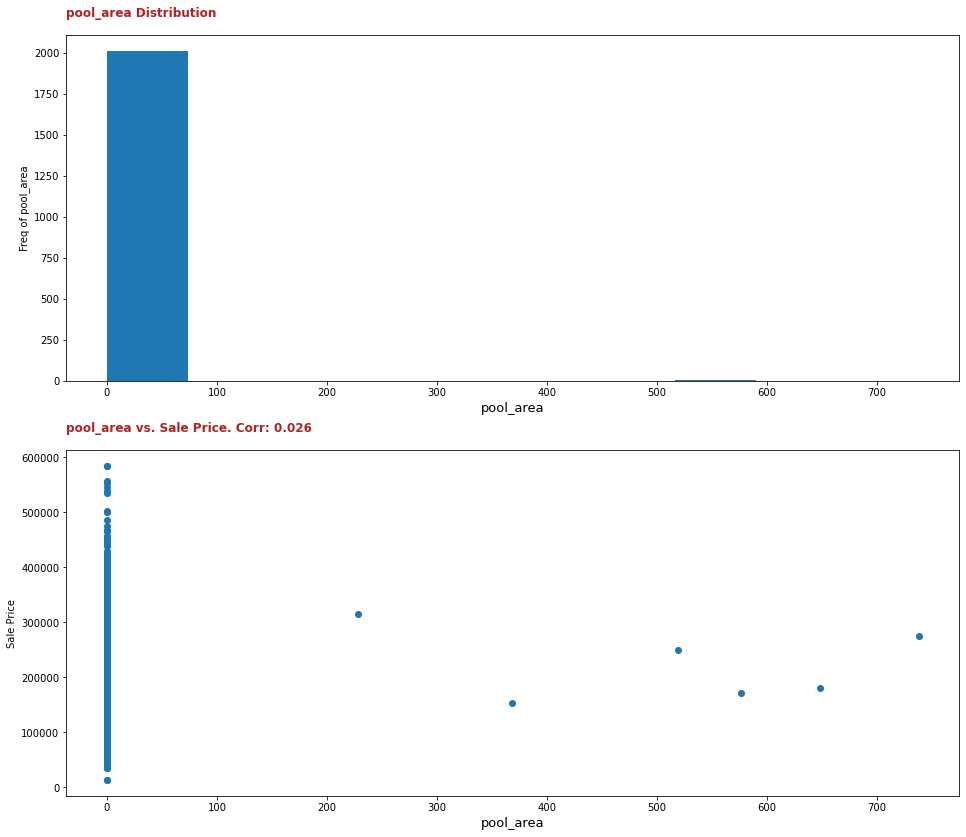

In [92]:
plot_continuous_feature('pool_area')

In [93]:
df[df.pool_area != 0]['pool_area'].count()

6

**Pool Area**

Observation
- only 8 houses have pools. This feature is not a good indicator of Sale Price.
- we will not include this feature in our model. 

**Value of Miscellaneous Features**

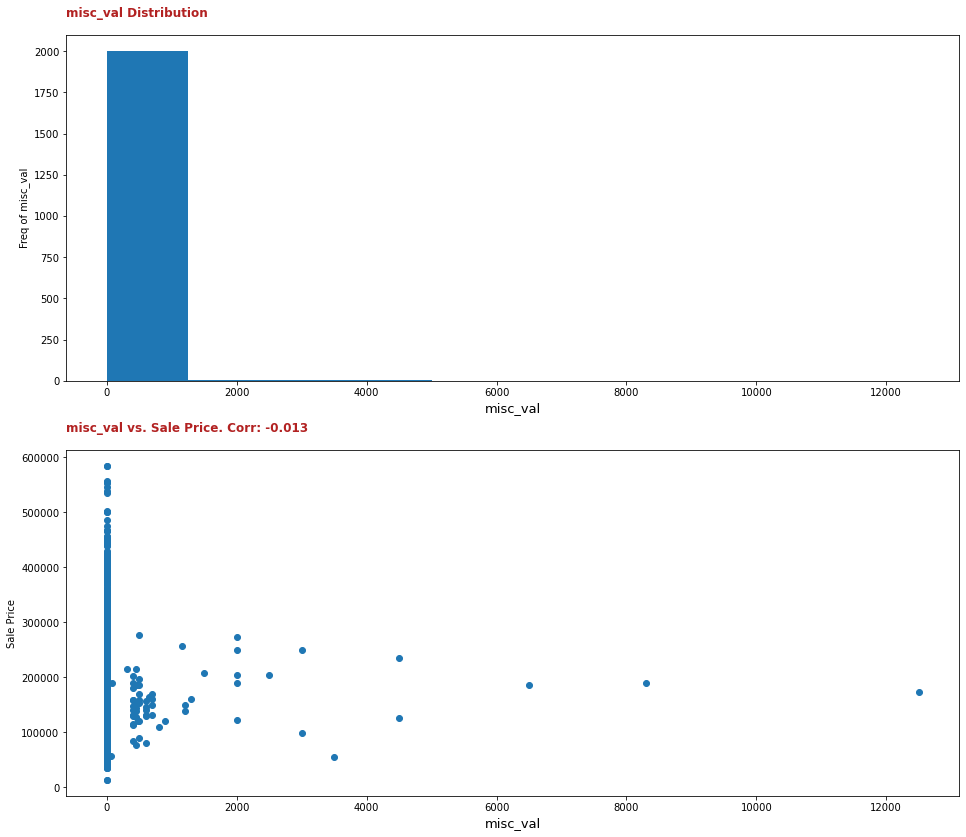

In [94]:
plot_continuous_feature('misc_val')

In [95]:
df[df.misc_val != 0]['misc_val'].count()

63

In [96]:
round(np.corrcoef(df[df.misc_val != 0]['misc_val'], 
                  df[df.misc_val != 0]['saleprice'])[0,1], 3)

0.169

**Value of Miscellaneous Features**

Observation
- this feature is extremely ambiguous. The data dictionary does not include any specific information about it. 
- only 64 houses have data recorded for this feature. 
- of those houses with a misc_val, this feature does not correlate with the target.
- we will exclude this feature from our model. 

## Categorical Features

### Nominal Features 

There are 23 nominal variables in the dataset

In [97]:
nominal_features = ['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 
                    'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 
                    'house_style', 'roof_style', 'roof_matl', 'exterior_1', 'exterior_2', 
                    'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 
                    'misc_featuree', 'sale_type', 'sale_condition']

nom_to_inspect = ['ms_zoning', 
                    'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 
                    'house_style', 'roof_style', 'roof_matl', 'exterior_1', 'exterior_2', 
                    'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 
                    'misc_featuree', 'sale_type', 'sale_condition']

selected_nom_feats = []

**Central Air** <font color=green>INCLUDED dummy in my model</font>

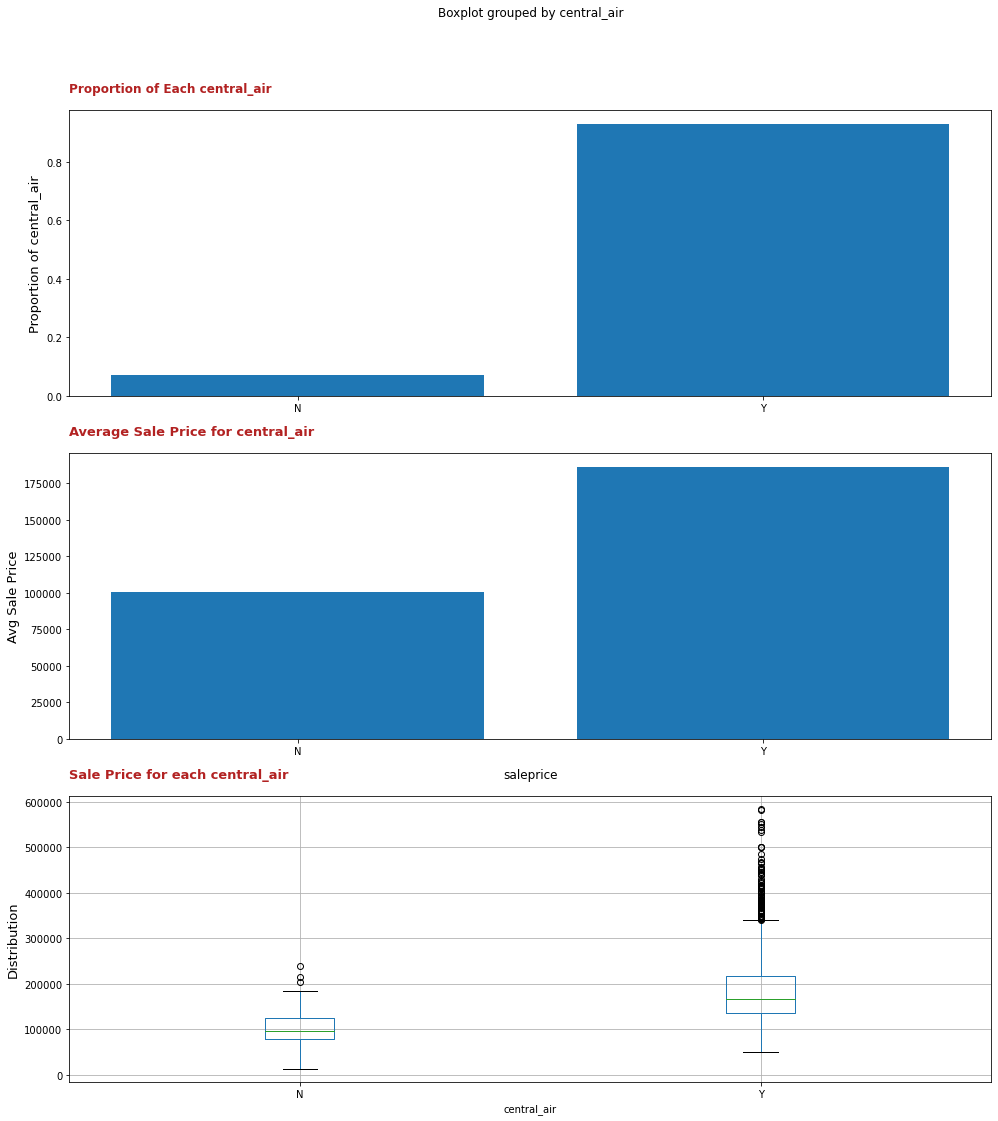

In [98]:
plot_nominal_feature('central_air')

In [99]:
df.central_air.value_counts(normalize=True)

Y    0.930556
N    0.069444
Name: central_air, dtype: float64

**Central Air**

Observations
- 7% of the dataset has no central air, and their average Sale Price is considerably less than those with central air
- I will create dummies for this feature and include it in my model

In [100]:
# df.central_air_N

In [101]:
df = df.join(pd.get_dummies(df.central_air, prefix='central_air'))

Appending 'central_air_N' to features list

In [102]:
features.append('central_air_N')

**Basement Finish Type 1**

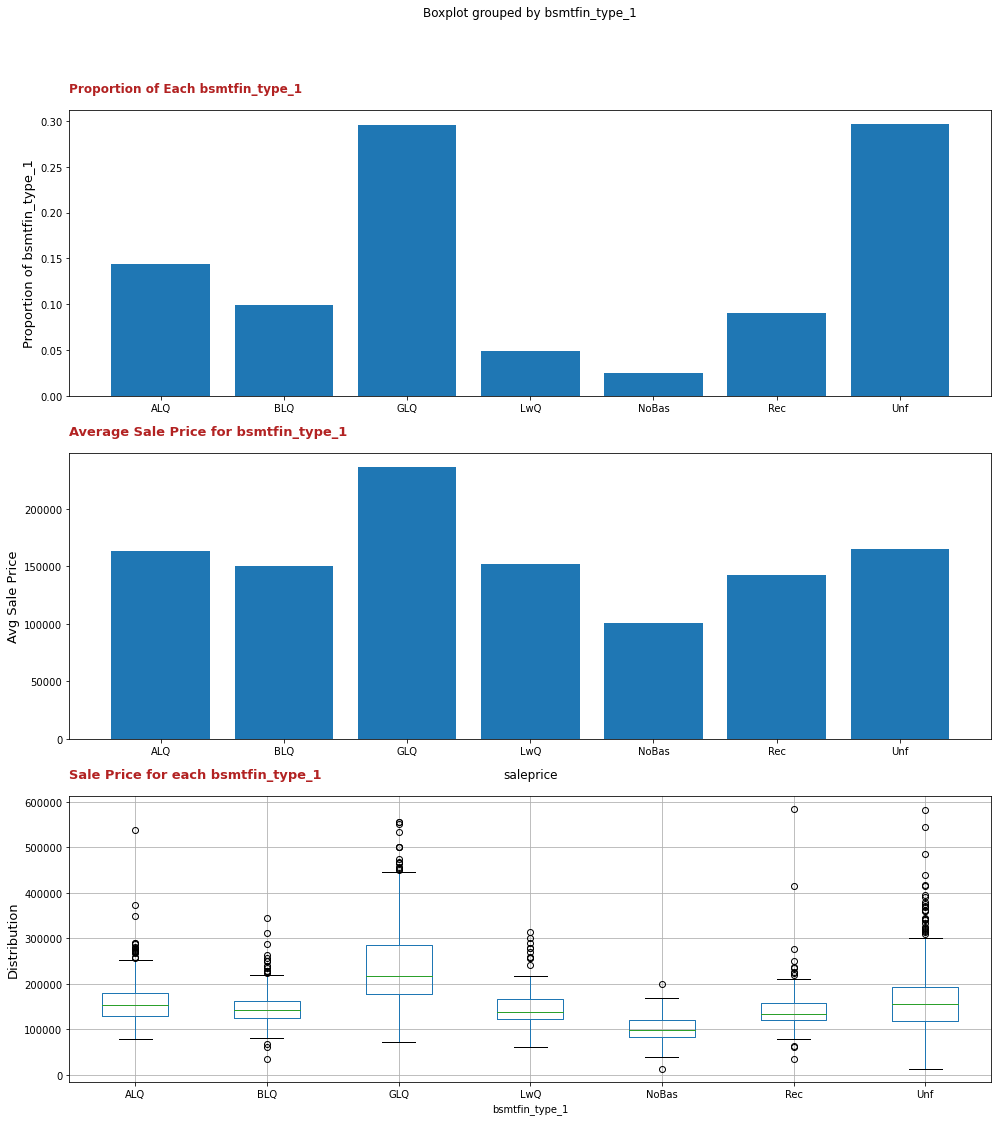

In [103]:
plot_nominal_feature('bsmtfin_type_1')

**Basement Finish Type 1**

Observations
- there is a clear difference in average Sale Price for houses with no basement, houses with a basement, and houses with good living quarters in the basement
- I'm going to group these together in a new column, then make dummies for them and include them in my model. 
- there are 3 outliers that 

- Creating new ```bsmt_types``` with good living quarters, yes basement, no basement

In [104]:
df['bsmt_types'] = ['GLQ' if x == 'GLQ' 
                     else 'NoBas' if x == 'NoBas'
                     else 'YesBas'
                     for x in df.bsmtfin_type_1]

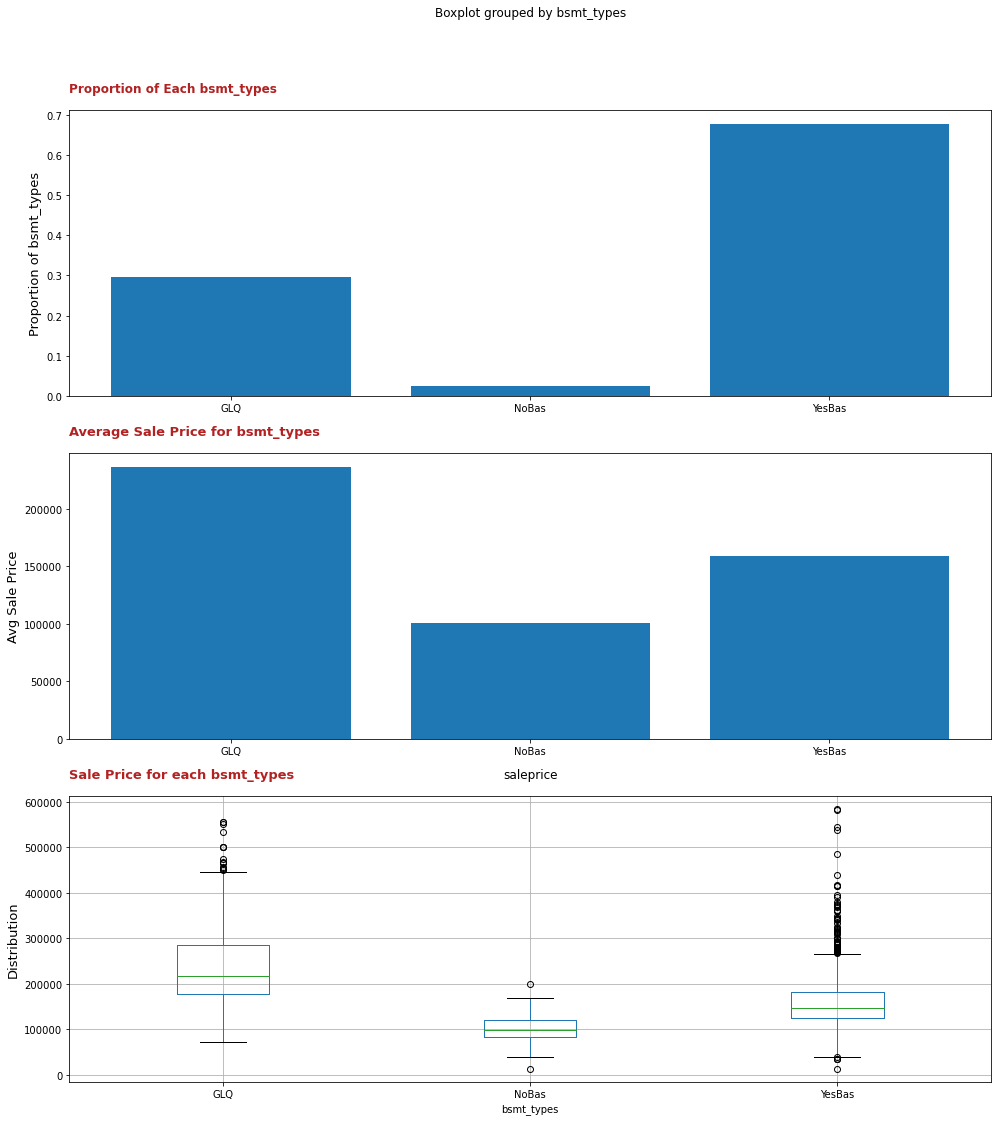

In [105]:
plot_nominal_feature('bsmt_types')

- Creating dummies for ```basmt_types``` and joining them to df

In [106]:
df = df.join(pd.get_dummies(df.bsmt_types, prefix='bsmt'))

Appending 'bsmt_GLQ' and 'bsmt_YesBas' to features list

In [107]:
features.append('bsmt_GLQ')
features.append('bsmt_YesBas')

**Basement Finish Type 2**

In [108]:
df[df.bsmtfin_type_1 != df.bsmtfin_type_2]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0              60        RL          70.0     13517   Pave       IR1   
1              60        RL          43.0     11492   Pave       IR1   
2              20        RL          68.0      7922   Pave       Reg   
5              20        RL         137.0     16492   Pave       IR1   
6             180        RM          35.0      3675   Pave       Reg   
...           ...       ...           ...       ...    ...       ...   
2009           60        RL          65.0      8453   Pave       IR1   
2010           20        RL          96.0     12444   Pave       Reg   
2011           20        RL          79.0     11449   Pave       IR1   
2012           30        RL          63.0     12342   Pave       IR1   
2014           20        RL          80.0     10400   Pave       Reg   

     land_contour utilities lot_config land_slope  ... mo_sold yr_sold  \
0             Lvl    AllPub    CulDSac        Gtl  ...       3    2010   
1             Lvl    AllPub    CulDSac        Gtl  ...       4    2009   
2             Lvl    AllPub     Inside        Gtl  ...       1    2010   
5             Lvl    AllPub     Corner        Gtl  ...       6    2010   
6             Lvl    AllPub     Inside        Gtl  ...       6    2006   
...           ...       ...        ...        ...  ...     ...     ...   
2009          Lvl    AllPub     Inside        Gtl  ...       4    2008   
2010          Lvl    AllPub        FR2        Gtl  ...      11    2008   
2011          HLS    AllPub     Inside        Gtl  ...       1    2008   
2012          Lvl    AllPub     Inside        Gtl  ...       3    2009   
2014          Lvl    AllPub     Corner        Gtl  ...      11    2009   

     sale_type saleprice central_air_N  central_air_Y  bsmt_types  bsmt_GLQ  \
0          WD     130500             0              1         GLQ         1   
1          WD     220000             0              1         GLQ         1   
2          WD     109000             0              1         GLQ         1   
5          WD     190000             0              1      YesBas         0   
6          New    140000             0              1         GLQ         1   
...        ...       ...           ...            ...         ...       ...   
2009       WD     182000             0              1         GLQ         1   
2010       New    394617             0              1         GLQ         1   
2011       WD     298751             0              1         GLQ         1   
2012       WD      82500             0              1      YesBas         0   
2014       WD     144000             0              1      YesBas         0   

      bsmt_NoBas bsmt_YesBas  
0              0           0  
1              0           0  
2              0           0  
5              0           1  
6              0           0  
...          ...         ...  
2009           0           0  
2010           0           0  
2011           0           0  
2012           0           1  
2014           0           1  

[1365 rows x 80 columns]

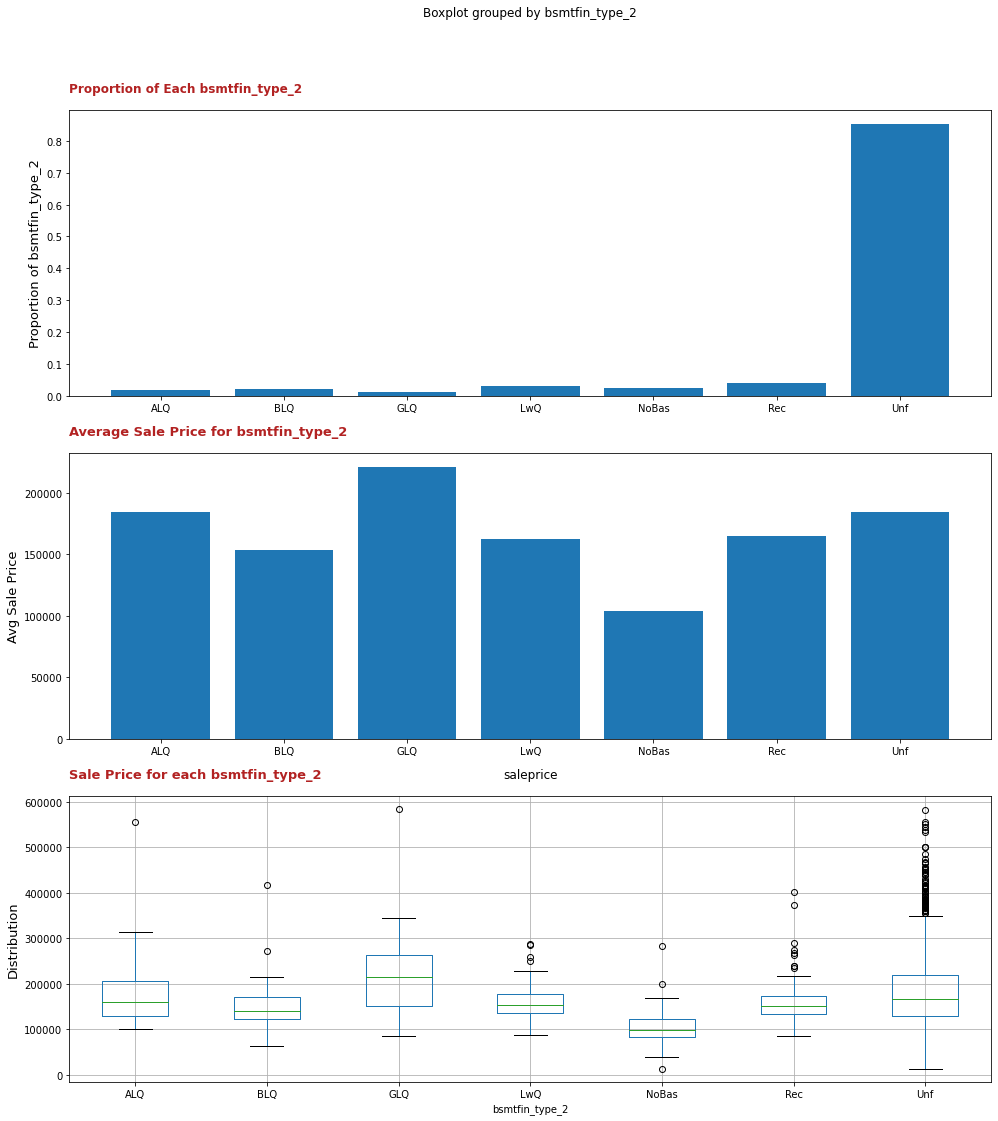

In [109]:
plot_nominal_feature('bsmtfin_type_2')

In [110]:
df[df.bsmtfin_type_1 != df.bsmtfin_type_2]['saleprice'].count()

1365

**Basement Finish Type 2**

Observation
- there are 1368 houses with multiple finish types in basement
- the average sale prices per group in this feature are similar to that of ```bsmtfin_type_1```
- I've already used bsmtfin_type_1 to create a new column of 3 groups and subsequently make dummies for them. 
- I will not include this feature in my model

**Exterior 1**

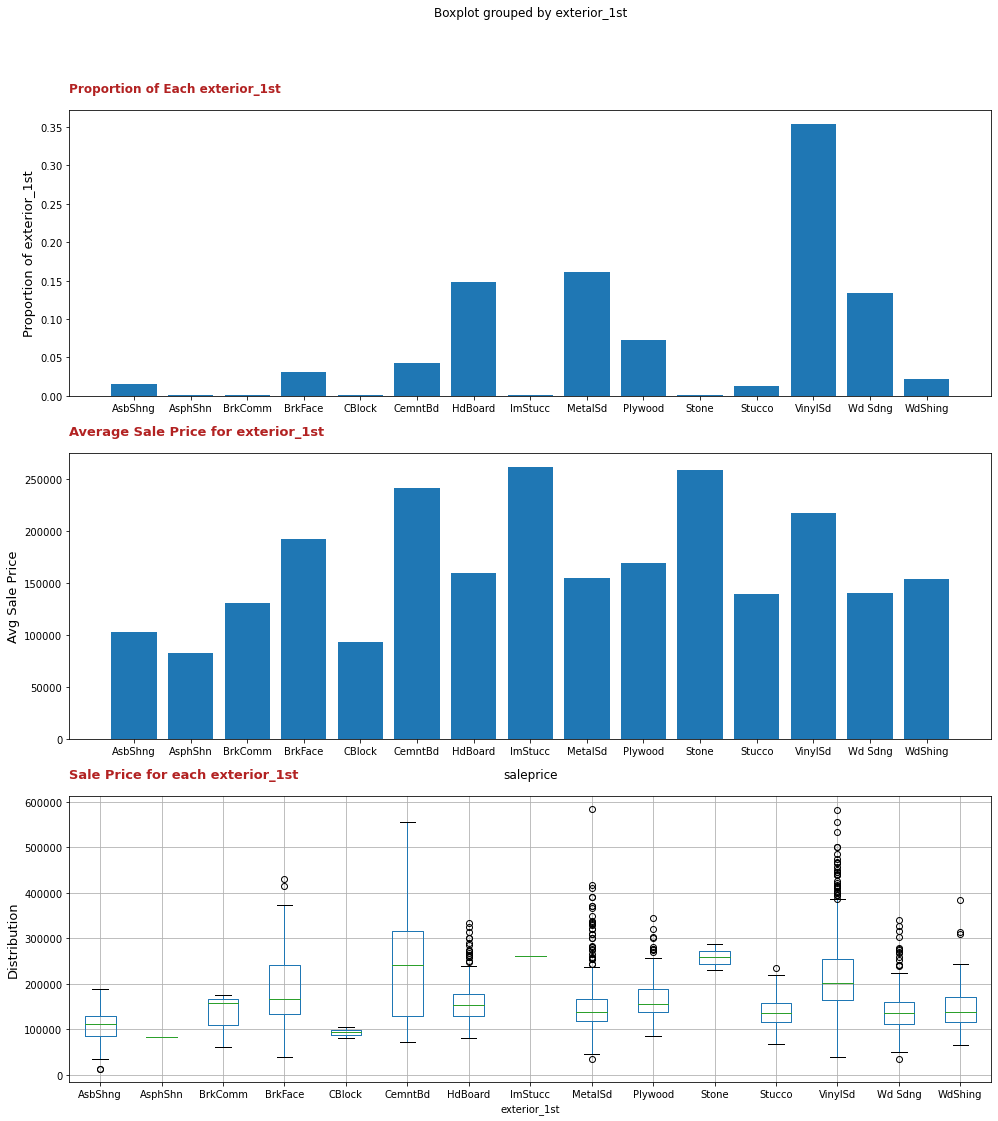

In [111]:
plot_nominal_feature('exterior_1st')

**Exterior 1**

Observations
- qwe

**Exterior 2**

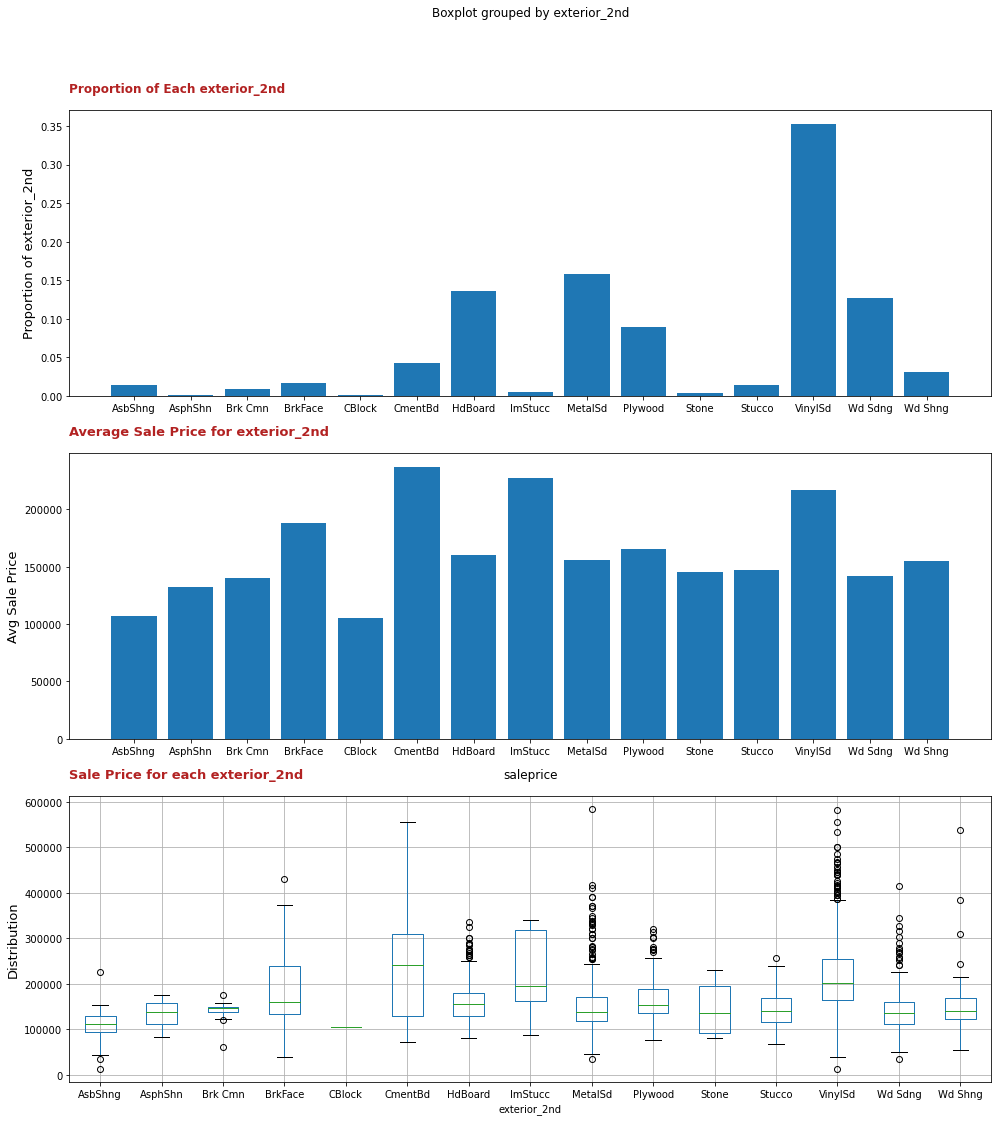

In [112]:
plot_nominal_feature('exterior_2nd')

In [113]:
df[df.exterior_1st != df.exterior_2nd].index.nunique()

309

In [114]:
df[df.exterior_1st != df.exterior_2nd]['saleprice'].mean()

182853.58899676375

In [115]:
df[df.exterior_1st == df.exterior_2nd]['saleprice'].mean()

180100.11482132395

**Roof Style**

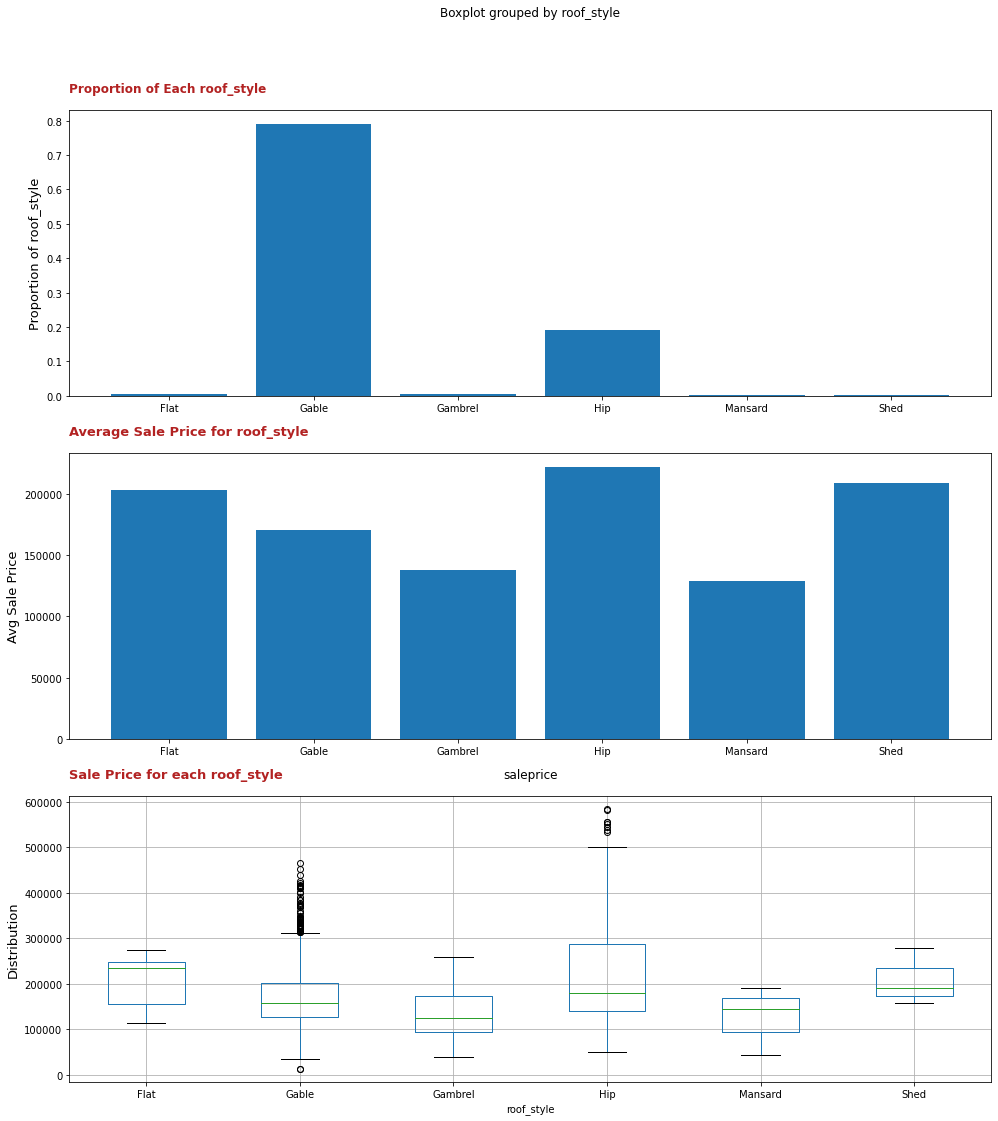

In [116]:
plot_nominal_feature("roof_style")

**Roof Style**

Observations
-qwe

**Roof Material**

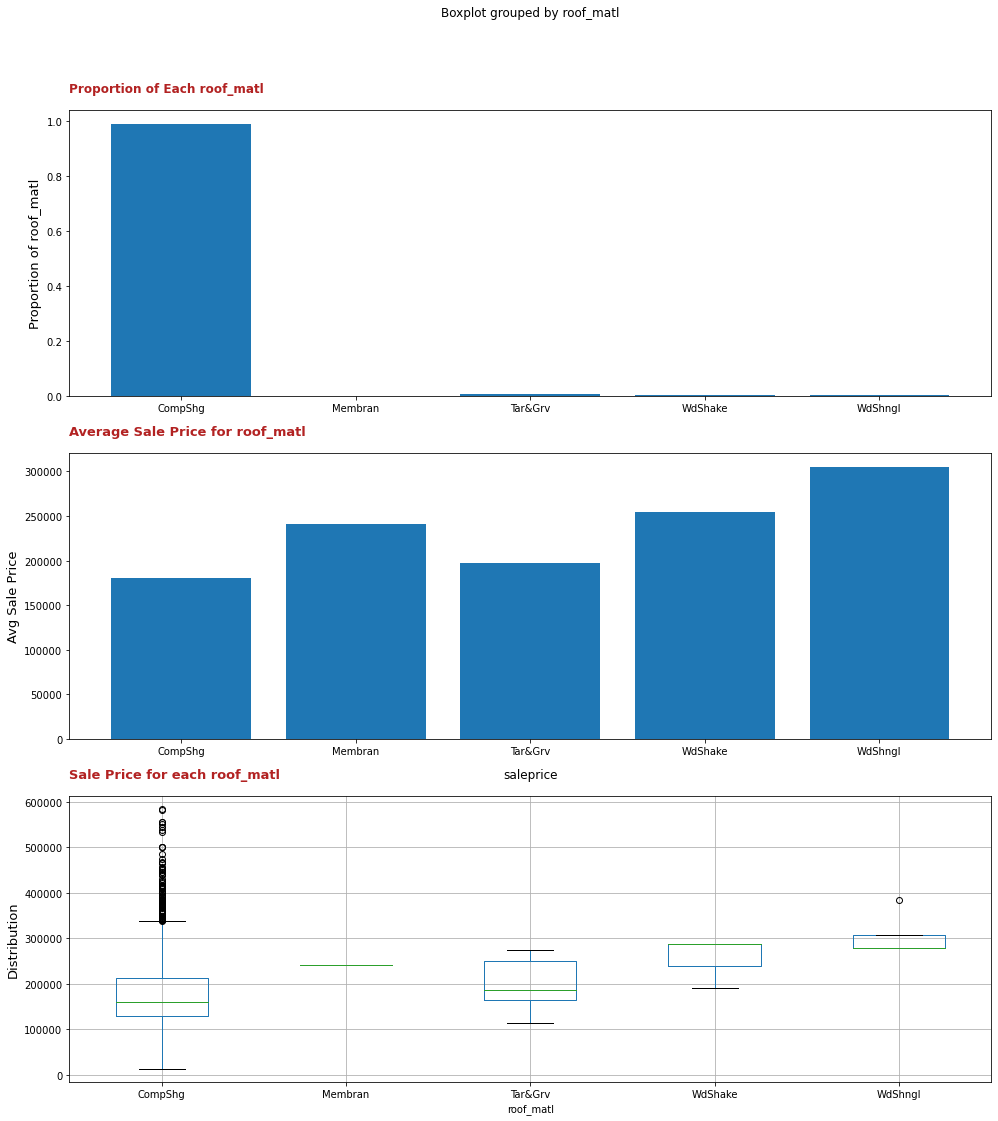

In [117]:
plot_nominal_feature('roof_matl')

In [118]:
df.groupby('roof_matl')['saleprice'].describe()

count           mean           std       min       25%       50%  \
roof_matl                                                                      
CompShg    1995.0  180020.261153  77838.226618   12789.0  129500.0  160500.0   
Membran       1.0  241500.000000           NaN  241500.0  241500.0  241500.0   
Tar&Grv      13.0  197248.769231  55517.515311  113500.0  164000.0  186000.0   
WdShake       3.0  254833.333333  56147.870248  190000.0  238500.0  287000.0   
WdShngl       4.0  305500.000000  53006.288935  278000.0  278750.0  279500.0   

                75%       max  
roof_matl                      
CompShg    213000.0  584500.0  
Membran    241500.0  241500.0  
Tar&Grv    250764.0  274970.0  
WdShake    287250.0  287500.0  
WdShngl    306250.0  385000.0

In [119]:
df.roof_matl.value_counts(normalize=True)

CompShg    0.989583
Tar&Grv    0.006448
WdShngl    0.001984
WdShake    0.001488
Membran    0.000496
Name: roof_matl, dtype: float64

**Roof Material**
- 99% of houses have Standard (Composite) Shingle
- the Sale Price of houses with 'Wood Shakes' is significantly higher, but there are only three houses in this group
- I will not include this feature in my model

**Condition 1 and Condition 2**

**Condition 1 Proximities**

In [120]:
df.groupby(['condition_1', 'condition_2'])['saleprice'].mean()

condition_1  condition_2
Artery       Artery         106500.000000
             Norm           119852.343750
Feedr        Artery         146000.000000
             Feedr          106750.000000
             Norm           143666.343434
             RRAe           190000.000000
             RRAn           136905.000000
             RRNn            96750.000000
Norm         Norm           184569.960368
PosA         Norm           220980.000000
             PosA           423500.000000
PosN         Norm           210948.136364
             PosN           395666.666667
RRAe         Norm           139685.714286
RRAn         Artery         108000.000000
             Feedr          134937.500000
             Norm           186158.222222
RRNe         Norm           129616.666667
RRNn         Artery         128250.000000
             Feedr          128000.000000
             Norm           233250.000000
Name: saleprice, dtype: float64

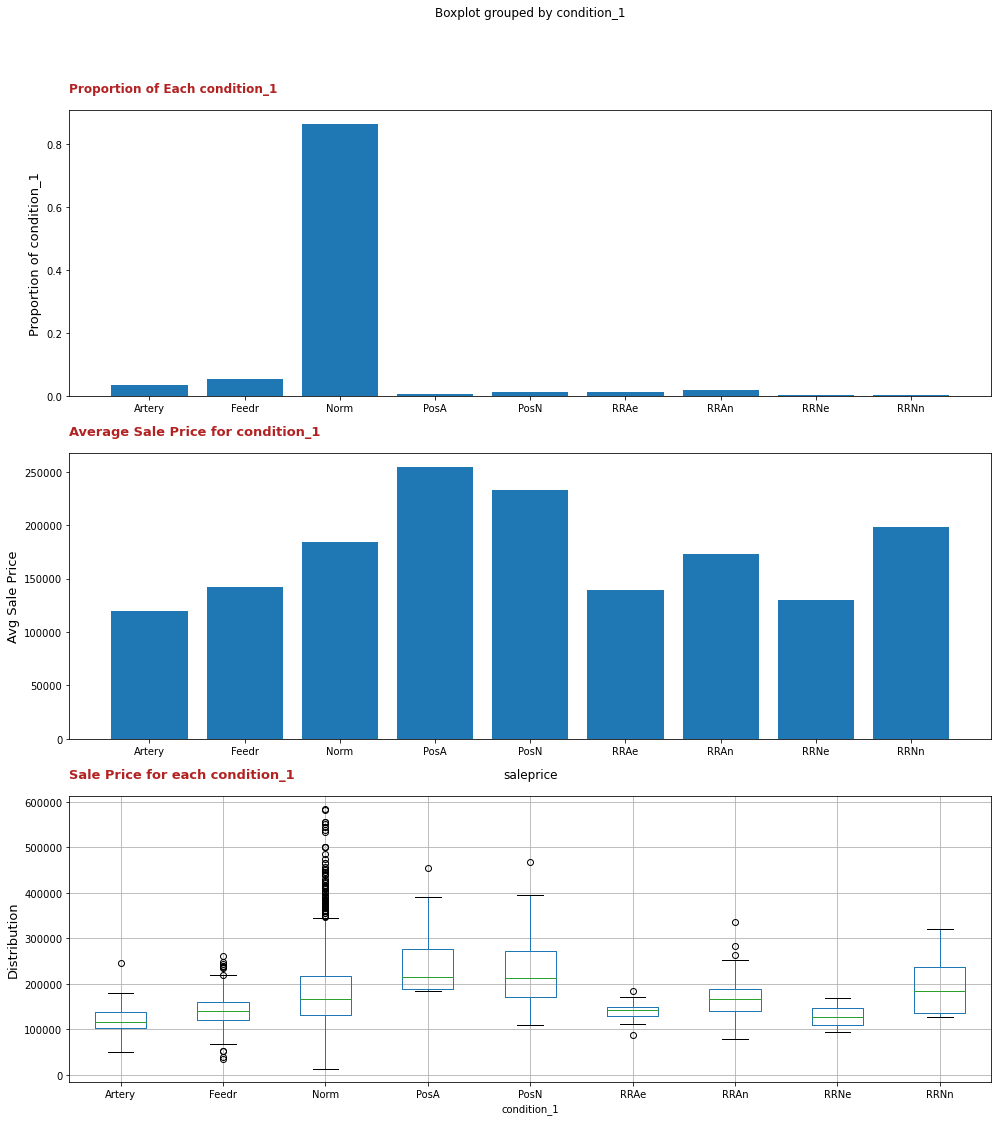

In [121]:
plot_nominal_feature('condition_1')

**Condition 2 Proximities**

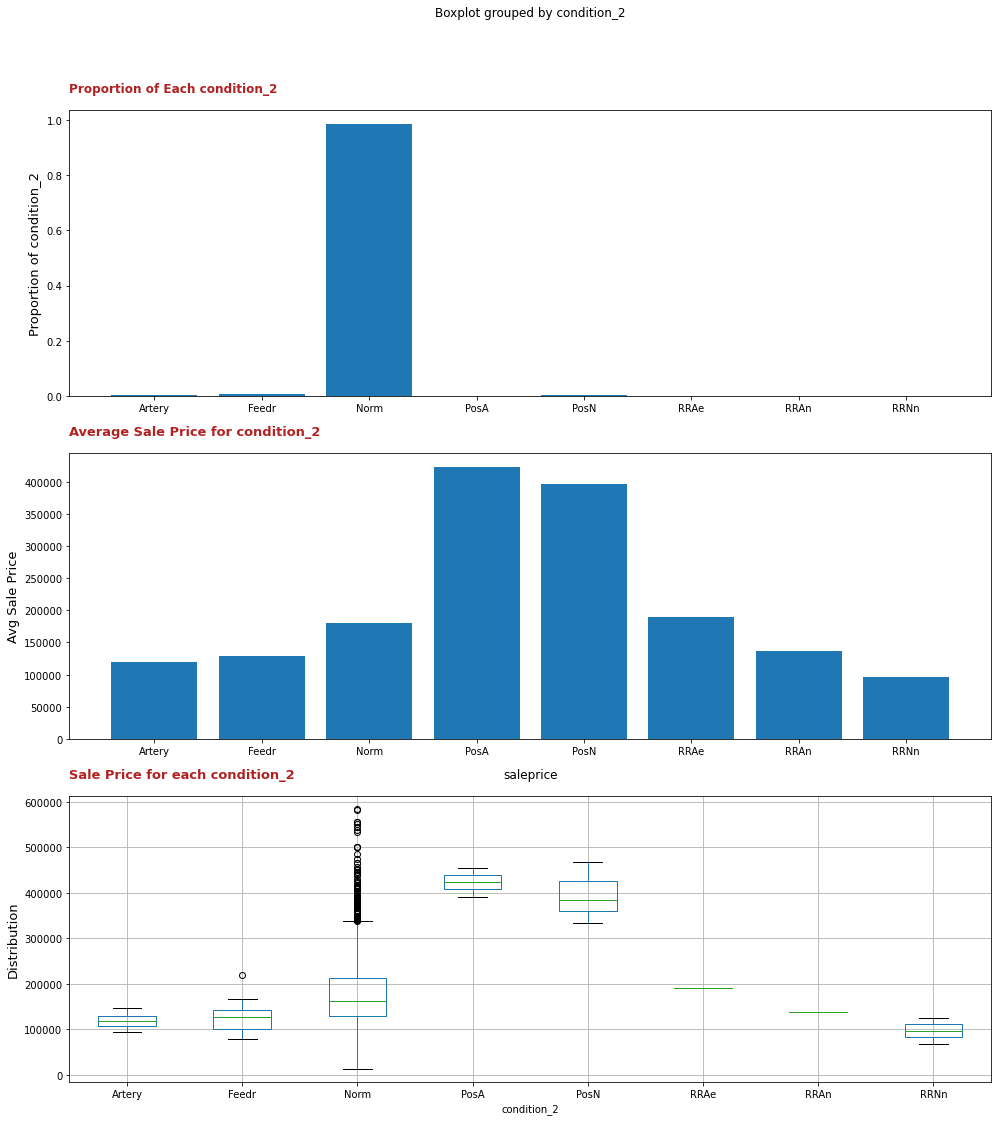

In [122]:
plot_nominal_feature('condition_2')

**Garage Quality and Garage Condition**

Observation
- less than 15% of the dataset have proximities to more than one area
- there are 5 houses with proximities to more than 2 areas (PosA and PosN) meaning they are close to more than 2 parks or green belt areas. Their Sale Prices are signicantly higher. Since there are only 5 houses here, it is not a good indicator for most houses. 
- we will exclude Condition 2 from our model and focus on Condition 1
- we are going to create a new column combining groups based on their similar average Sale Prices
    - ('Artery'), ('Feedr', 'RRAe', 'RRNe'), ('Norm', 'RRAn') ('RRAn'), ('PosA', 'PosN')

- Creating new column combining groups based on similar average Sale Prices

In [123]:
df['condition_bins'] = ['Artery' if x == 'Artery' 
                         else 'Feedr_RRAe_RRNe' if x == 'Feedr' or x == 'RRAe' or x == 'RRNe'
                         else 'Norm_RRAn' if x == 'Norm' or x == 'RRAn'
                         else 'RRAn' if x == 'RRAn'
                         else 'PosA_PosN'
                         for x in df.condition_1]

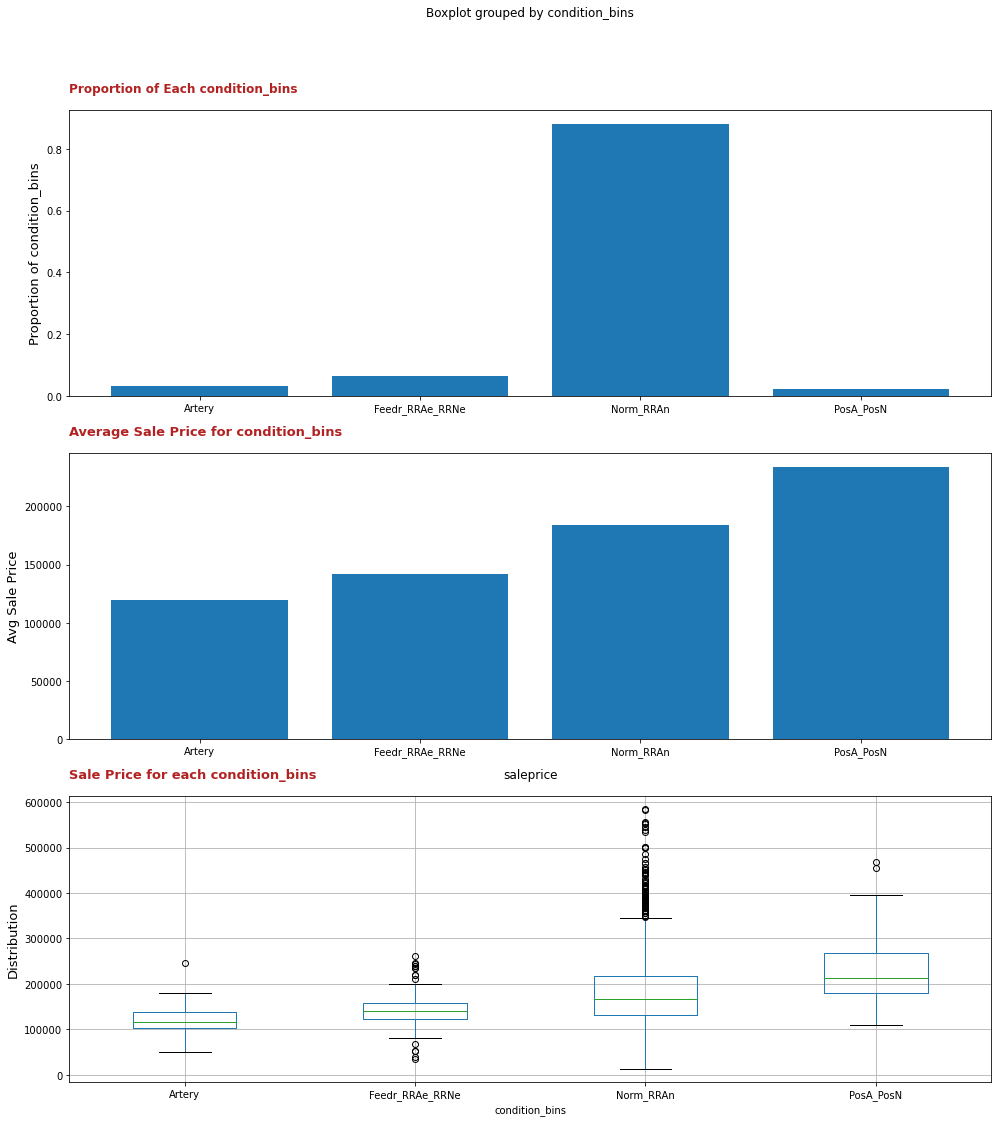

In [124]:
plot_nominal_feature('condition_bins')

- Creating dummies for ```condition_bins``` and joining to df

In [125]:
df = df.join(pd.get_dummies(df.condition_bins, prefix='condition'))

Appending 'condition_Feedr_RRAe_RRNe', 'condition_Norm_RRAn' and 'condition_PosA_PosN' to features list

In [126]:
features.append('condition_Feedr_RRAe_RRNe')
features.append('condition_Norm_RRAn')
features.append('condition_PosA_PosN')

In [127]:
df[(df.condition_2 == 'PosA') | (df.condition_2 == 'PosN')][['condition_1', 'condition_2']]

condition_1 condition_2
511        PosA        PosA
673        PosN        PosN
676        PosN        PosN
747        PosN        PosN
922        PosA        PosA

In [128]:
df[df.condition_1 != df.condition_2].index.nunique()

266

**Neighborhoods**

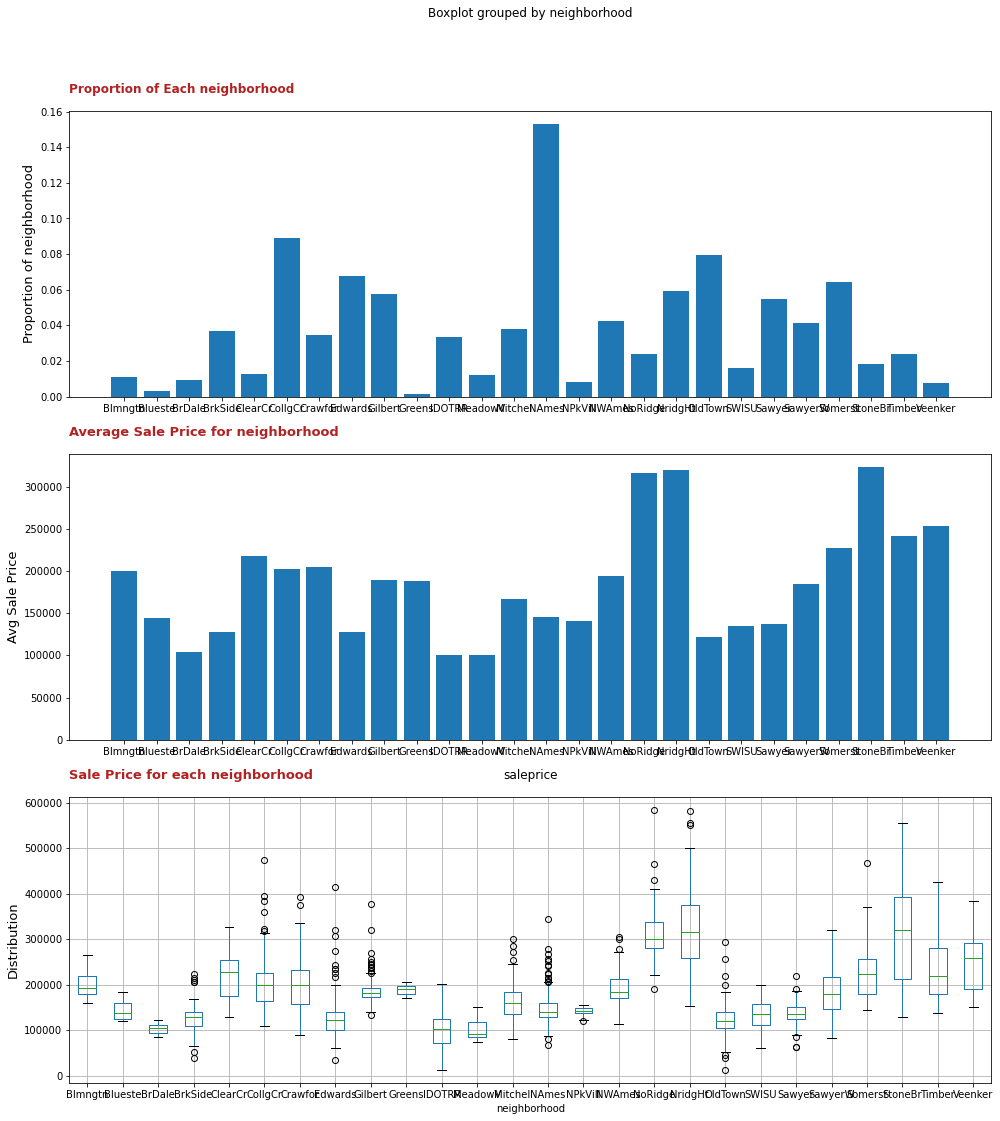

In [129]:
plot_nominal_feature('neighborhood')

**Neighborhoods**

Observation
- the average Sale Price varies widely from neighborhood to neighborhood 
- I'm binning these into 5 bins based on their average Sale Price
- I will subsequently make dummies for these bins and include them in my model

**Neighborhoods Bins** <font color=green>INCLUDED dummies in model</font>

- Creating ```neighborhood_bins``` with neighrborhoods binned by average Sale Price

In [130]:
neighborhood_cuts = pd.cut(df.groupby('neighborhood')['saleprice'].mean(), 
                     bins=5, 
                     labels=[1, 2, 3, 4, 5])
df['neighborhood_bins'] = df.neighborhood.map(neighborhood_cuts.to_dict())

In [131]:
df[df.neighborhood_bins == 1]['neighborhood'].value_counts()

OldTown    160
Edwards    136
Sawyer     110
BrkSide     74
IDOTRR      68
SWISU       32
MeadowV     24
BrDale      19
NPkVill     17
Blueste      6
Name: neighborhood, dtype: int64

In [132]:
df[df.neighborhood_bins == 2]['neighborhood'].value_counts()

NAmes      308
SawyerW     83
Mitchel     77
Greens       3
Name: neighborhood, dtype: int64

In [133]:
df[df.neighborhood_bins == 3]['neighborhood'].value_counts()

CollgCr    180
Somerst    130
Gilbert    116
NWAmes      86
Crawfor     70
ClearCr     26
Blmngtn     22
Name: neighborhood, dtype: int64

In [134]:
df[df.neighborhood_bins == 4]['neighborhood'].value_counts()

Timber     48
Veenker    16
Name: neighborhood, dtype: int64

In [135]:
df[df.neighborhood_bins == 5]['neighborhood'].value_counts()

NridgHt    120
NoRidge     48
StoneBr     37
Name: neighborhood, dtype: int64

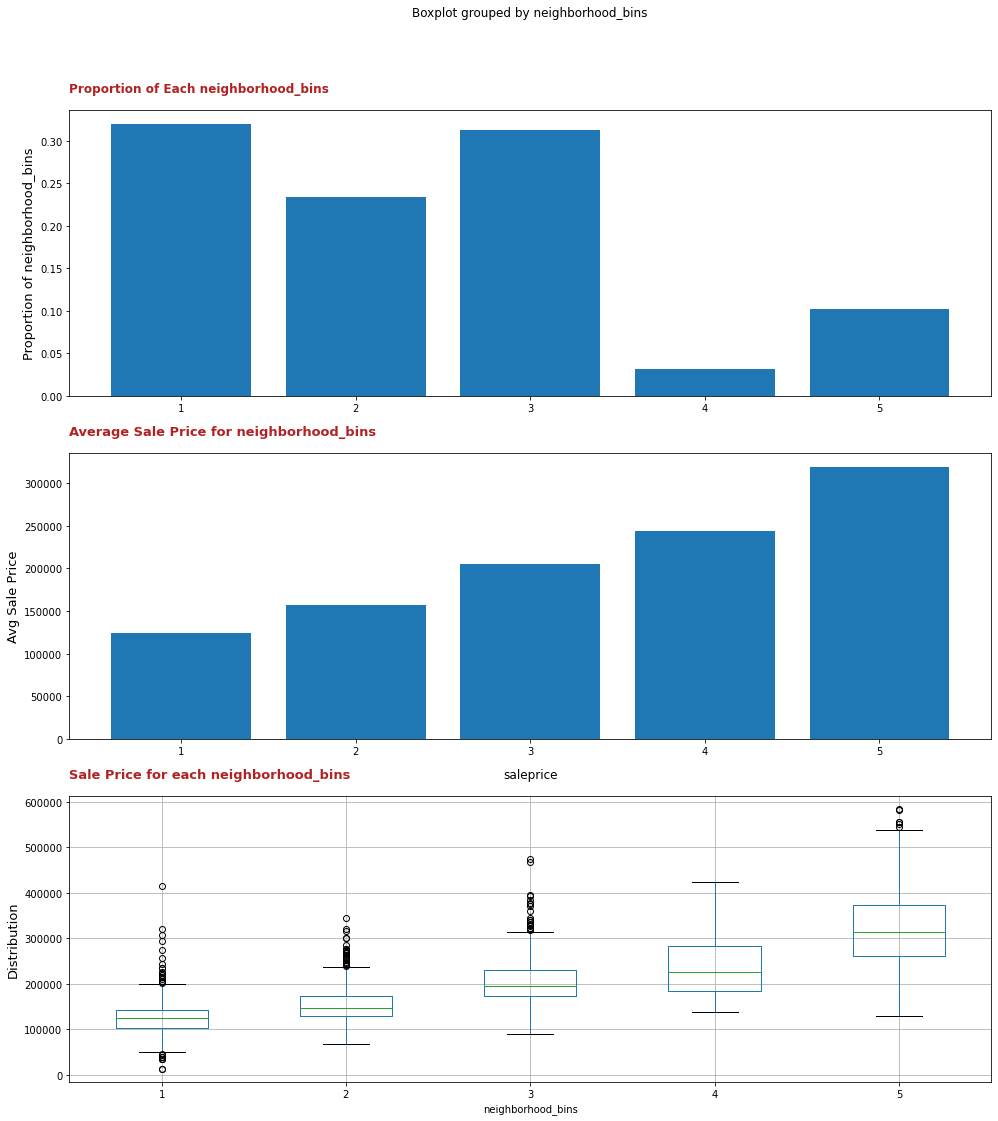

In [136]:
plot_nominal_feature('neighborhood_bins')

In [137]:
df.groupby('neighborhood_bins')['saleprice'].mean()

neighborhood_bins
1    124188.955108
2    156362.605096
3    204772.477778
4    244080.703125
5    319180.375610
Name: saleprice, dtype: float64

In [138]:
df['neighborhood_bins'].value_counts(normalize=True)

1    0.320437
3    0.312500
2    0.233631
5    0.101687
4    0.031746
Name: neighborhood_bins, dtype: float64

- creating dummies for ```neighborhood_bins``` and joinin gto df

In [139]:
df = df.join(pd.get_dummies(df.neighborhood_bins, prefix='neighborhood_bin'))

Appending 'neighborhood_bin_2', 'neighborhood_bin_3', 'neighborhood_bin_4' and 'neighborhood_bin_5' to features list

In [140]:
features.append('neighborhood_bin_2')
features.append('neighborhood_bin_3')
features.append('neighborhood_bin_4')
features.append('neighborhood_bin_5')

**Neighborhoods Bins**

Observation
- These groups have differences in average Sale Price greater than 30,000
- I will include bins 2 through 5 as dummies in my model

**Heating**

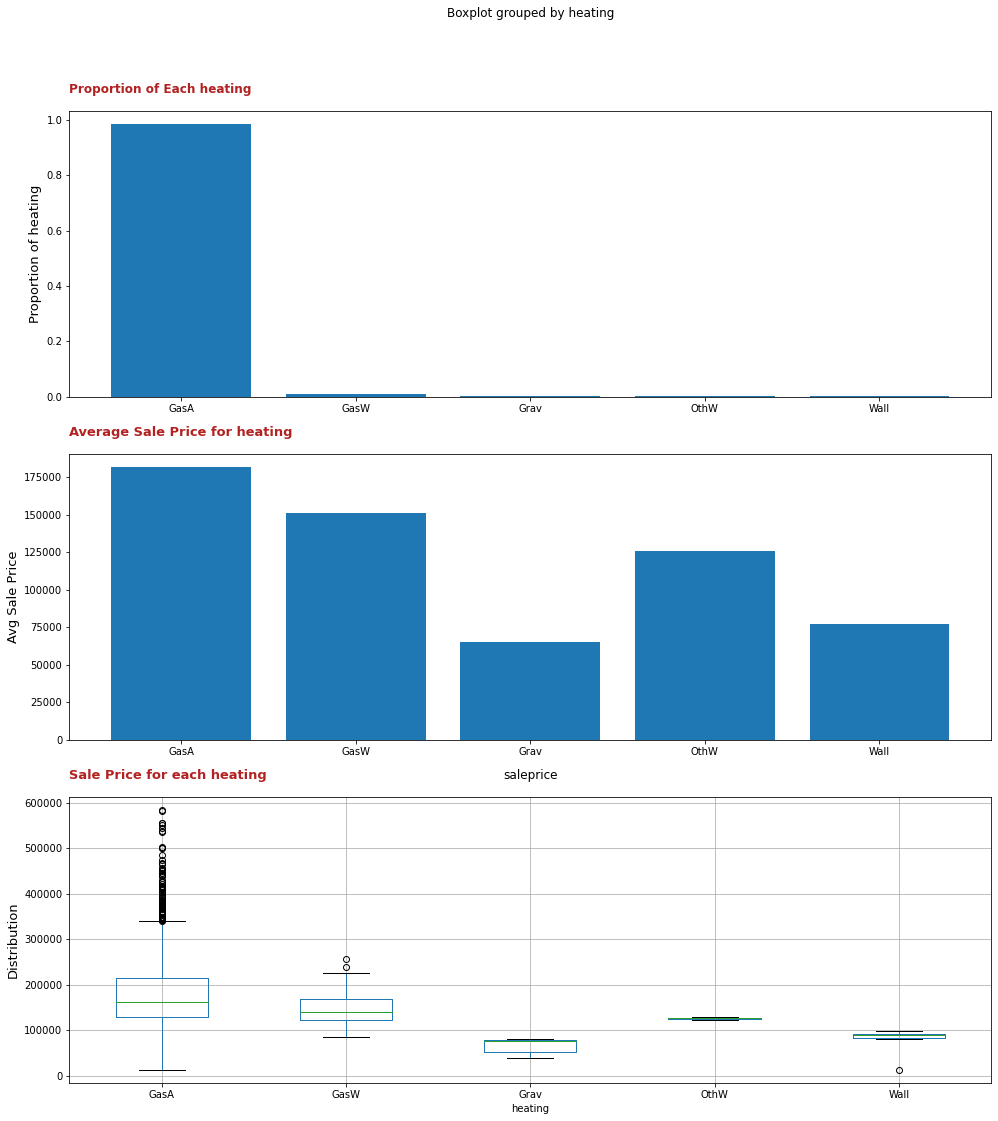

In [141]:
plot_nominal_feature('heating')

In [142]:
df.heating.value_counts(normalize=True)

GasA    0.983631
GasW    0.009921
Wall    0.002976
Grav    0.002480
OthW    0.000992
Name: heating, dtype: float64

In [143]:
df.groupby('heating')['saleprice'].describe()

count           mean           std       min       25%       50%  \
heating                                                                      
GasA     1983.0  181475.973273  77852.489702   12789.0  130000.0  163000.0   
GasW       20.0  151275.000000  48576.438679   85000.0  123125.0  140000.0   
Grav        5.0   65180.000000  18998.342033   37900.0   52500.0   76500.0   
OthW        2.0  125750.000000   5303.300859  122000.0  123875.0  125750.0   
Wall        6.0   77150.000000  31860.618324   13100.0   82925.0   88750.0   

              75%       max  
heating                      
GasA     214000.0  584500.0  
GasW     168250.0  256000.0  
Grav      79000.0   80000.0  
OthW     127625.0  129500.0  
Wall      92175.0   98000.0

**Heating**

Observation
- 98% of the dataset is recorded as having GasA This feature will not be a good predictor for our model
- we will not include this feature in our model

**Foundation**

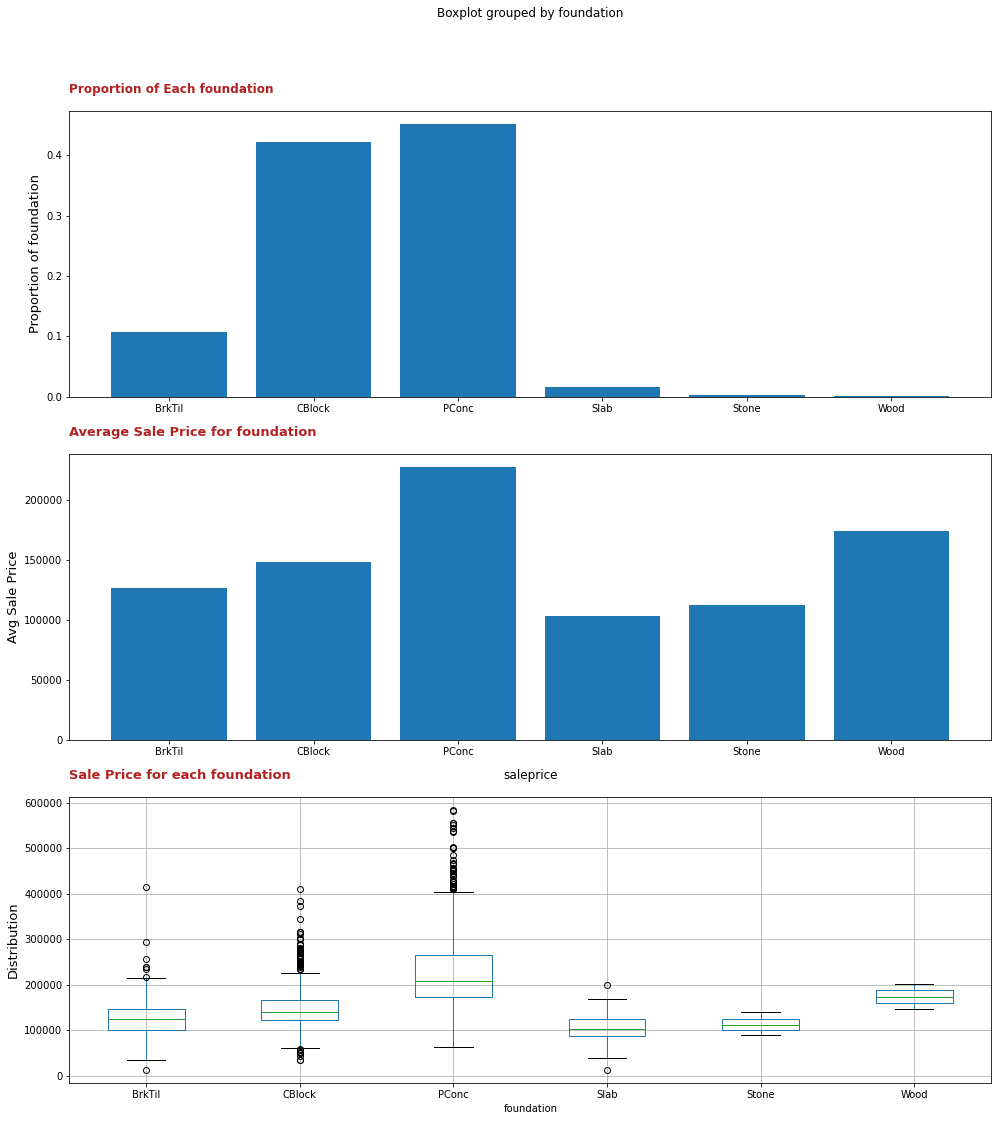

In [144]:
plot_nominal_feature('foundation')

In [145]:
df.groupby('foundation')['saleprice'].describe()

count           mean           std       min       25%       50%  \
foundation                                                                     
BrkTil      217.0  126463.976959  45547.586496   12789.0  101000.0  125000.0   
CBlock      851.0  148076.501763  45483.986223   34900.0  122250.0  140000.0   
PConc       909.0  226914.004400  83068.013179   63000.0  173000.0  208300.0   
Slab         33.0  103480.696970  37042.002989   13100.0   87500.0  101800.0   
Stone         4.0  112419.000000  21815.819428   89000.0   99332.0  110388.0   
Wood          2.0  173750.000000  39951.533137  145500.0  159625.0  173750.0   

                 75%       max  
foundation                      
BrkTil      147500.0  415000.0  
CBlock      165325.0  410000.0  
PConc       266000.0  584500.0  
Slab        125000.0  198500.0  
Stone       123475.0  139900.0  
Wood        187875.0  202000.0

In [146]:
df[df['foundation'] == 'Wood']['saleprice']

733    202000
795    145500
Name: saleprice, dtype: int64

In [147]:
df[df['foundation'] == 'Stone']['saleprice'].sum() - 266500 

183176

**Foundation**
- I'm removing one outlier for stone to even its distribution 

**Garage Type**

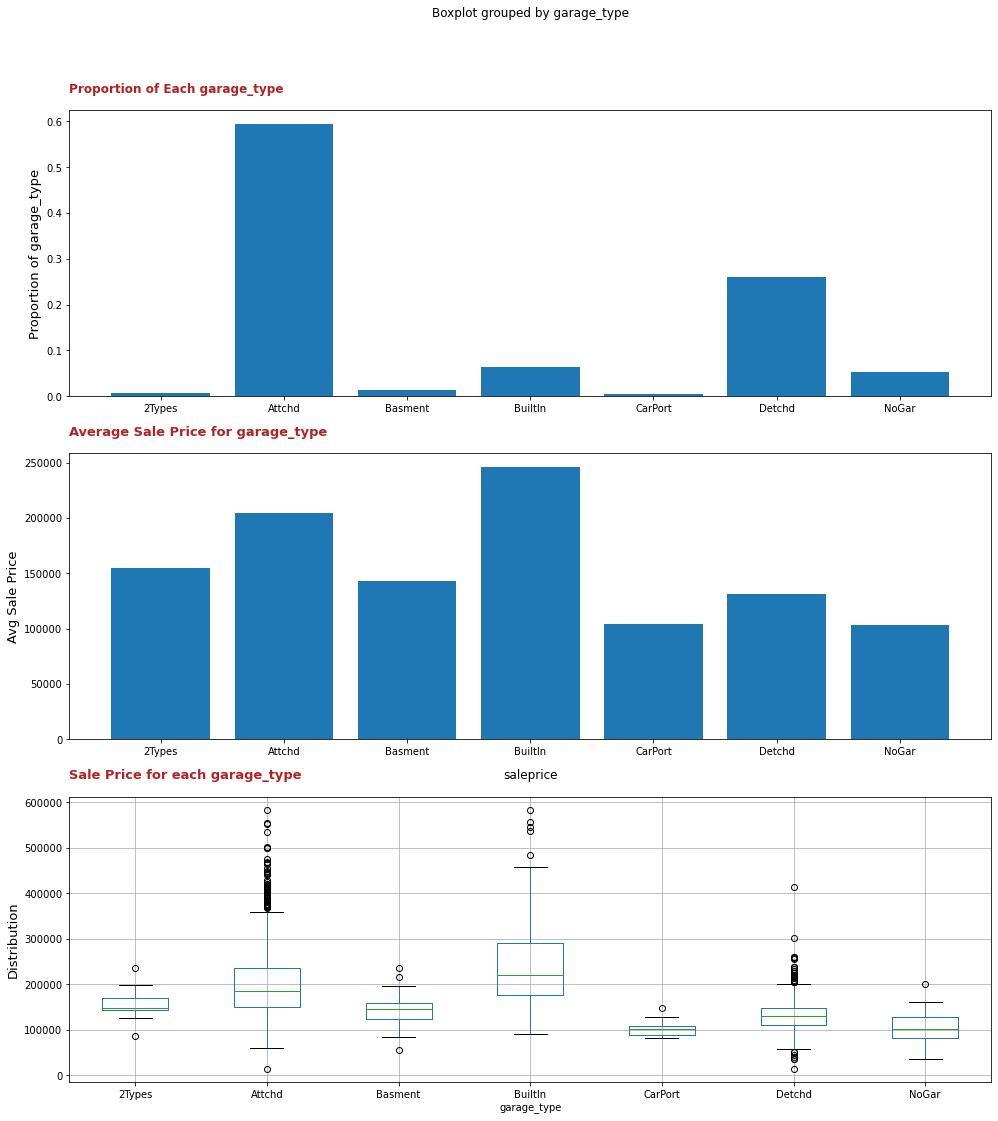

In [148]:
plot_nominal_feature('garage_type')

In [149]:
df.groupby('garage_type')['saleprice'].mean()

garage_type
2Types     154406.250000
Attchd     204092.623539
Basment    143242.333333
BuiltIn    245904.069767
CarPort    103823.545455
Detchd     131121.159393
NoGar      103028.833333
Name: saleprice, dtype: float64

**Garage Type**

Observations
- 

**Lot Configuration** <font color=green>INCLUDED! Dummies in model</font>

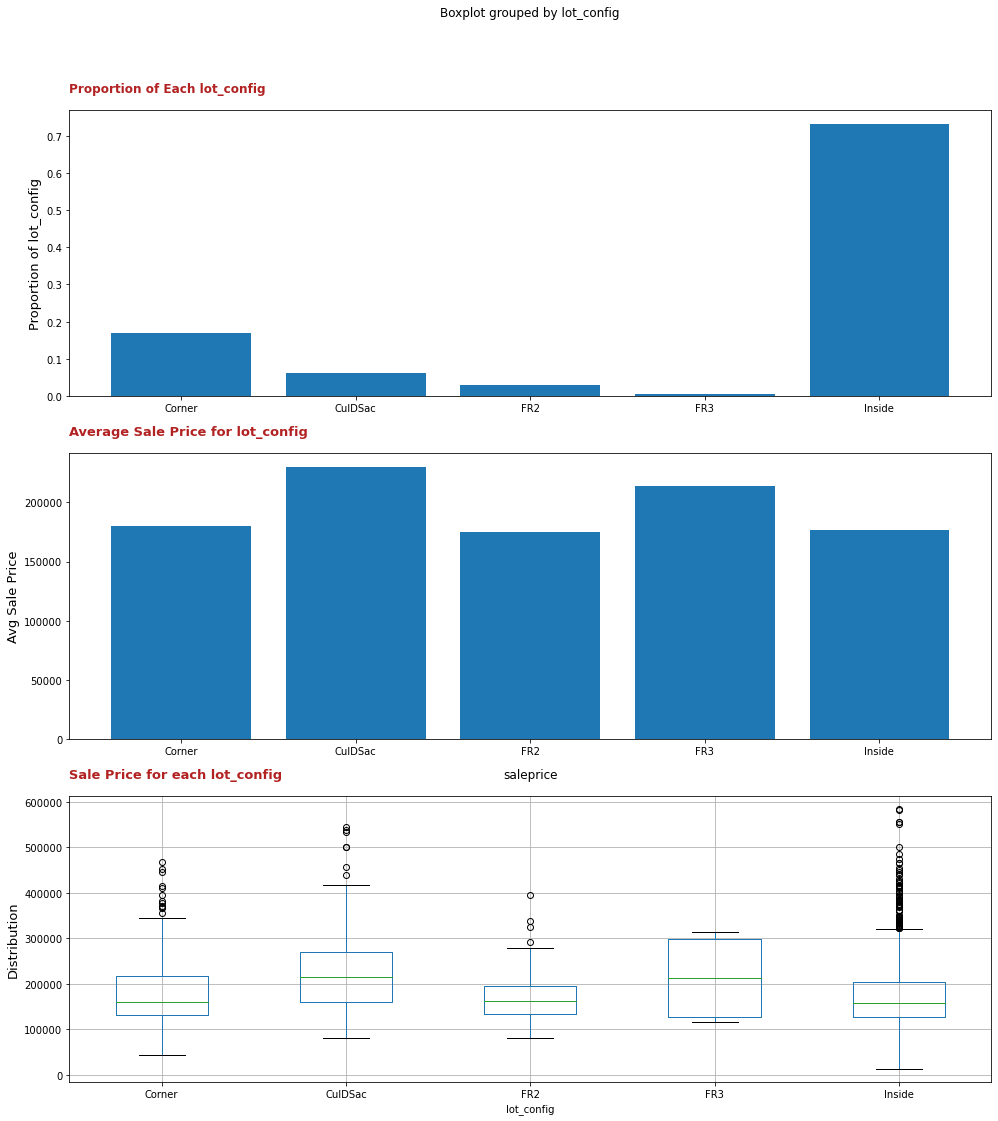

In [150]:
plot_nominal_feature('lot_config')

In [151]:
df.lot_config.value_counts(normalize=True)

Inside     0.733631
Corner     0.170139
CulDSac    0.062500
FR2        0.029762
FR3        0.003968
Name: lot_config, dtype: float64

**Lot Configuration**
- 'Cul-de-sac' and 'Frontage on 3 sides' are similar in average Sale Price
- the other three categories are similar in their average Sale Prices
- I'm going to group them into 2 groups, create dummies for them, and drop the majority.  

- Reducing category groups to 2: 'lot_config_col_fr3', 'lot_config_other'

In [152]:
df['lot_config_2'] = ['lot_config_col_fr3' if 'FR3' in func else
                      'lot_config_col_fr3' if 'CulDSac' in func else
                      'lot_config_other' for func in df.lot_config]

- Creating dummies for the new categories and joining them to the dataframe. 

In [153]:
df = df.join(pd.get_dummies(df['lot_config_2']))

In [154]:
features.append('lot_config_col_fr3')

**Street**

In [155]:
df.street.value_counts(normalize=True)

Pave    0.996528
Grvl    0.003472
Name: street, dtype: float64

**Street**

Observations
- 99% of houses are listed as being on paved roads. This feature will not benefit our model.

**Land Contour** <font color=green>INCLUDED dummies in model</font>

In [156]:
df.land_contour.value_counts(normalize=True)

Lvl    0.899306
HLS    0.042163
Bnk    0.038194
Low    0.020337
Name: land_contour, dtype: float64

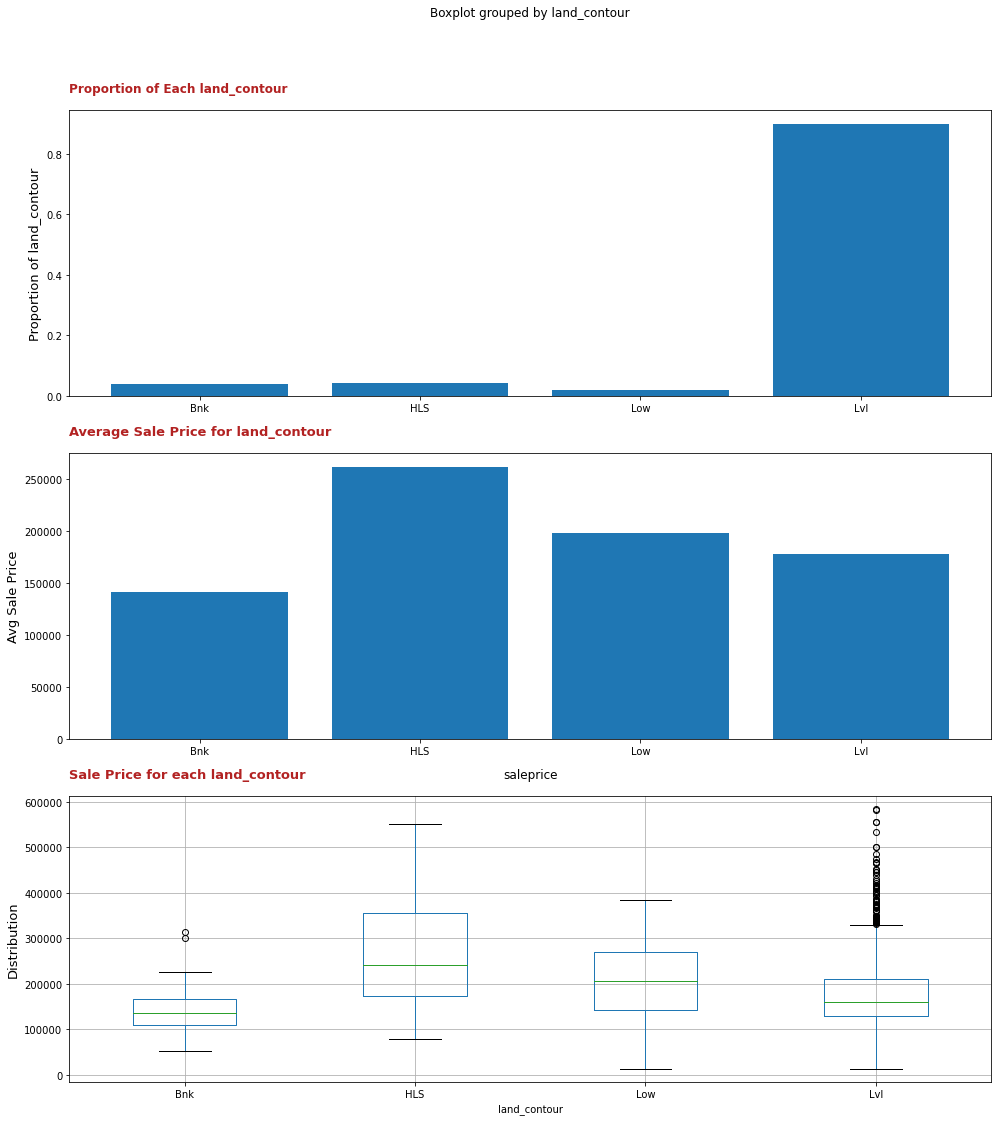

In [157]:
plot_nominal_feature('land_contour')

In [158]:
df.land_contour.value_counts()

Lvl    1813
HLS      85
Bnk      77
Low      41
Name: land_contour, dtype: int64

**Land Contour**

Observation
- 'Lvl' makes up 90% of the dataset is is scewed right significantly
- 'Hills' makes up 5% of the dataset and average Sale Price is highest
- 'Lev' and 'Low' have similar average Sale Prices, so I'm going to group them together, then create bins from the new column ```land_contour_bins```

- Creating new column ```land_contour_bins``` to group 'Lev' and 'Low'. 

In [159]:
df['land_contour_bins'] = ['Lev_Low' if x == 'Lev' or x == "Low"
                             else x 
                             for x in df.land_contour]

- Creating dummies for ```land_contour_bins``` and joining them to df

In [160]:
df = df.join(pd.get_dummies(df.land_contour_bins, prefix='land_contour'))

Appending 'land_contour_Bnk', 'land_contour_HLS' and 'land_contour_Lev_Low' to features list

In [161]:
features.append('land_contour_Bnk') 
features.append('land_contour_HLS')
features.append('land_contour_Lev_Low')

**MS Zoning**

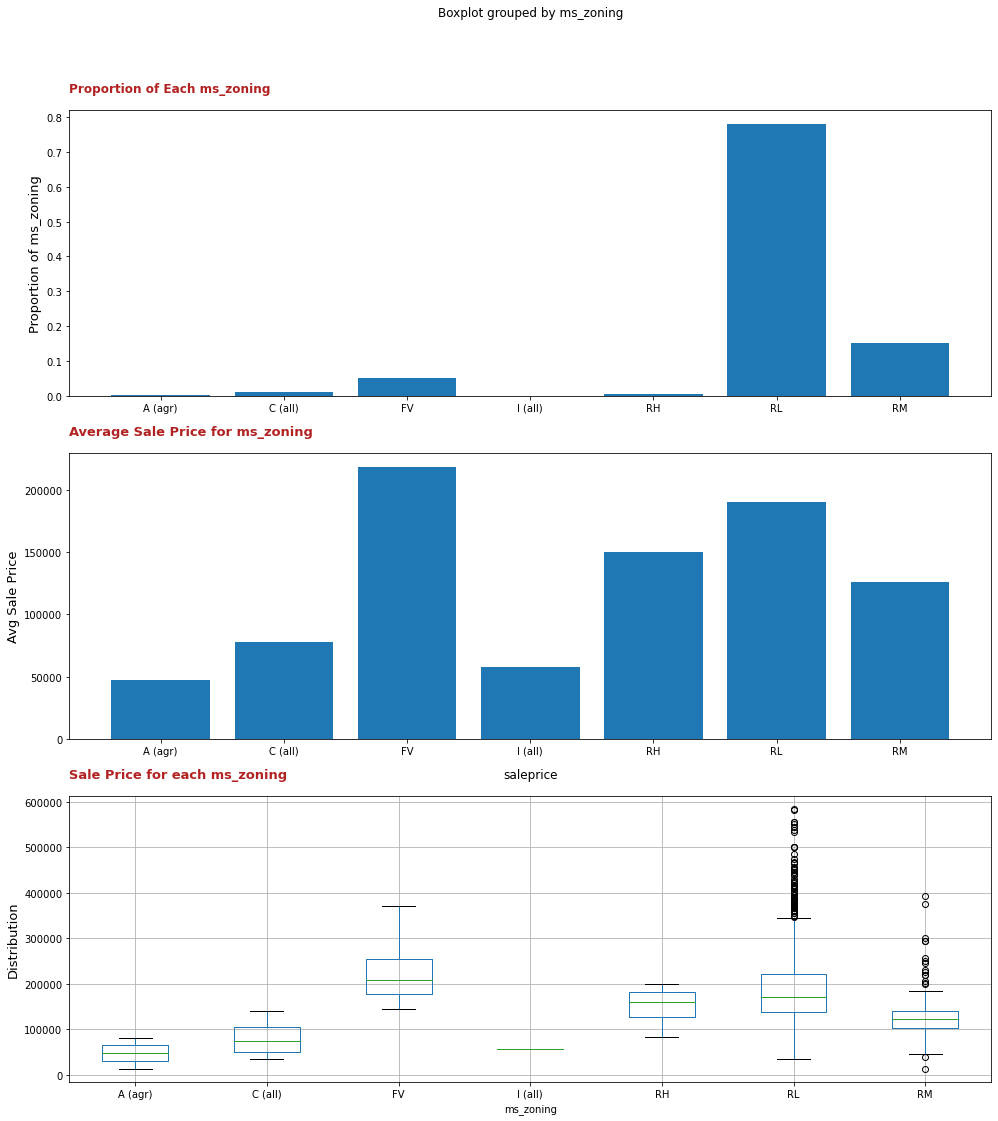

In [162]:
plot_nominal_feature('ms_zoning')

**MS Zoning**

**Suspected Related Features: Year Built, Remodeled, Stories, Type, Family**

Year Built

Year Remod/Add

MS SubClass

House Style 

Bldg Type 

**House Style**

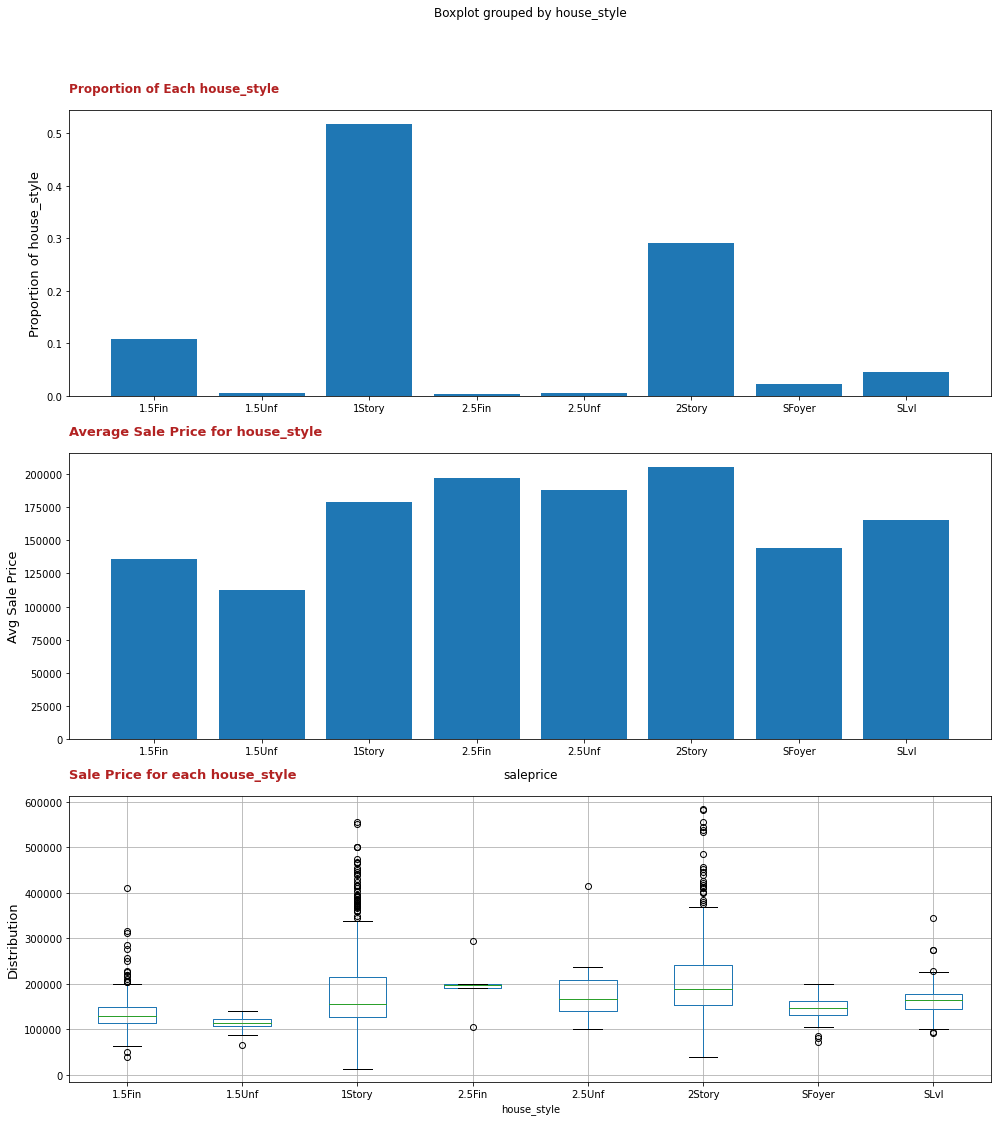

In [163]:
plot_nominal_feature('house_style')

**House Style**

**Building Type**

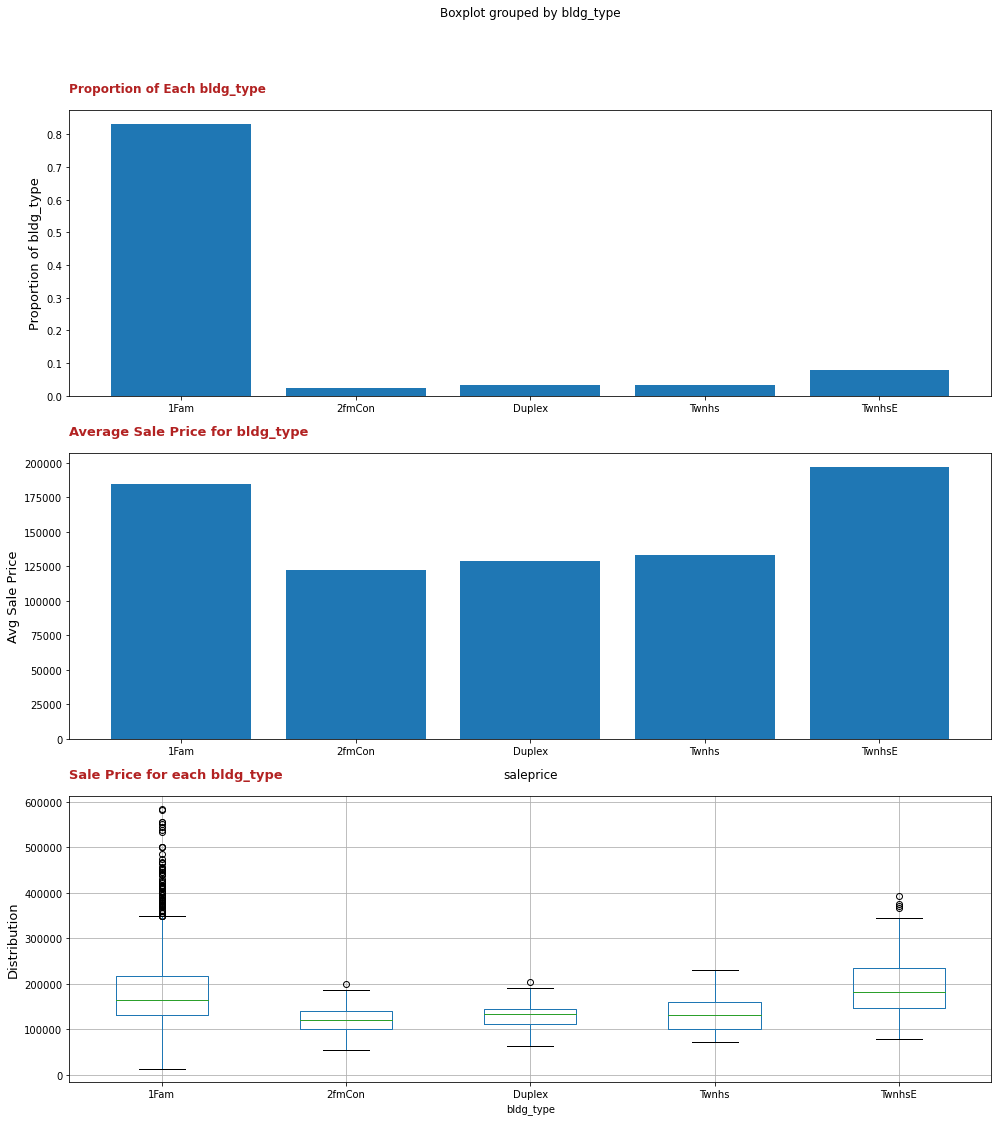

In [164]:
plot_nominal_feature('bldg_type')

**Building Type**

In [165]:
df.ms_subclass.value_counts()

20     763
60     390
50     197
120    130
30     100
70      88
160     87
80      84
90      64
190     45
85      28
75      13
180     11
45      11
40       4
150      1
Name: ms_subclass, dtype: int64

In [166]:
def find_unique_combos(feat1, feat2):
    lst = []
    for i in df.groupby(feat1)[feat2].value_counts().index:
        if i[0] == i[1]:
            pass
        else:
            lst.append(tuple(sorted(i)))
    return len(tuple(set(lst)))

In [167]:
find_unique_combos('condition_1', 'condition_2')

14

In [168]:
find_unique_combos('overall_qual', 'overall_cond')

28

In [169]:
find_unique_combos('exter_qual', 'exter_cond')

7

### Ordinal Features

There are 23 ordinal variables

In [170]:
ordinal_features = ['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
                    'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
                    'bsmtfin_type_1', 'bsmtfintype_2', 'heatingqc', 'electrical', 
                    'kitchenqual', 'functional', 'fireplacequ', 'garage_finish', 
                    'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']

ordinal_to_inspect = ['overall_qual', 'overall_cond',
                     'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
                     'bsmtfin_type_1', 'bsmtfintype_2', 'heatingqc', 'electrical', 
                     'kitchenqual','fireplacequ', 'garage_finish', 
                     'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']

selected_ordinal_feats = []

**Garage Quality and Garage Condition**

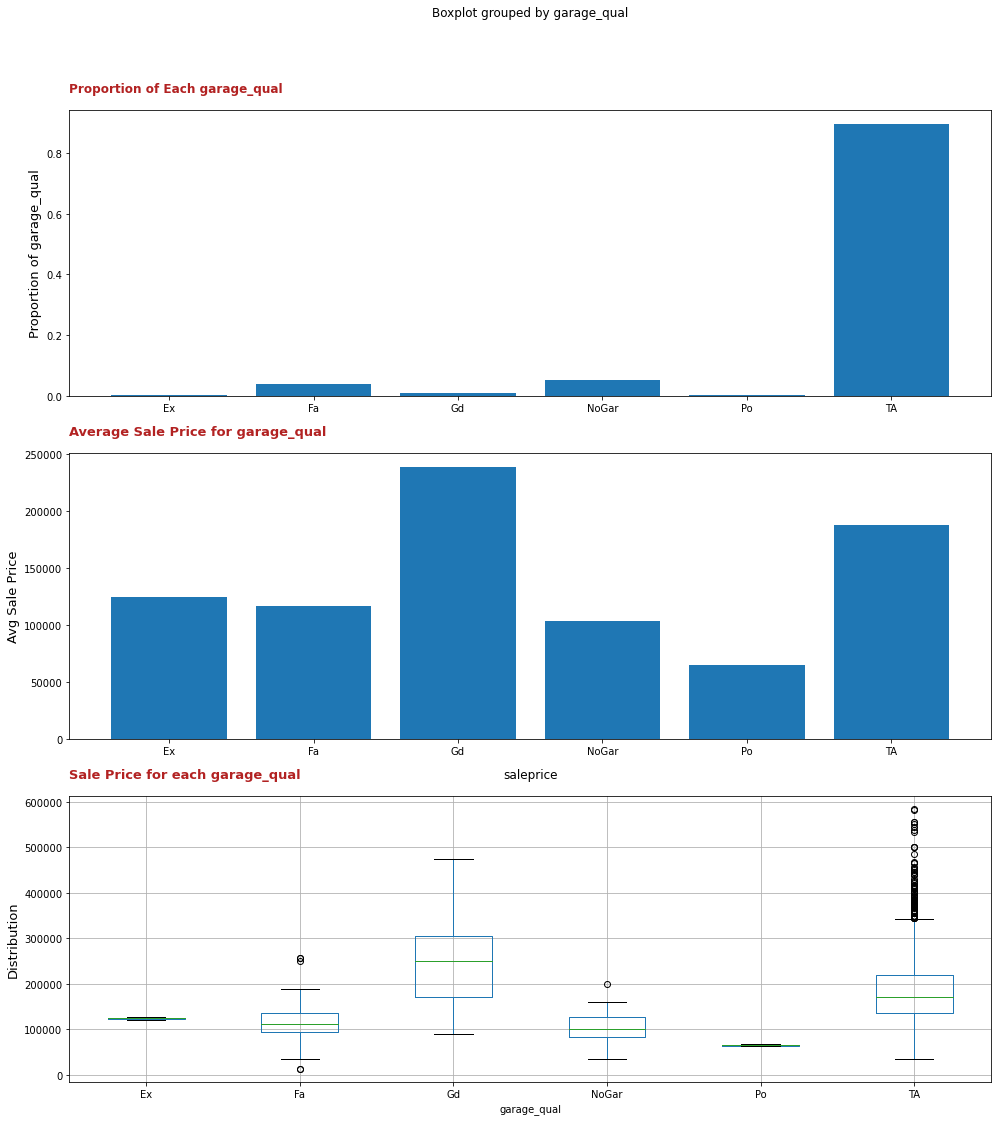

In [171]:
plot_nominal_feature('garage_qual')

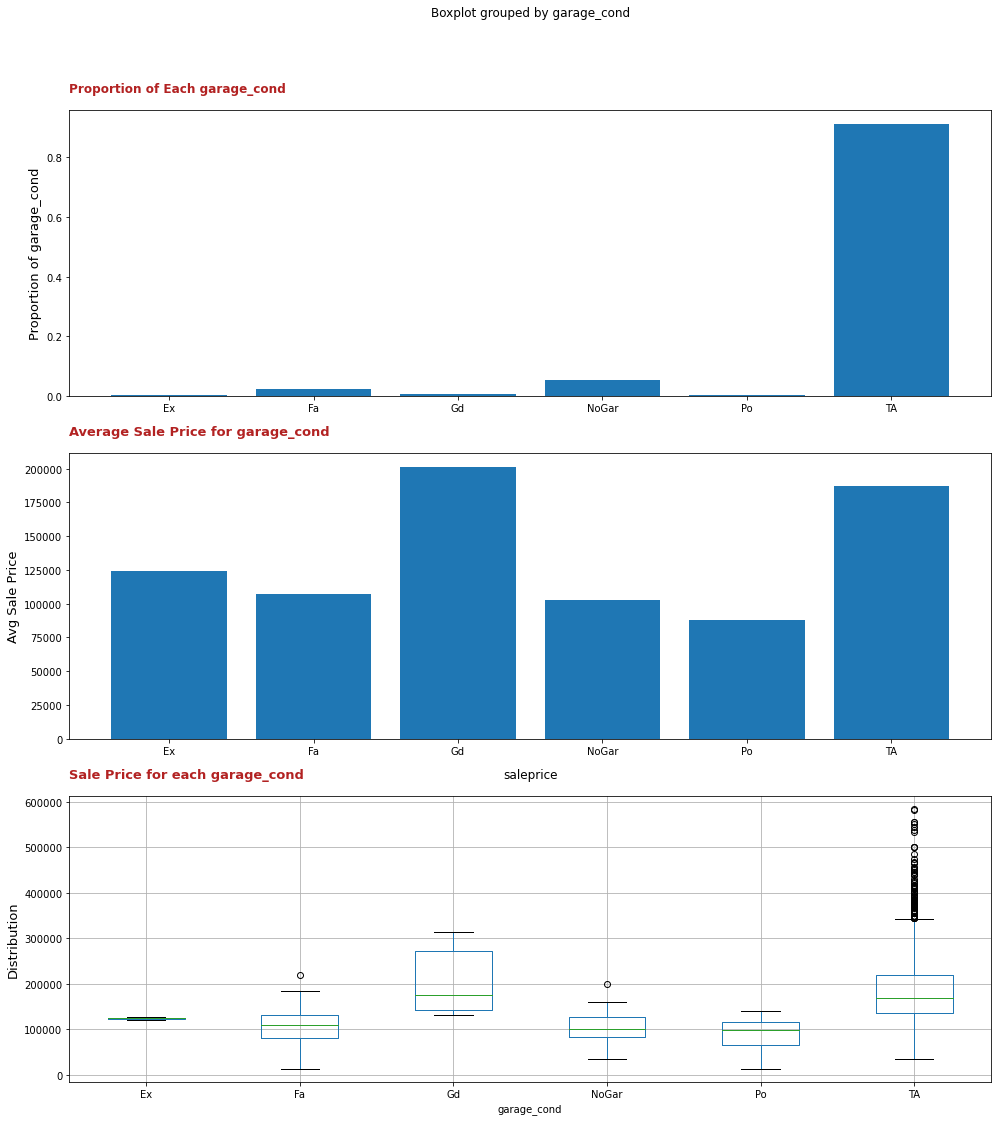

In [172]:
plot_nominal_feature('garage_cond')

In [173]:
df.garage_qual.value_counts()

TA       1808
NoGar     108
Fa         80
Gd         16
Ex          2
Po          2
Name: garage_qual, dtype: int64

In [174]:
df.garage_cond.value_counts()

TA       1841
NoGar     108
Fa         47
Gd         11
Po          7
Ex          2
Name: garage_cond, dtype: int64

In [175]:
df[df.garage_qual != df.garage_cond].index.nunique()

90

In [176]:
df[df.garage_cond == 'Ex']['saleprice'].mean() - \
df[df.garage_cond == 'Po']['saleprice'].mean()

36371.428571428565

In [177]:
df[df.garage_cond == 'Gd']['saleprice'].mean() - \
df[df.garage_cond == 'TA']['saleprice'].mean()

14217.82939114116

In [178]:
df[df.garage_cond == 'TA']['saleprice'].mean() - \
df[df.garage_cond == 'Ex']['saleprice'].mean()

63224.897881586105

**Garage Quality and Garage Condition**

Observation 
- there are 90 houses with differences in garage quality and garage condition, so I will only use one of these features
- 90% of the houses have 'Typical' garages and Sale Price is skewed right 
- 'Gd' 'TA' garages' average Sale Price have a difference of 14,000
- all other garages (including no garage) have a difference of in average Sale Price of 36,000
- I'm going to create a new column with 2 groups ('Gd', 'TA') & ('Po', 'NoGar', 'Fa', 'Ex)
- Then I'm going to create dummies for this new column

**Garage Condition Bins** <font color=green>INCLUDED dummies in model</font>

- Creating new ```garage_cond_bins``` by grouping ('Gd', 'TA') & ('Po', 'NoGar', 'Fa', 'Ex)

In [179]:
df['garage_cond_bins'] = ['Gd_Ta' if x == 'Gd' or x == 'TA'
                         else 'Po_NoGar_Fa_Ex'
                         for x in df.garage_cond]

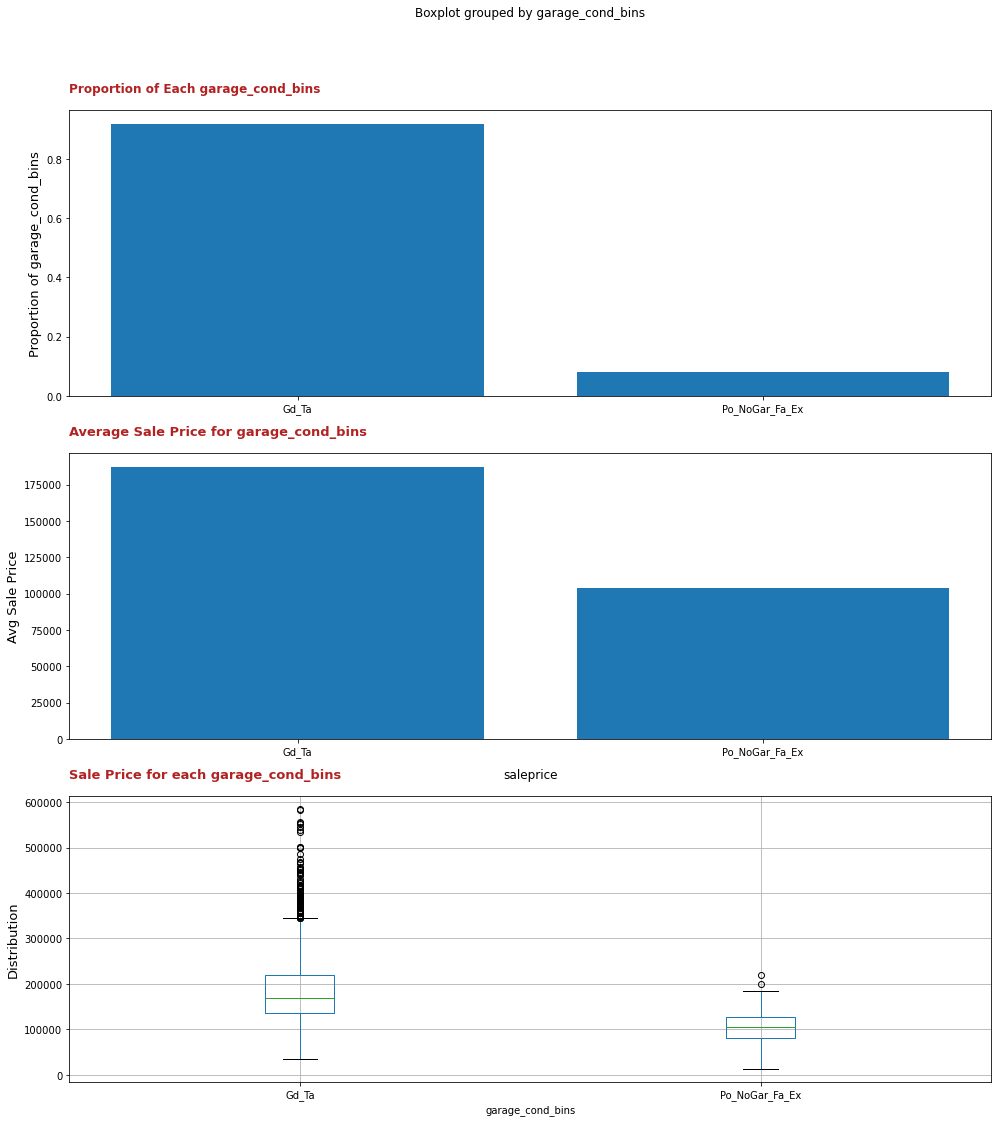

In [180]:
plot_nominal_feature('garage_cond_bins')

- Creating dummies for ```garage_cond_bins``` and joining them to df

In [181]:
df = df.join(pd.get_dummies(df.garage_cond_bins, prefix='garage_cond'))

Appending 'garage_cond_Gd_Ta' to features list

In [182]:
features.append('garage_cond_Gd_Ta')

**Heating Quality**

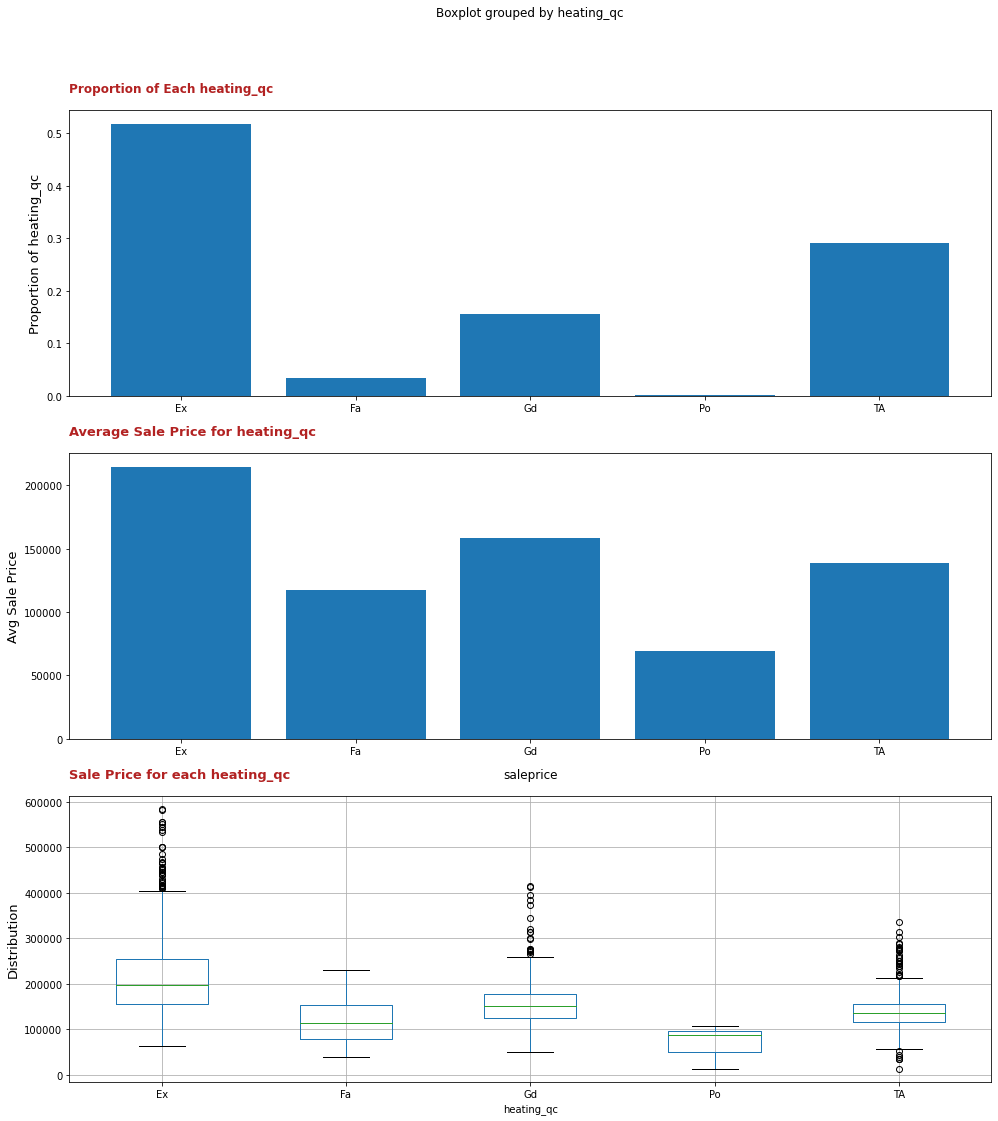

In [183]:
plot_nominal_feature('heating_qc')

In [184]:
df.groupby('heating_qc')['saleprice'].describe()

count           mean           std      min       25%       50%  \
heating_qc                                                                     
Ex          1046.0  214909.081262  83598.877546  64000.0  155000.0  196750.0   
Fa            67.0  117123.641791  46612.677999  37900.0   79500.0  113500.0   
Gd           314.0  158729.328025  56847.153836  50138.0  123900.0  152000.0   
Po             3.0   69033.333333  49461.129519  13100.0   50050.0   87000.0   
TA           586.0  138638.844710  42087.850912  12789.0  115000.0  134900.0   

                 75%       max  
heating_qc                      
Ex          255000.0  584500.0  
Fa          154102.0  230000.0  
Gd          177800.0  415000.0  
Po           97000.0  107000.0  
TA          155000.0  335000.0

**Heating Quality**

**Kitchen Quality** <font color=green>INDCLUDED Dummies in model</font>

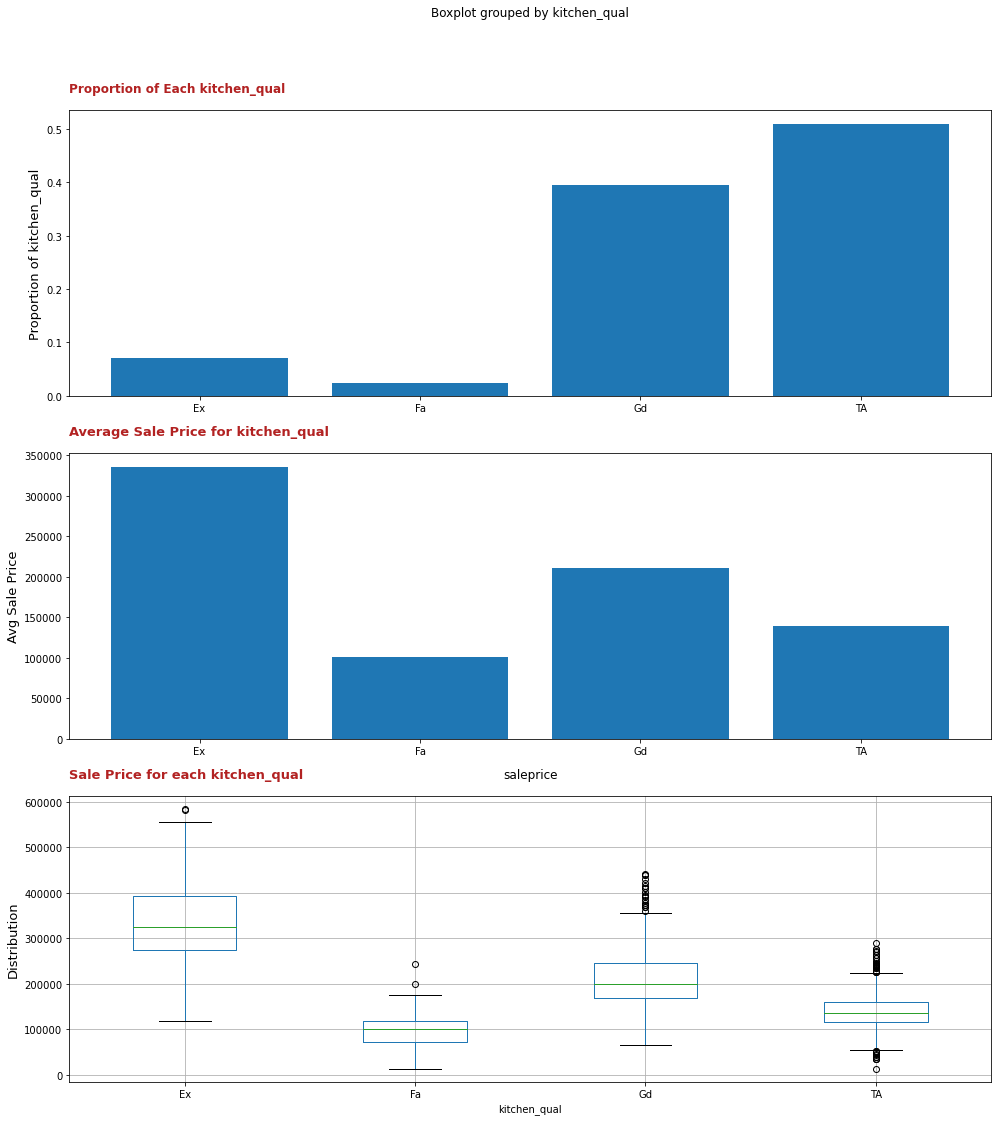

In [185]:
plot_nominal_feature('kitchen_qual')

In [186]:
df.groupby('kitchen_qual')['saleprice'].describe()

count           mean           std       min       25%  \
kitchen_qual                                                            
Ex             144.0  336280.465278  98448.955419  119000.0  274675.0   
Fa              47.0  101334.957447  41957.590989   13100.0   72500.0   
Gd             796.0  210658.721106  61789.015886   64500.0  169657.5   
TA            1029.0  139029.332362  37360.584460   12789.0  117000.0   

                   50%        75%       max  
kitchen_qual                                 
Ex            325312.0  392654.25  584500.0  
Fa            100000.0  118875.00  242500.0  
Gd            200000.0  245087.50  441929.0  
TA            136300.0  160000.00  289000.0

**Kitchen Quality**
- dropping one extreme outlier in 'Gd' group
- the groups in this feature have significantly different average Sale Prices
- we'll make dummies for this feature and drop the 'typical' group before including it in our model
- 'kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd' included in model

- creating dummies for ```kitchen_qual``` and joining to df

In [187]:
df = df.join(pd.get_dummies(df.kitchen_qual, prefix='kitchen_qual'))

Appending 'kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd' to features list

In [188]:
features.append('kitchen_qual_Ex')
features.append('kitchen_qual_Fa')
features.append('kitchen_qual_Gd')

**Garage Finish**

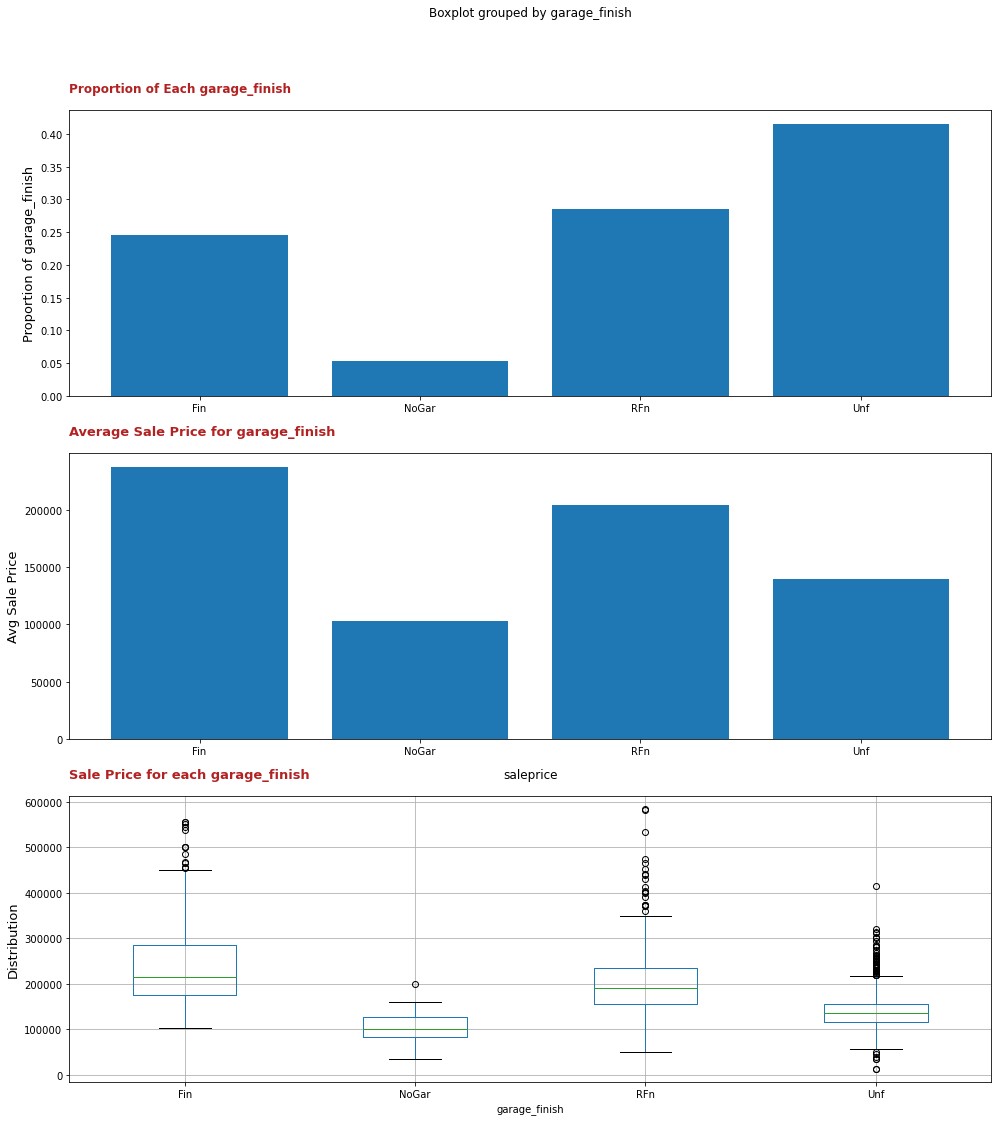

In [189]:
plot_nominal_feature('garage_finish')

In [190]:
df.groupby('garage_finish')['saleprice'].describe()

count           mean           std       min       25%  \
garage_finish                                                           
Fin            496.0  238087.588710  87805.173461  102900.0  174422.5   
NoGar          108.0  103028.833333  31441.901927   34900.0   82000.0   
RFn            574.0  204651.722997  69877.781553   50138.0  156125.0   
Unf            838.0  139909.317422  42209.572514   12789.0  115100.0   

                    50%       75%       max  
garage_finish                                
Fin            215000.0  286000.0  556581.0  
NoGar          101000.0  127125.0  200000.0  
RFn            190000.0  235000.0  584500.0  
Unf            135000.0  156500.0  415000.0

**Garage Finish**

Observation
- asd

**Electrical**

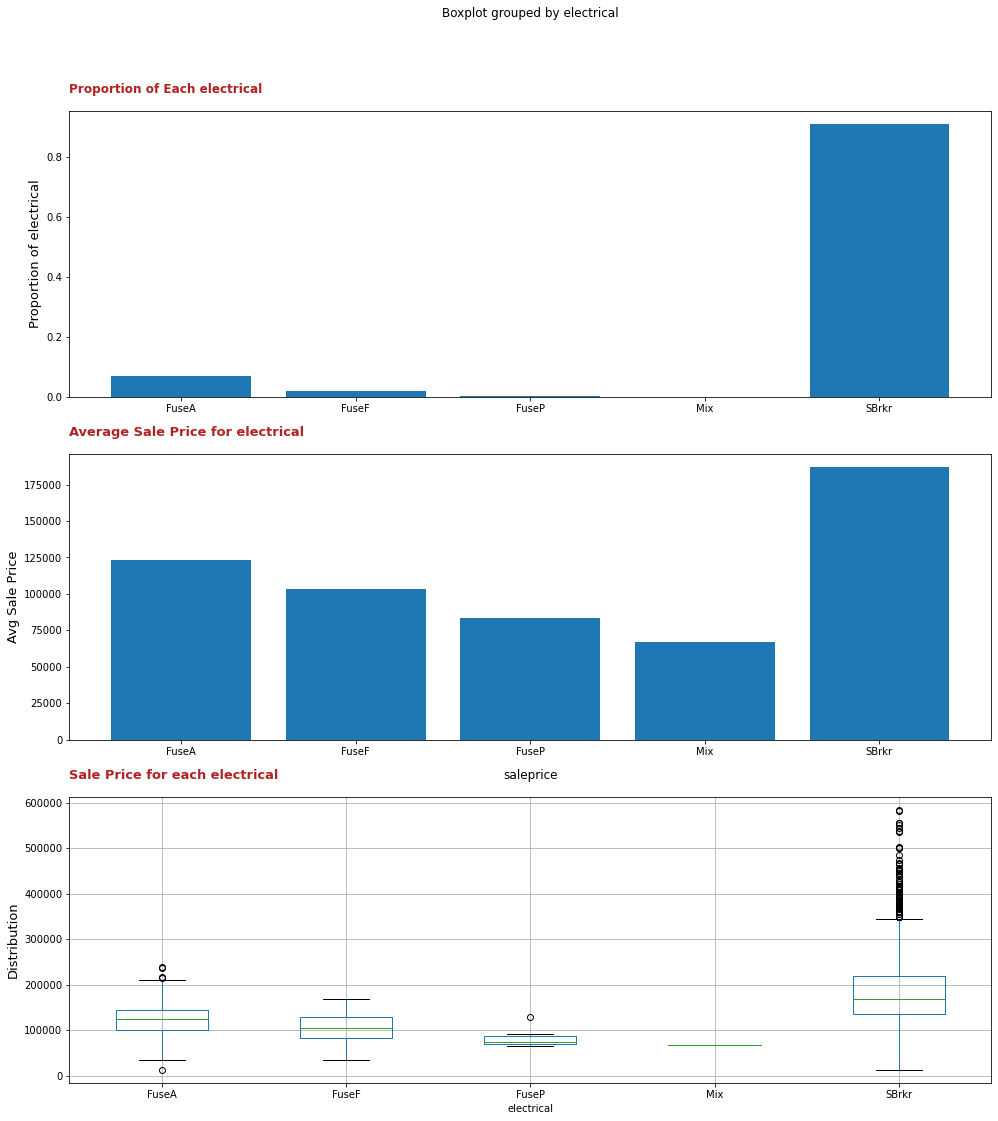

In [191]:
plot_nominal_feature('electrical')

In [192]:
df.groupby('electrical')['saleprice'].describe()

count           mean           std      min       25%       50%  \
electrical                                                                     
FuseA        138.0  123000.884058  38707.363577  13100.0  100000.0  123750.0   
FuseF         35.0  103678.914286  30466.232529  35000.0   82437.5  105000.0   
FuseP          7.0   83485.714286  22430.665659  64500.0   70500.0   75000.0   
Mix            1.0   67000.000000           NaN  67000.0   67000.0   67000.0   
SBrkr       1835.0  186745.706267  78030.783453  12789.0  134650.0  169000.0   

                 75%       max  
electrical                      
FuseA       144750.0  239000.0  
FuseF       129000.0  169500.0  
FuseP        86950.0  130000.0  
Mix          67000.0   67000.0  
SBrkr       219500.0  584500.0

**Electrical**

Observation
- there is a significant different in average sale price between Standard Circuit Breans & Romex and all the other groups. 
- I'm going to consolidate down to 3 groups in a new column, then make dummies for that column 
- 'electrical_A_F' and 'electrical_P_Mix' will be included in th model 

**Electrical 2** <font color=green>INCLUDED dummies in model</font>

new column

In [193]:
df['electrical2'] = ['A_F' if fuse == 'FuseA' or fuse == 'FuseB' 
                     else 'P_Mix' if fuse == 'FuseP' or fuse == 'Mix' 
                     else 'SBrkr'
                     for fuse in df.electrical]

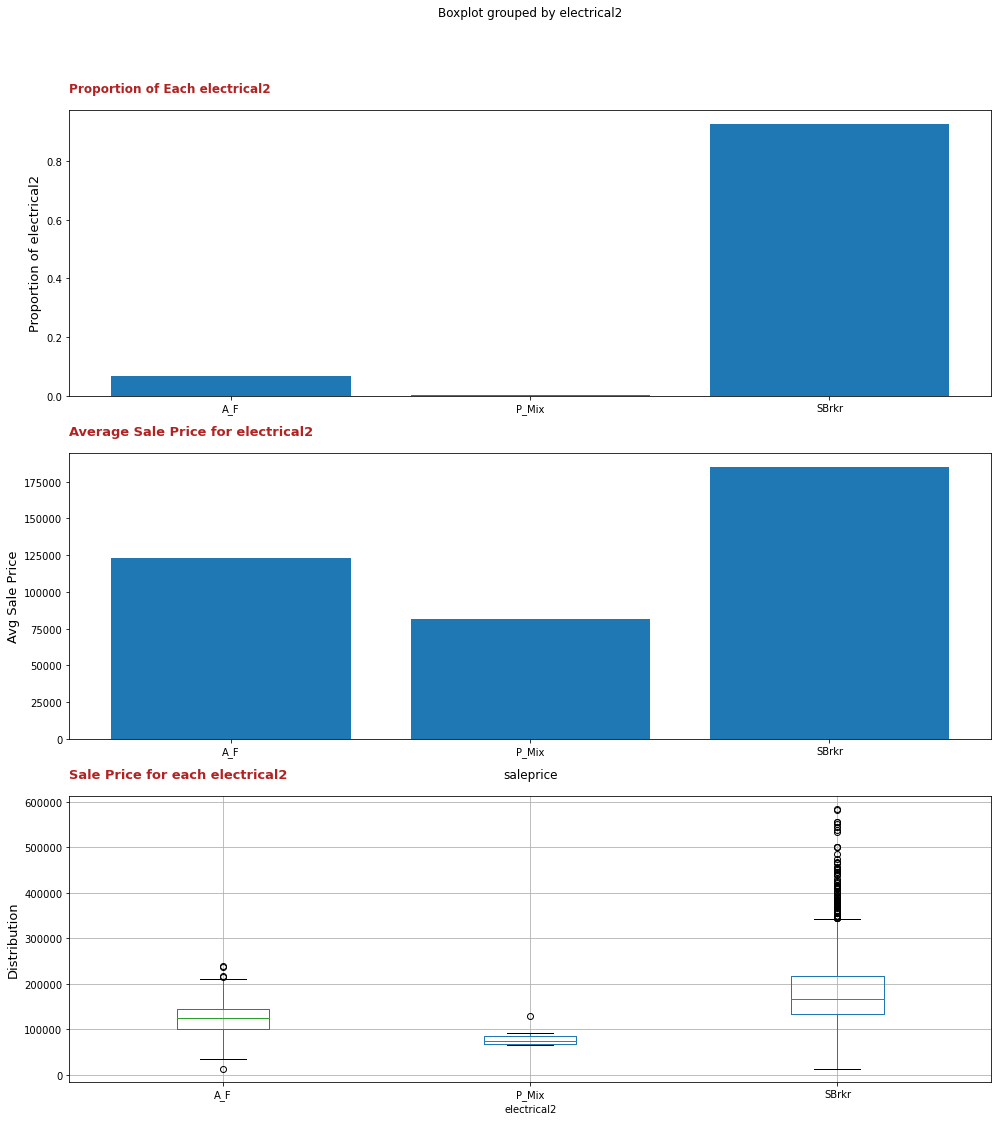

In [194]:
plot_nominal_feature('electrical2')

In [195]:
df.groupby('electrical2')['saleprice'].describe()

count           mean           std      min       25%       50%  \
electrical2                                                                     
A_F           138.0  123000.884058  38707.363577  13100.0  100000.0  123750.0   
P_Mix           8.0   81425.000000  21569.207549  64500.0   67750.0   74000.0   
SBrkr        1870.0  185190.980214  78220.602202  12789.0  132500.0  167120.0   

                  75%       max  
electrical2                      
A_F          144750.0  239000.0  
P_Mix         84475.0  130000.0  
SBrkr        217000.0  584500.0

- creating dummies for ```electrical2``` and joining to df

In [196]:
df = df.join(pd.get_dummies(df.electrical2, prefix='electrical'))

Appending 'electrical_A_F' and 'electrical_P_Mix' to features list

In [197]:
features.append('electrical_A_F')
features.append('electrical_P_Mix')

**Electrical 2**

Observations
- as described above, I've consolidated the original groups down to 3, then made dummies for them. 
- there is a large difference in average Sale Price for houses that do no have Standard Circuit Breakers & Romex

**Paved Drive** <font color=green> INCLUDED! dummies in model </font>

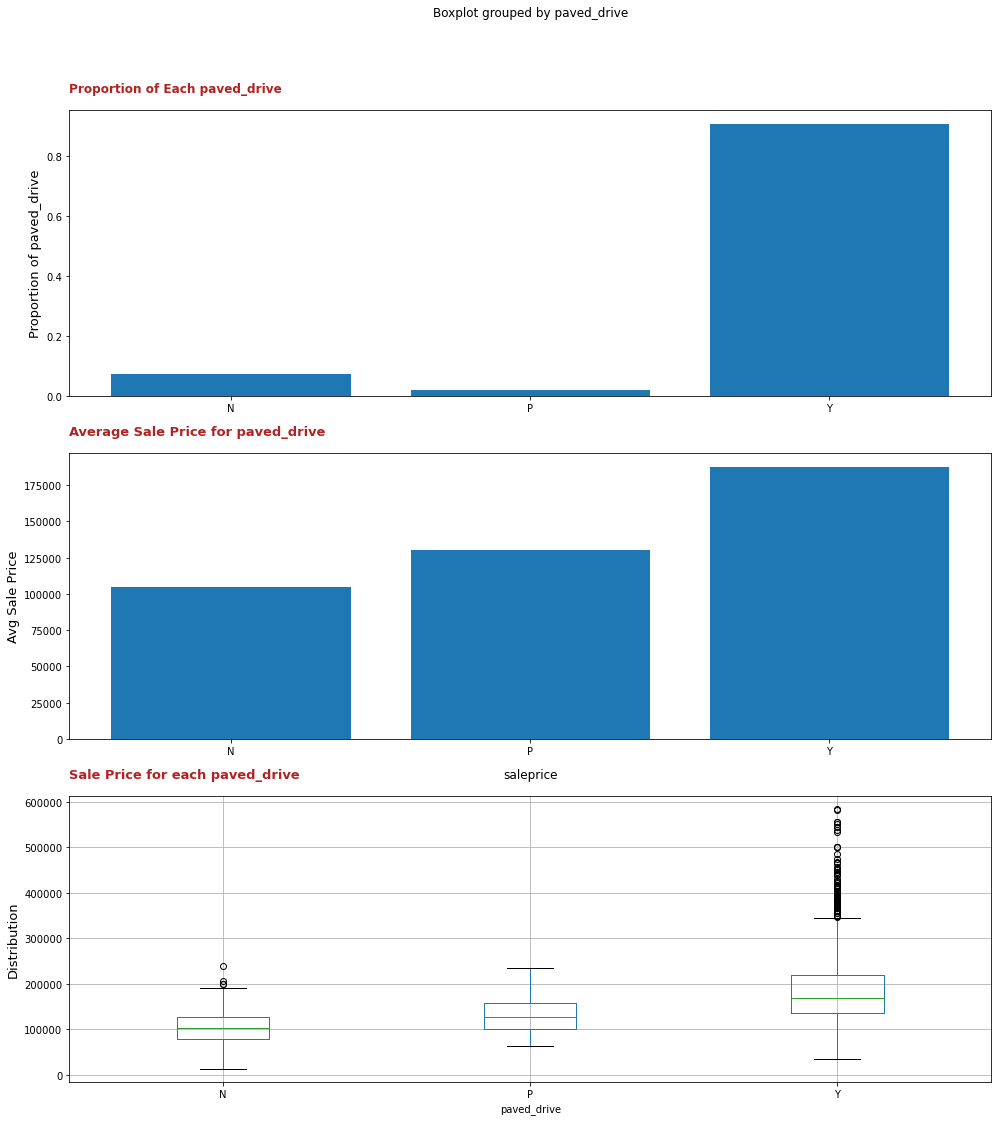

In [198]:
plot_nominal_feature('paved_drive')

In [199]:
df.paved_drive.value_counts(normalize=True)

Y    0.907242
N    0.073909
P    0.018849
Name: paved_drive, dtype: float64

**Paved Drive**

Observation
- 90% of the houses have paved drives and there are many outliers and right skew
- 10% of 

In [200]:
df = df.join(pd.get_dummies(df.paved_drive, prefix='paved_drive'))

Appending 'paved_drive_P' and 'paved_drive_N' to features list

In [201]:
features.append('paved_drive_P')
features.append('paved_drive_N')

**Land Slope**

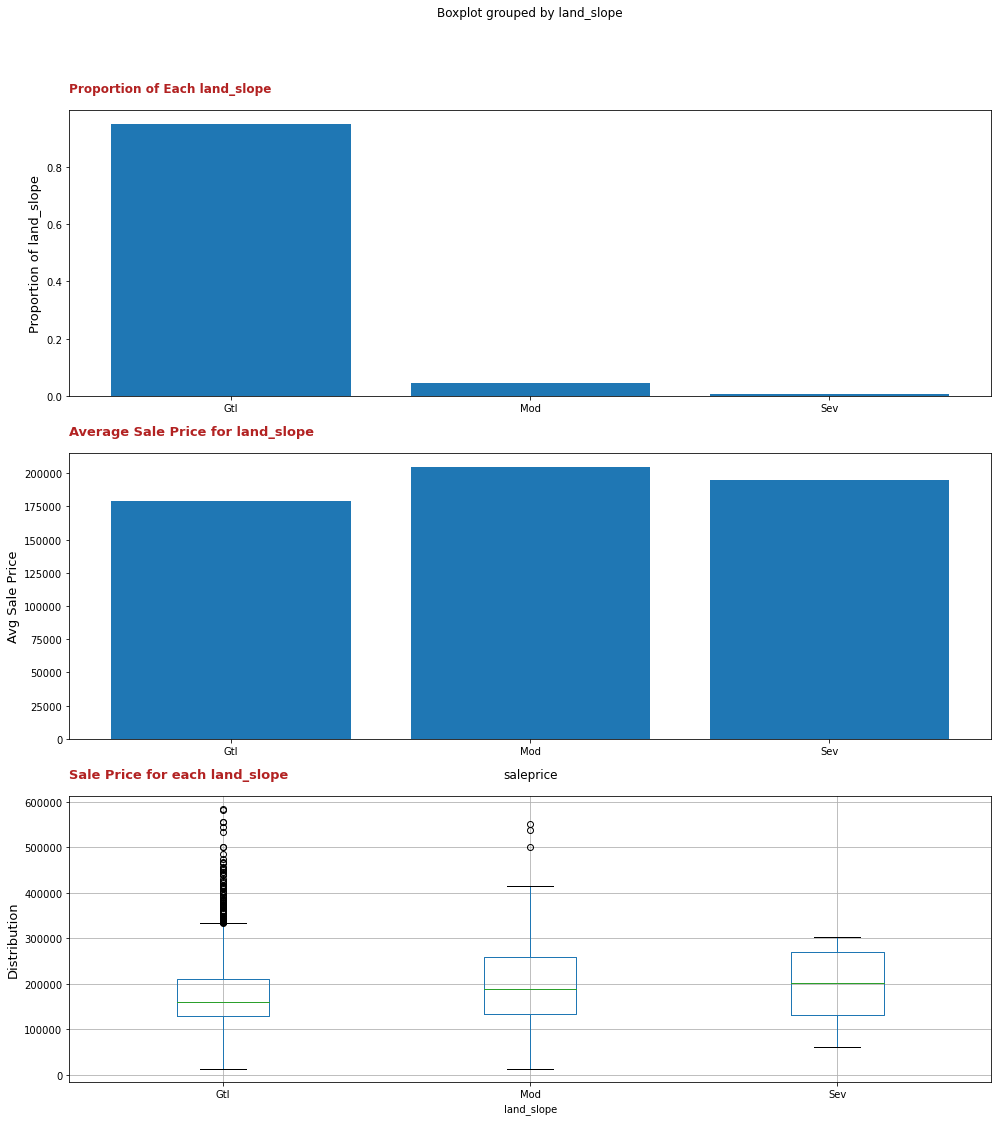

In [202]:
plot_nominal_feature('land_slope')

In [203]:
df.land_slope.value_counts(normalize=True)

Gtl    0.951885
Mod    0.043155
Sev    0.004960
Name: land_slope, dtype: float64

**Land Slope**

Observation
- the average house price for all 3 categories are very similar. 
- 95% of the data is recorded as having a gentle slope
- we will not include this feature in our model

**Lot Shape**

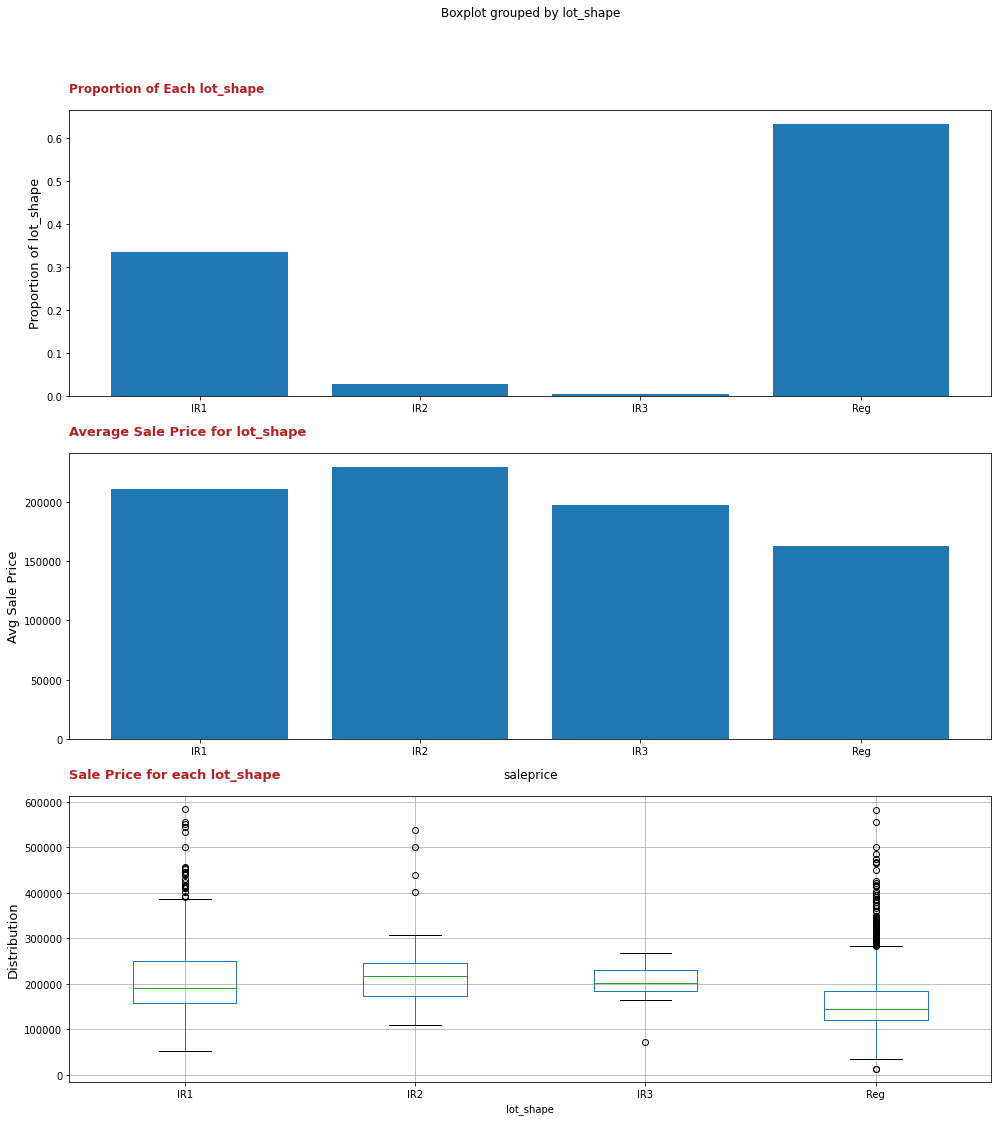

In [204]:
plot_nominal_feature('lot_shape')

In [205]:
df.lot_shape.value_counts(normalize=True)

Reg    0.633929
IR1    0.335317
IR2    0.026786
IR3    0.003968
Name: lot_shape, dtype: float64

**Lot Shape**

Observation
- 'reg' makes up 63% and is highly skewed right. 
- 'IR1' makes up 33% of the data and is also skewed right. 
- the last 2 categories make up 4% of the data. 
- average Sale Price for each group is does not vary enough for this feature to be statistically significant. 
- we will not inlude this feature in our model. 

**Utilities**

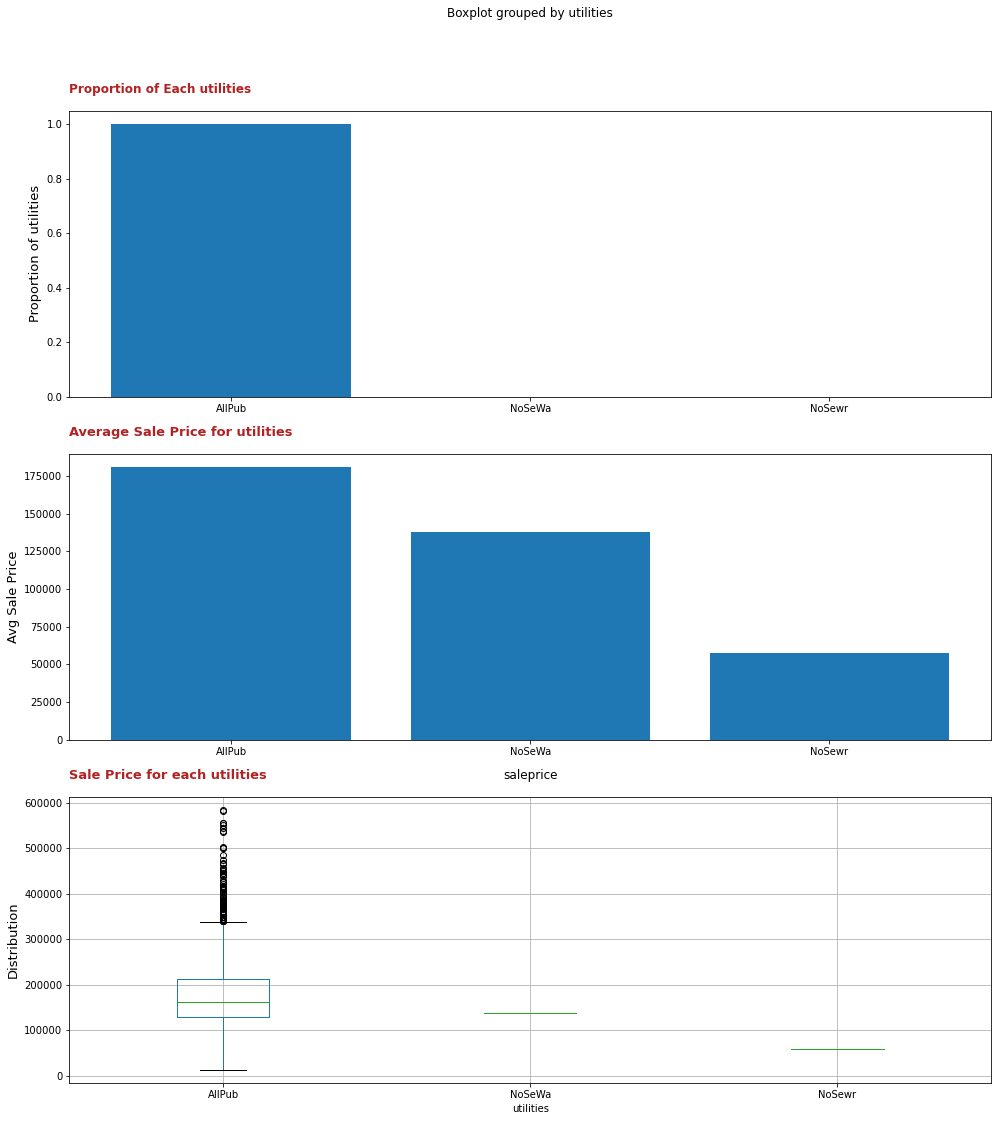

In [206]:
plot_nominal_feature('utilities')

In [207]:
df.utilities.value_counts(normalize=True)

AllPub    0.999008
NoSeWa    0.000496
NoSewr    0.000496
Name: utilities, dtype: float64

**Utilities**

Observations
- 99% of the data is listed as having all Public Utilities and is not useful for our model.
- We will not include this feature in our model. 

**Functional** <font color=green> INCLUDED! in model </font>

In [208]:
df.functional.value_counts(normalize=True)

Typ     0.934524
Min2    0.020337
Min1    0.020337
Mod     0.013889
Maj1    0.005456
Maj2    0.003472
Sev     0.000992
Sal     0.000992
Name: functional, dtype: float64

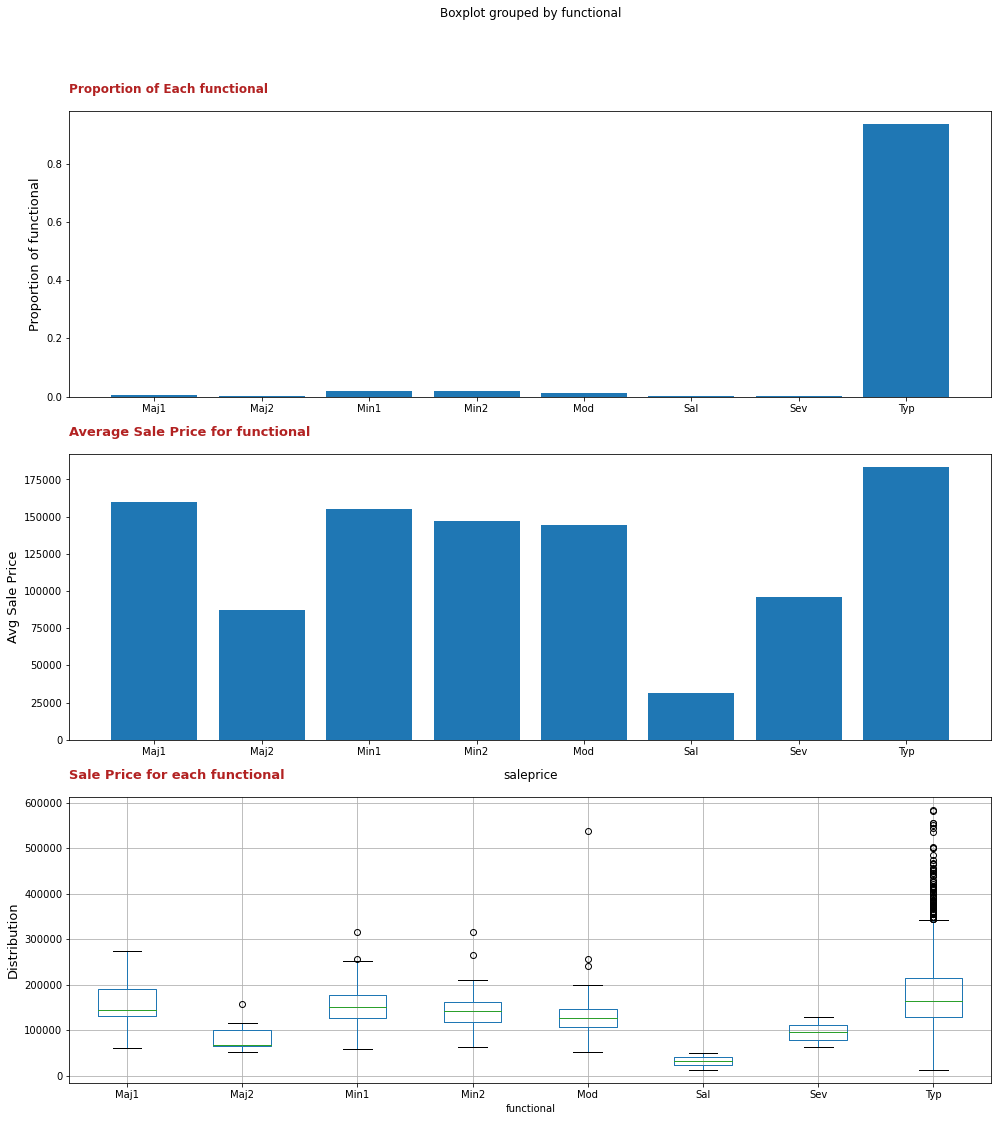

In [209]:
plot_nominal_feature('functional')

**Functional**

Observation
- 93% of the dataset is listed as 'Typical Funcionality'
- the mean Sale Price is significantly different for the functionality catefories
- I'm going to group them into 3 groups, make dummies for them, and drop the 'typ' category that makes up 93% of the data set
- I will include ```func_poor``` and ```func_mod``` in the model

In [210]:
df.functional.value_counts()

Typ     1884
Min2      41
Min1      41
Mod       28
Maj1      11
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

- Reducing category groups to 3: func_poor, func_mod, func_typ

In [211]:
df['functional2'] = ['func_poor' if 'Sal' in func else
                     'func_poor' if 'Sev' in func else
                     'func_poor' if 'Maj2' in func else  
                     'func_mod' if 'Ma1' in func else
                     'func_mod' if 'Mod' in func else
                     'func_mod' if 'Min2' in func else
                     'func_mod' if 'Min1' in func else 
                     'func_typ' for func in df.functional]

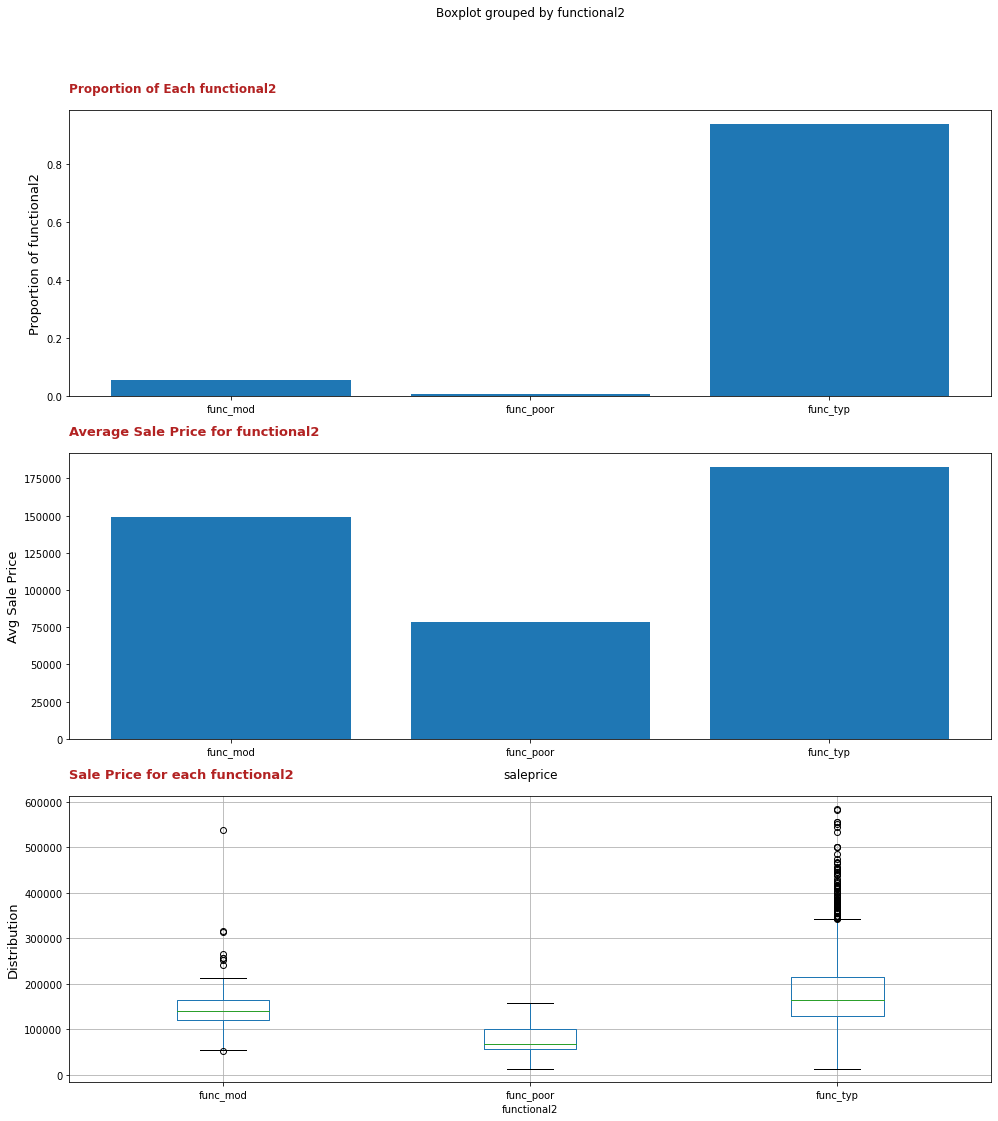

In [212]:
plot_nominal_feature('functional2')

- Creating dummies for the new categories and joining them to the dataframe. 

In [213]:
df = df.join(pd.get_dummies(df['functional2']))

Appending 'func_poor' and 'func_mod' to features list

In [214]:
f = ['a']

In [215]:
features.append('func_poor')
features.append('func_mod')

In [216]:
# comp_test_base('func_poor', 'func_mod')

**Overall Qual & Overall Cond**

- I suspect these will be related 

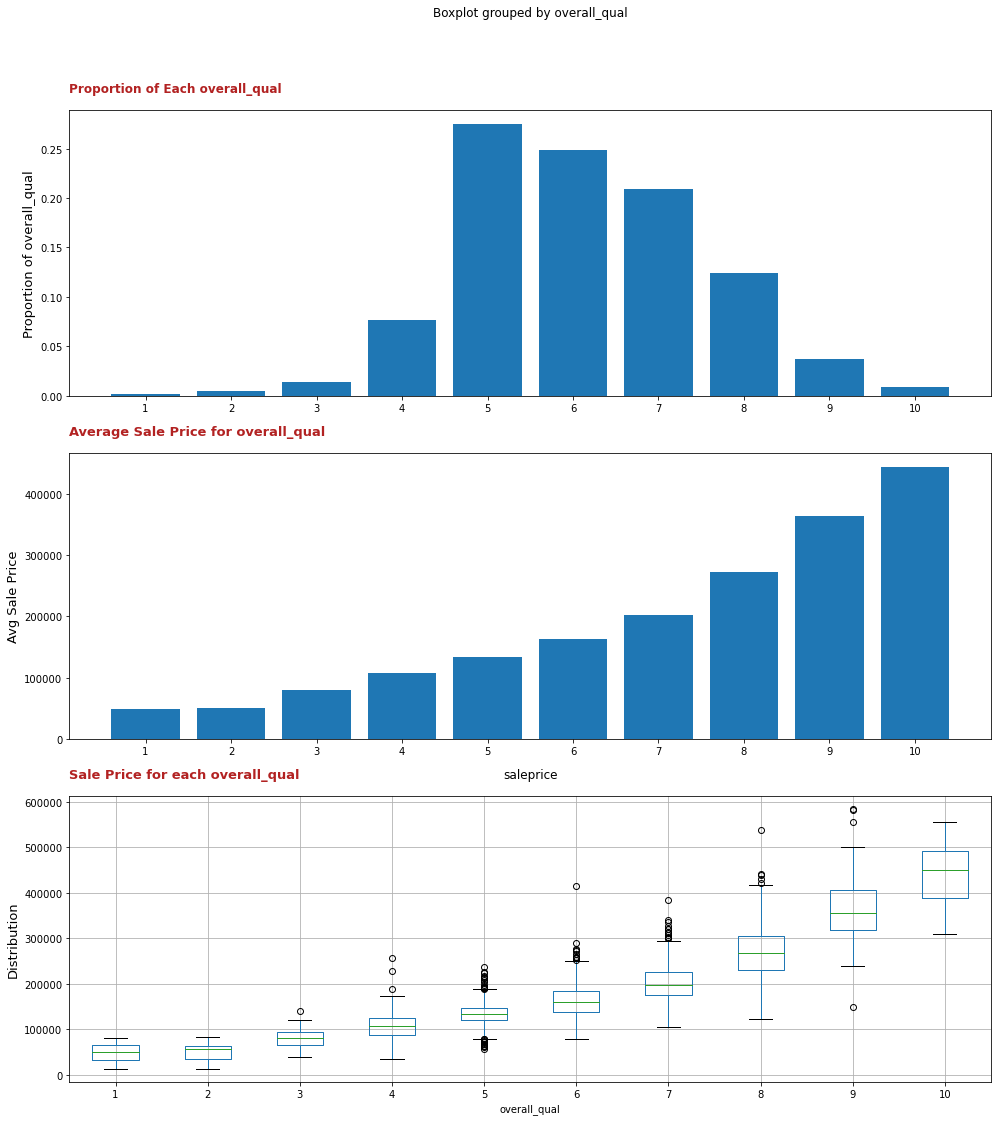

In [217]:
plot_nominal_feature('overall_qual')

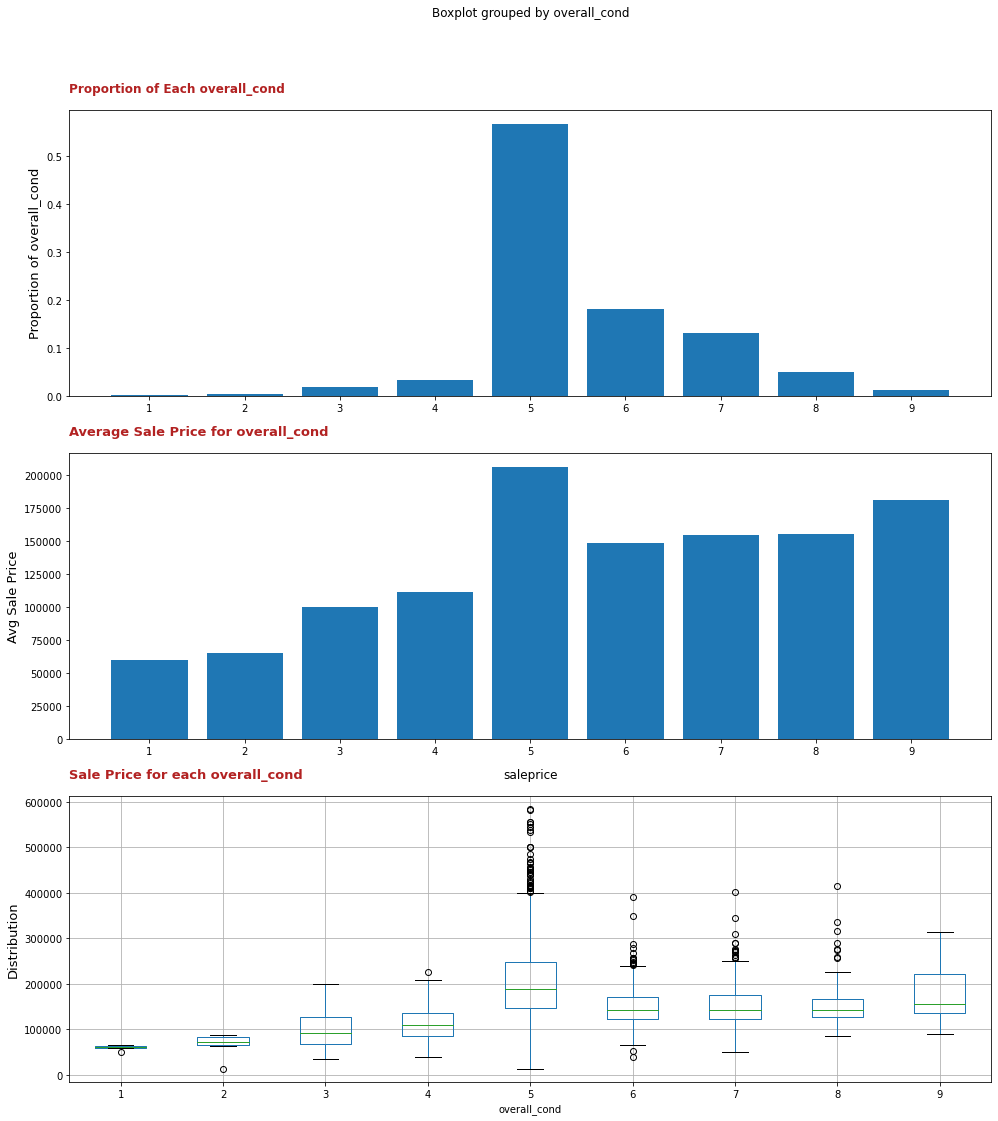

In [218]:
plot_nominal_feature('overall_cond')

In [219]:
df.groupby('overall_qual')['saleprice'].describe()

count           mean           std       min       25%  \
overall_qual                                                           
1               4.0   48725.000000  29341.935292   13100.0   32750.0   
2               9.0   51081.000000  21044.635997   12789.0   35311.0   
3              28.0   79570.142857  22399.015839   37900.0   64500.0   
4             155.0  107201.948387  30553.406321   34900.0   86950.0   
5             555.0  134338.600000  25575.654254   55993.0  120000.0   
6             501.0  162851.093812  38577.763825   79000.0  137900.0   
7             421.0  202208.914489  42073.124956  105000.0  175500.0   
8             250.0  271437.044000  62023.449524  122000.0  230000.0   
9              75.0  364026.053333  76400.662610  150000.0  318200.0   
10             18.0  444237.277778  75065.777685  310000.0  387687.5   

                   50%        75%       max  
overall_qual                                 
1              50150.0   66125.00   81500.0  
2              57625.0   63900.00   82000.0  
3              79950.0   93050.00  139600.0  
4             106250.0  125250.00  256000.0  
5             133000.0  147250.00  236500.0  
6             160000.0  183200.00  415000.0  
7             196500.0  225000.00  383970.0  
8             267150.0  305369.25  538000.0  
9             356383.0  407000.00  584500.0  
10            450975.0  491675.25  555000.0

In [220]:
df.groupby('overall_cond')['saleprice'].describe()

count           mean           std      min       25%  \
overall_cond                                                           
1                4.0   59625.000000   6625.393070  50000.0   58250.0   
2                6.0   65364.833333  27373.892309  12789.0   64675.0   
3               35.0   99786.000000  42905.475402  35000.0   67500.0   
4               68.0  111094.411765  37170.311059  40000.0   84500.0   
5             1146.0  206517.714660  84960.029184  13100.0  146000.0   
6              366.0  148806.480874  42102.641624  37900.0  123000.0   
7              266.0  154376.552632  50001.990040  50138.0  123600.0   
8              100.0  155227.500000  53590.811899  84500.0  127375.0   
9               25.0  181426.000000  70623.814326  88750.0  134900.0   

                   50%       75%       max  
overall_cond                                
1              61750.0   63125.0   65000.0  
2              71750.0   82875.0   87000.0  
3              91500.0  126000.0  200624.0  
4             108729.5  135375.0  225000.0  
5             187593.5  247750.0  584500.0  
6             142250.0  170000.0  392000.0  
7             142300.0  174800.0  402000.0  
8             143000.0  167125.0  415000.0  
9             156500.0  222000.0  315000.0

In [221]:
df[df.overall_qual != df.overall_cond]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0              60        RL          70.0     13517   Pave       IR1   
1              60        RL          43.0     11492   Pave       IR1   
2              20        RL          68.0      7922   Pave       Reg   
4              50        RL          82.0     14235   Pave       IR1   
6             180        RM          35.0      3675   Pave       Reg   
...           ...       ...           ...       ...    ...       ...   
2010           20        RL          96.0     12444   Pave       Reg   
2011           20        RL          79.0     11449   Pave       IR1   
2012           30        RL          63.0     12342   Pave       IR1   
2014           20        RL          80.0     10400   Pave       Reg   
2015           60        RL          60.0      7500   Pave       Reg   

     land_contour utilities lot_config land_slope  ... electrical_A_F  \
0             Lvl    AllPub    CulDSac        Gtl  ...              0   
1             Lvl    AllPub    CulDSac        Gtl  ...              0   
2             Lvl    AllPub     Inside        Gtl  ...              0   
4             Lvl    AllPub     Inside        Gtl  ...              0   
6             Lvl    AllPub     Inside        Gtl  ...              0   
...           ...       ...        ...        ...  ...            ...   
2010          Lvl    AllPub        FR2        Gtl  ...              0   
2011          HLS    AllPub     Inside        Gtl  ...              0   
2012          Lvl    AllPub     Inside        Gtl  ...              0   
2014          Lvl    AllPub     Corner        Gtl  ...              0   
2015          Lvl    AllPub     Inside        Gtl  ...              0   

     electrical_P_Mix electrical_SBrkr paved_drive_N paved_drive_P  \
0                   0                1             0             0   
1                   0                1             0             0   
2                   0                1             0             0   
4                   0                1             1             0   
6                   0                1             0             0   
...               ...              ...           ...           ...   
2010                0                1             0             0   
2011                0                1             0             0   
2012                0                1             0             0   
2014                0                1             0             0   
2015                0                1             0             0   

      paved_drive_Y  functional2  func_mod  func_poor func_typ  
0                 1     func_typ         0          0        1  
1                 1     func_typ         0          0        1  
2                 1     func_typ         0          0        1  
4                 0     func_typ         0          0        1  
6                 1     func_typ         0          0        1  
...             ...          ...       ...        ...      ...  
2010              1     func_typ         0          0        1  
2011              1     func_typ         0          0        1  
2012              1     func_typ         0          0        1  
2014              1     func_typ         0          0        1  
2015              1     func_typ         0          0        1  

[1617 rows x 117 columns]

In [222]:
for a, b in zip(df.groupby('overall_cond')['saleprice'].median(), 
                df.groupby('overall_qual')['saleprice'].median()):
    print(a - b)

11600.0
14125.0
11550.0
2479.5
54593.5
-17750.0
-54200.0
-124150.0
-199883.0


#### Discrete Features

There are 14 discrete variables

In [223]:
discrete_features = ['year_built', 'year_remod_add', 'bsmt_full_bath', 'bsmt_half_bath', 
                     'full_bath', 'half_bath', 'bedroom', 'kitchen_abvgr', 'totrmsabvgrd', 
                     'fireplaces', 'garage_yr_built', 'garage_cars', 'mo_sold', 'yr_sold'] 

discrete_features = ['year_built', 'year_remod_add', 'bsmt_full_bath', 'bsmt_half_bath', 
                     'full_bath', 'half_bath', 'bedroom', 'kitchen_abvgr', 'totrmsabvgrd', 
                     'garage_yr_built', 'garage_cars', 'mo_sold', 'yr_sold'] 


selected_features = []                     

**Year Sold**

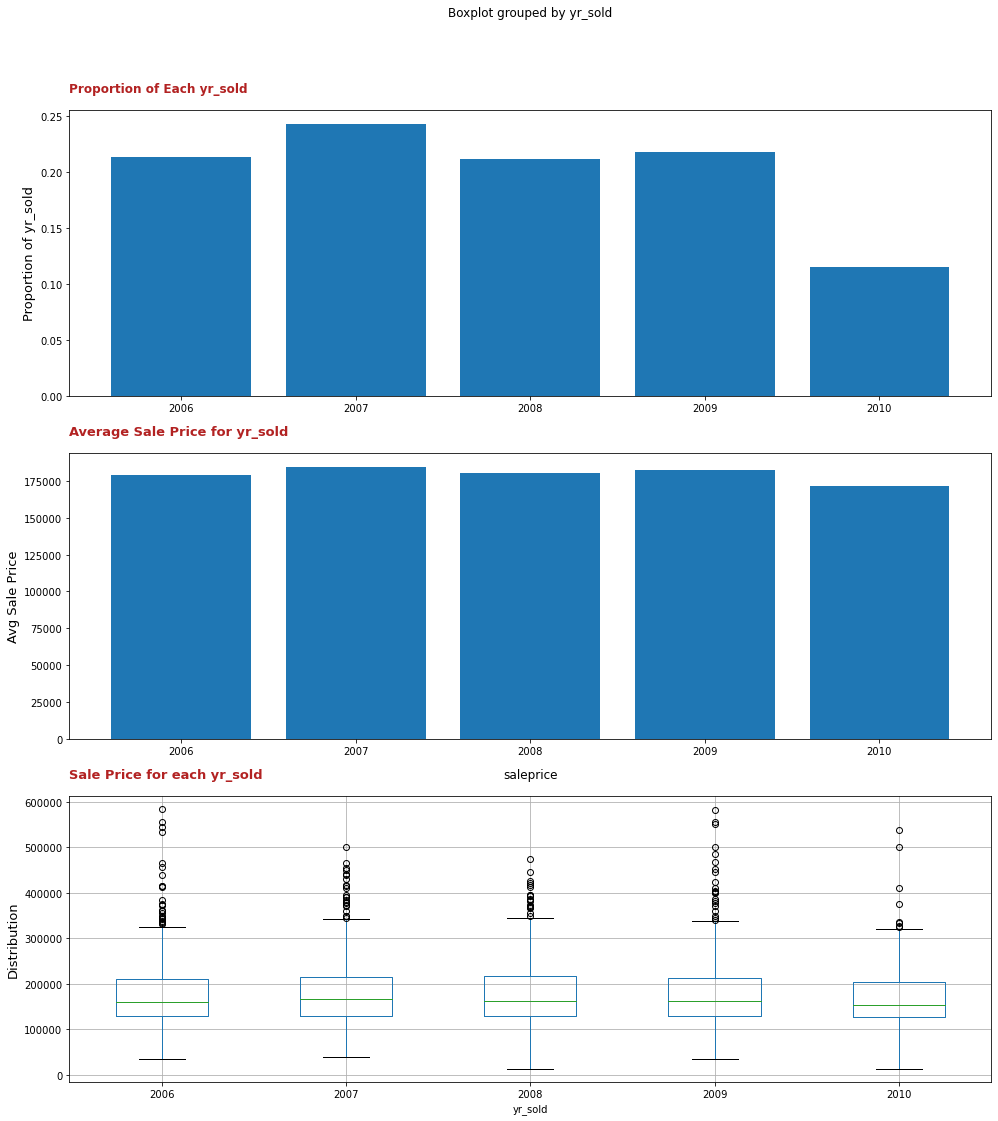

In [224]:
plot_nominal_feature('yr_sold')

**Year Sold**

Observations
- the average price year to year is very similar.
- we will not include this feature in our model.

**Month Sold**

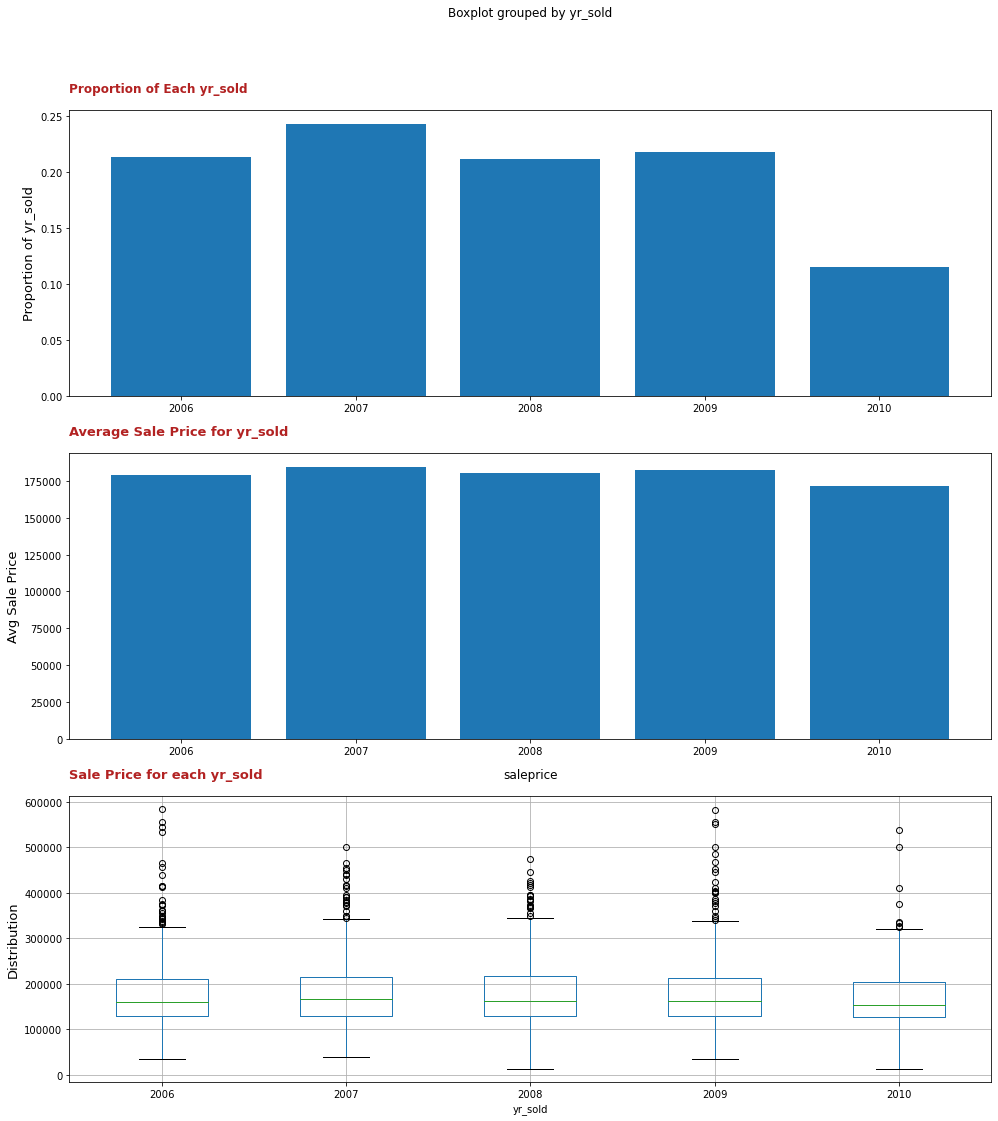

In [225]:
plot_nominal_feature('yr_sold')

**Month Sold**

Observation
- The average price for each year is very close. 
- We will not include this feature in our model.

**Year Month Sold**

In [226]:
df['yr_mo_sold'] = [str(num) + '_' + str(num2) for num, num2 in zip(df.yr_sold, df.mo_sold)]

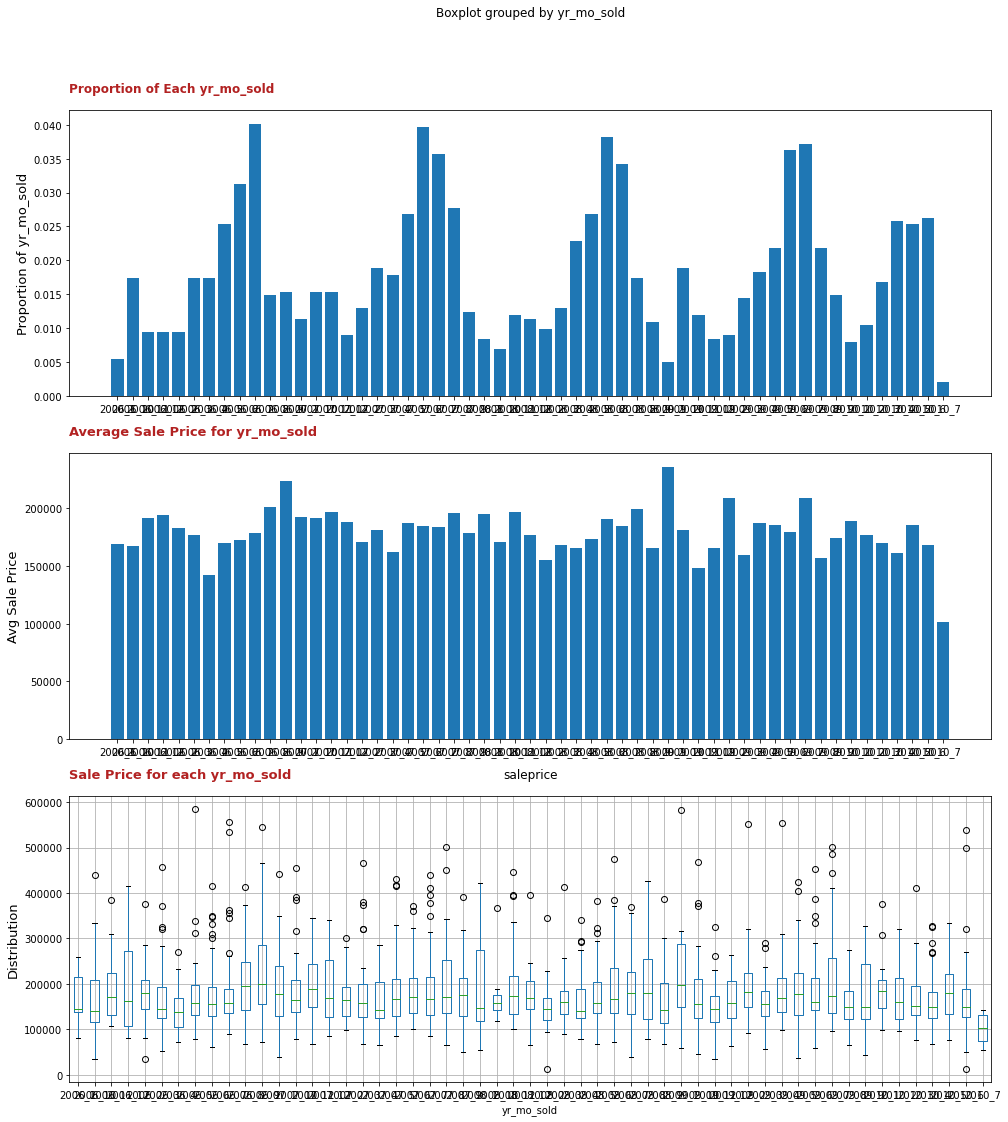

In [227]:
plot_nominal_feature('yr_mo_sold')

**Year Month Sold**

Observation
- the average price does fluctuate every year month to month, but no by very much, and not in a linear fashion. 
- I will not include this feature in my model

**Garage Year Built**

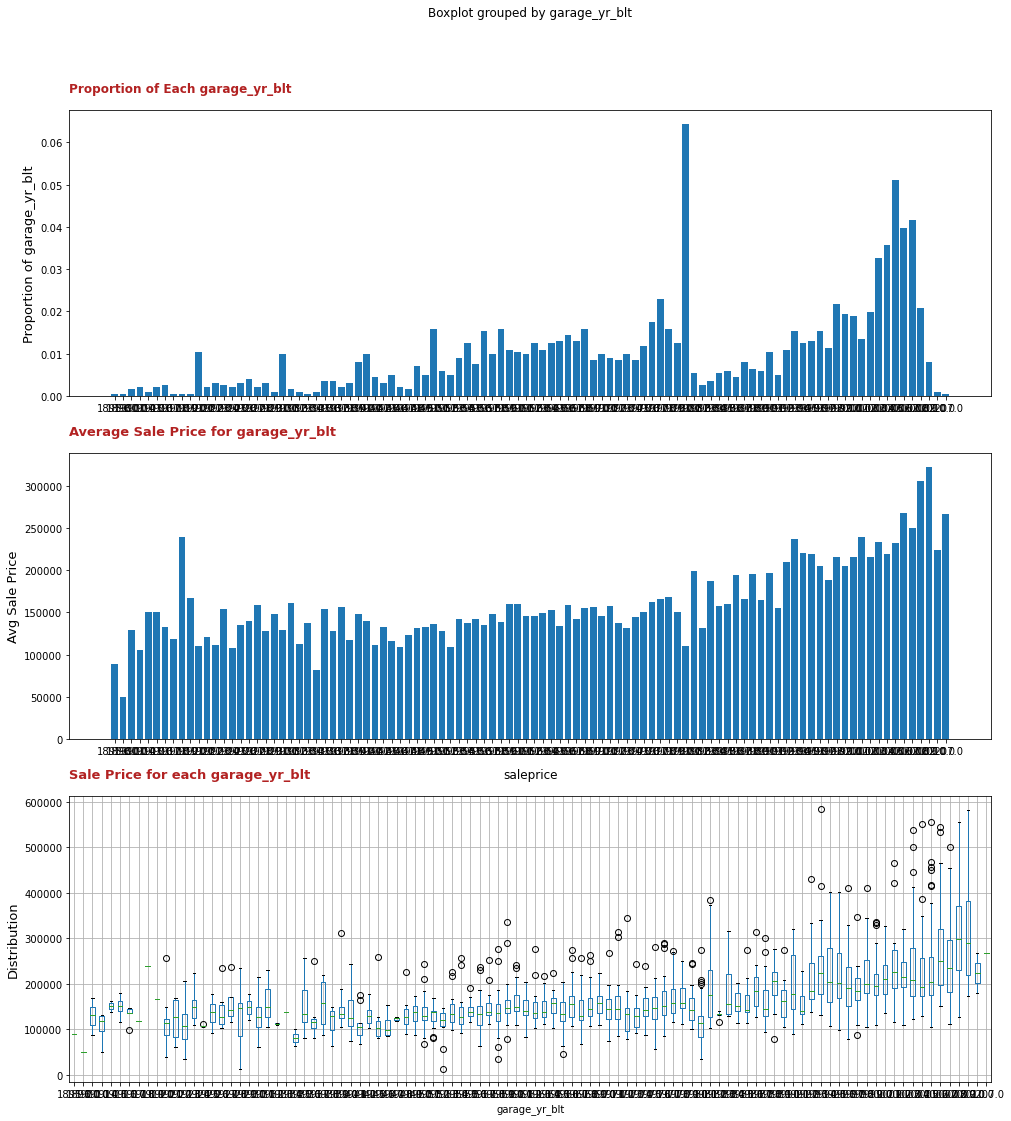

In [228]:
plot_nominal_feature('garage_yr_blt')

In [229]:
df[df.year_built != df.garage_yr_blt][['year_built', 'garage_yr_blt']].head()

year_built  garage_yr_blt
1         1996         1997.0
3         2006         2007.0
4         1900         1957.0
12        1880         1900.0
13        1999         2000.0

**Garage Year Built**

Observation
- a quarter of the dataset had garages built after the house was originally built. 
- I included year built in my regression model, and average sales price per year built was  less logarithmic and more predictable than this feature is
- I will not include this feature in my model

**Full Bathroom**

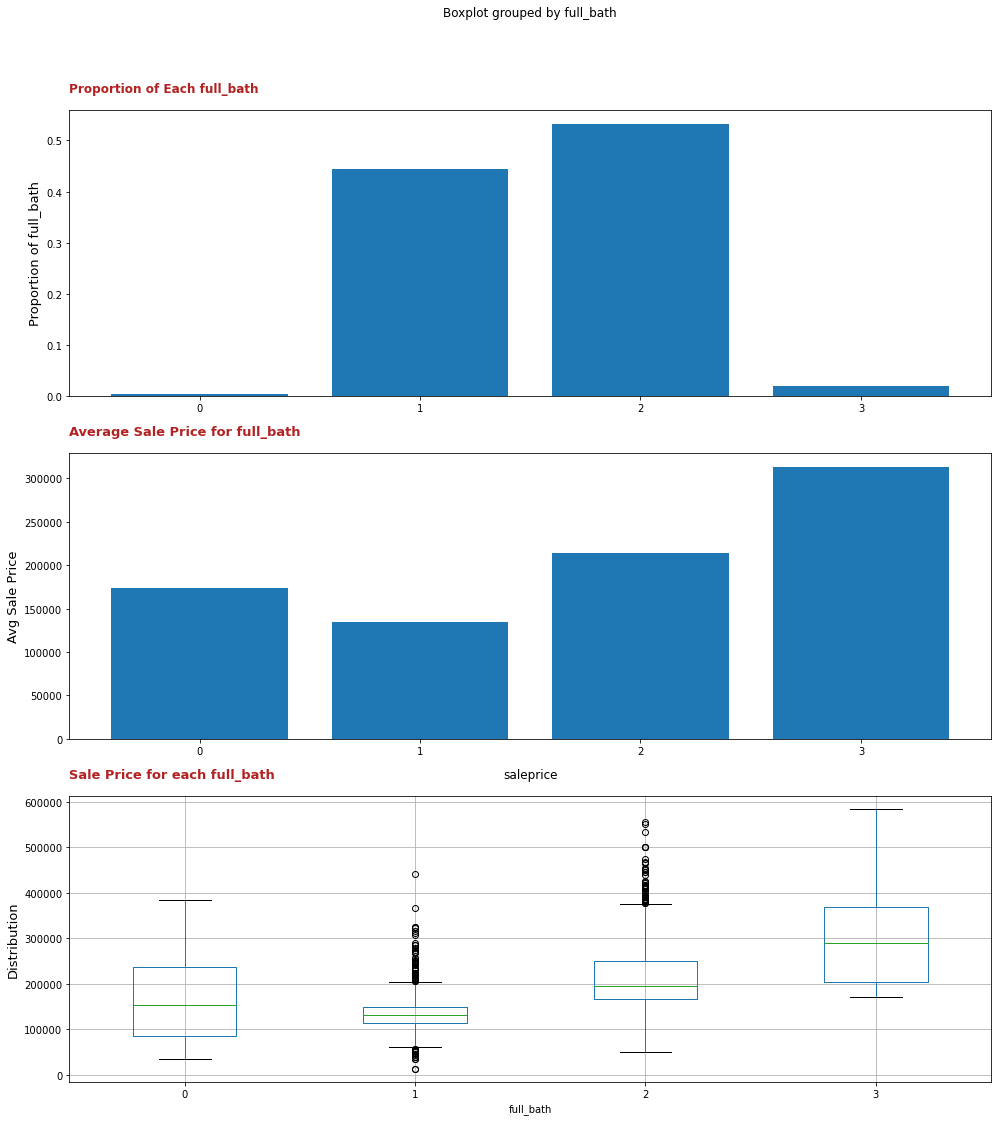

In [230]:
plot_nominal_feature('full_bath')

In [231]:
df[df['full_bath'] == 0]['half_bath']

191     1
395     2
735     2
1260    2
1349    1
1494    0
1544    1
Name: half_bath, dtype: int64

In [232]:
df.groupby('full_bath')['saleprice'].describe()

count           mean            std       min       25%       50%  \
full_bath                                                                       
0             7.0  173829.714286  124240.899996   35311.0   84979.5  153337.0   
1           894.0  134706.224832   41467.357846   12789.0  113000.0  131950.0   
2          1075.0  213720.251163   75959.518898   50000.0  165750.0  195800.0   
3            40.0  313480.300000  126700.828268  170000.0  203625.0  290000.0   

                75%       max  
full_bath                      
0          236600.5  385000.0  
1          149900.0  441929.0  
2          250000.0  555000.0  
3          370000.0  584500.0

**Full Bathroom**

Observation
- there are 8 houses with 0 bathrooms and their average Sale Price is higher than houses with 1 full bathroom. I'm going to make a new ```full_baths_2``` column that will group '0-1' Full Bathrooms. Their impact on the average Sale Price will be insifnificant. 
- There is a significatn price difference between houses with 1, 2, and 3 bathrooms. 
- We will make dummies for these columns and add full_bath 2 and 3 into our model to compare them to houses with 1 or less bathroom. 
- I tried combining full_bath and half_bath into a total_bath column, but there ended up being too many groups and nonlinear relationships with the target. 

- Creating a ```full_bath_2``` column to group 0-1 baths and then make dummies for them. 

In [233]:
df['full_baths_2'] = ['0-1' if num <= 1 else str(num) for num in df.full_bath]

**Full Bath 2** <font color=green>INCLUDED Dummies in model</font>
- analyzing newly created ```full_baths_2``` column

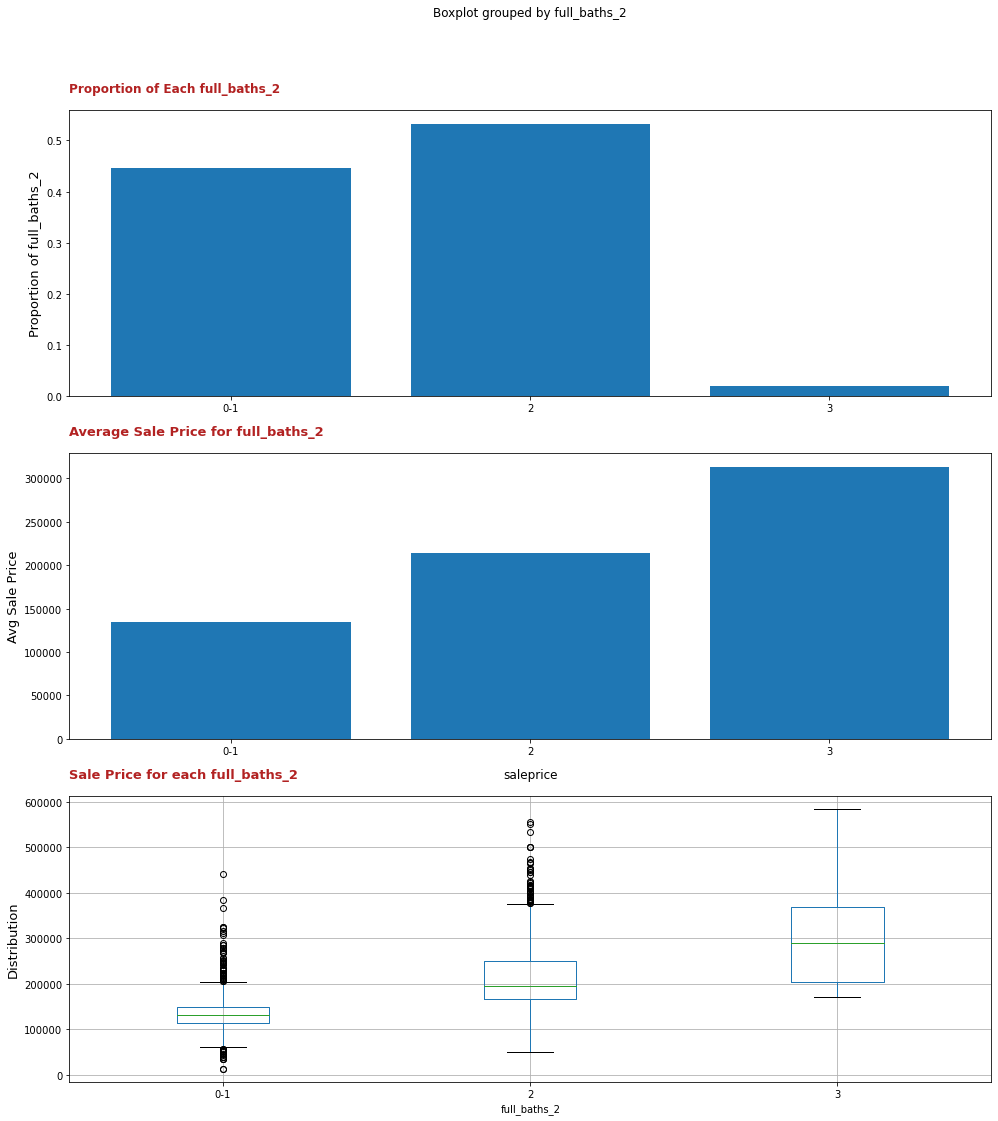

In [234]:
plot_nominal_feature('full_baths_2')

**Full Bath 2**

Observation
- these groups have very different aver Sale Prices and will be a good feature for our model. 
- I'm going to make dummies for these and include them in my model

- Creating dummies for ```full_baths_2```, joining to df, and adding full_bath_2 and full_bath_3 to our model

In [235]:
df = df.join(pd.get_dummies(df.full_baths_2, prefix='full_bath'))

Appending  'full_bath_2' and 'full_bath_3' to features list

In [236]:
features.append('full_bath_2')
features.append('full_bath_3')

**Half Bathroom** <font color=green>INCLUDED 1 Dummy in model</font>

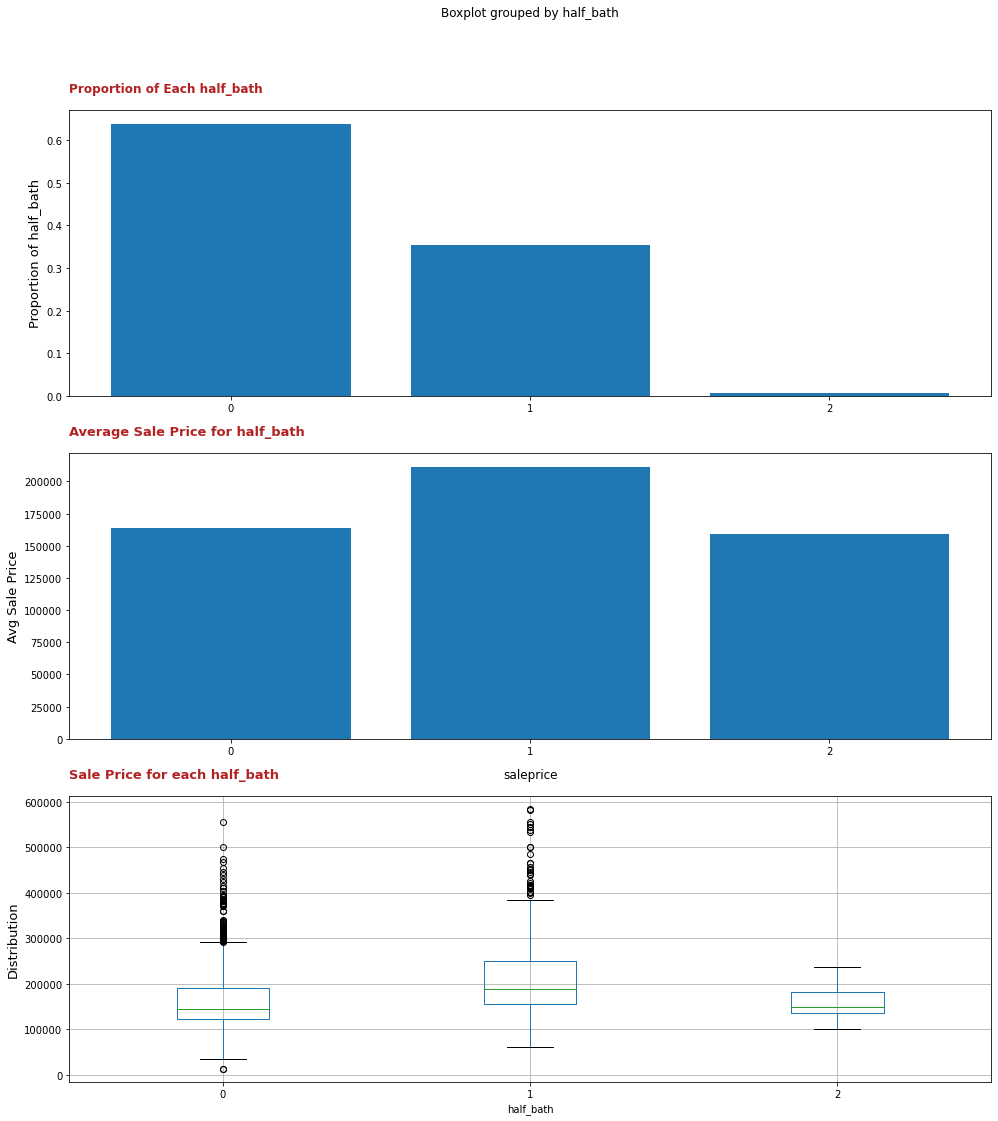

In [237]:
plot_nominal_feature('half_bath')

In [238]:
df.groupby('half_bath')['saleprice'].describe()

count           mean           std       min       25%       50%  \
half_bath                                                                      
0          1288.0  163613.333075  68622.520431   12789.0  122000.0  145000.0   
1           713.0  211510.882188  84449.552121   61000.0  155000.0  188900.0   
2            15.0  159428.200000  39544.625062  100000.0  135500.0  150000.0   

                75%       max  
half_bath                      
0          190000.0  555000.0  
1          250000.0  584500.0  
2          182500.0  235876.0

**Half Bathroom**

Observation
- There is a large price difference between houses with 1 Half Bathroom and all others. 
- there are only 15 houses listed as having 2 half bathrooms, and their average Sale Price is close to houses with 0. So we will group these together and then compare them to houses with 1 half bathroom

- Creating dummies for ```half_bath``` and dropping both 0 and 2 in order to compare houses with 1 half bathroom to houses with more or less than 1 half bathroom. 
- including ```half_bath_1``` in model

In [239]:
df = df.join(pd.get_dummies(df.half_bath, prefix='half_bath'))

Appending 'half_bath_1' to features list

In [240]:
features.append('half_bath_1')

**Basement Full Bathrooms** <font color=green>INCLUDED Dummies in our model</font>

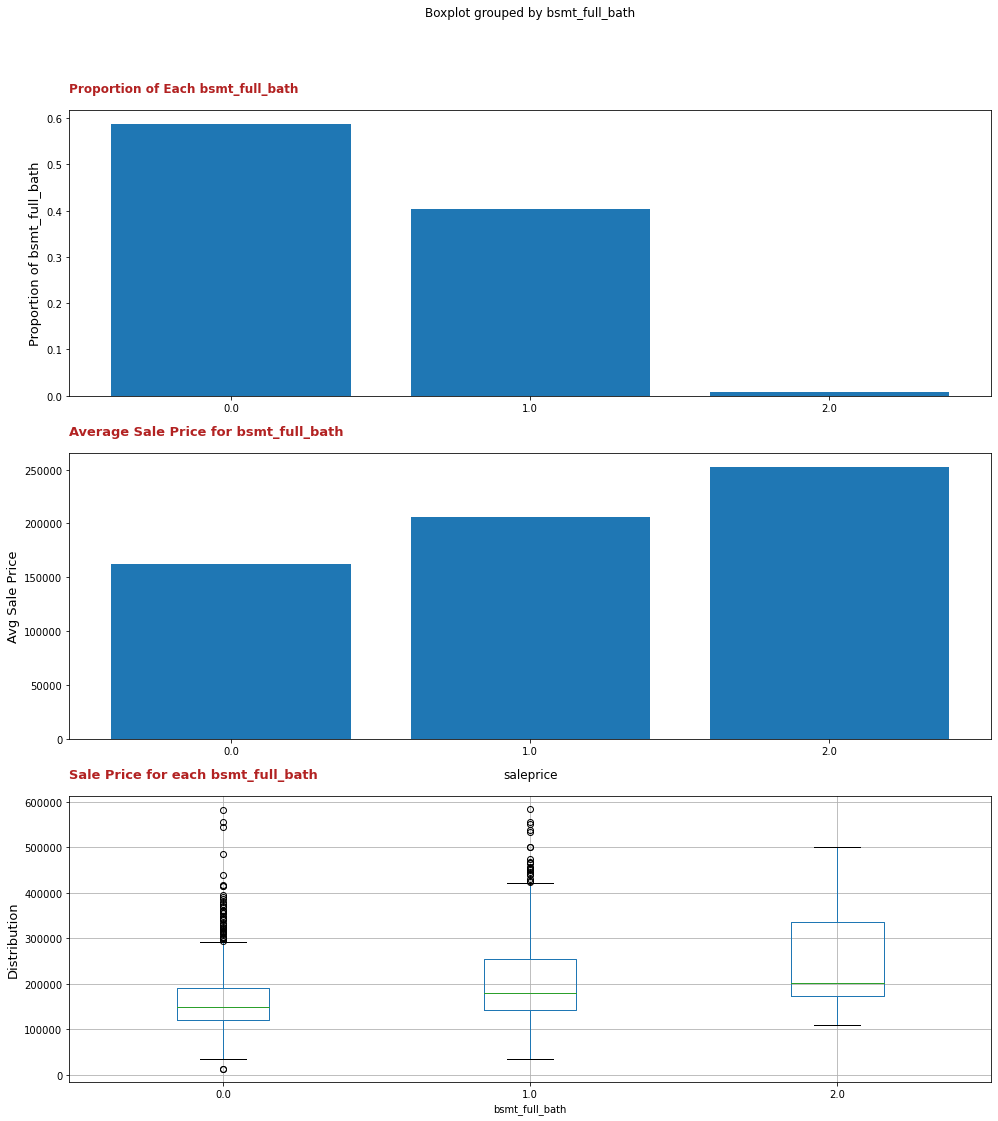

In [241]:
plot_nominal_feature('bsmt_full_bath')

In [242]:
df.groupby('bsmt_full_bath')['saleprice'].describe()

count           mean            std       min        25%  \
bsmt_full_bath                                                              
0.0             1186.0  162065.944351   63930.130701   12789.0  121250.00   
1.0              814.0  205992.852580   86985.688804   35311.0  142500.00   
2.0               16.0  252766.437500  118187.326708  108959.0  173334.25   

                     50%       75%       max  
bsmt_full_bath                                
0.0             149950.0  190000.0  582933.0  
1.0             180000.0  255000.0  584500.0  
2.0             200750.0  336750.0  500067.0

**Basement Full Bath**

Observation
- there are only 2 houses with 2 basment full bathrooms. We will drop these 2 rows and compare houses with 0, 1, or 2 bathrooms

- creating dummies for ```bsmt_full_bath```, joining to df
- we will include 'bsmt_full_bath_1' and 'bsmt_full_bath_2' in our model

In [243]:
df = df.join(pd.get_dummies(df.bsmt_full_bath, prefix='bsmt_full_bath'))

Appending 'bsmt_full_bath_1' and 'bsmt_full_bath_2' to features list

In [244]:
features.append('bsmt_full_bath_1.0')
features.append('bsmt_full_bath_2.0')

**Basement Half Bath**

**Basement Half Bath**

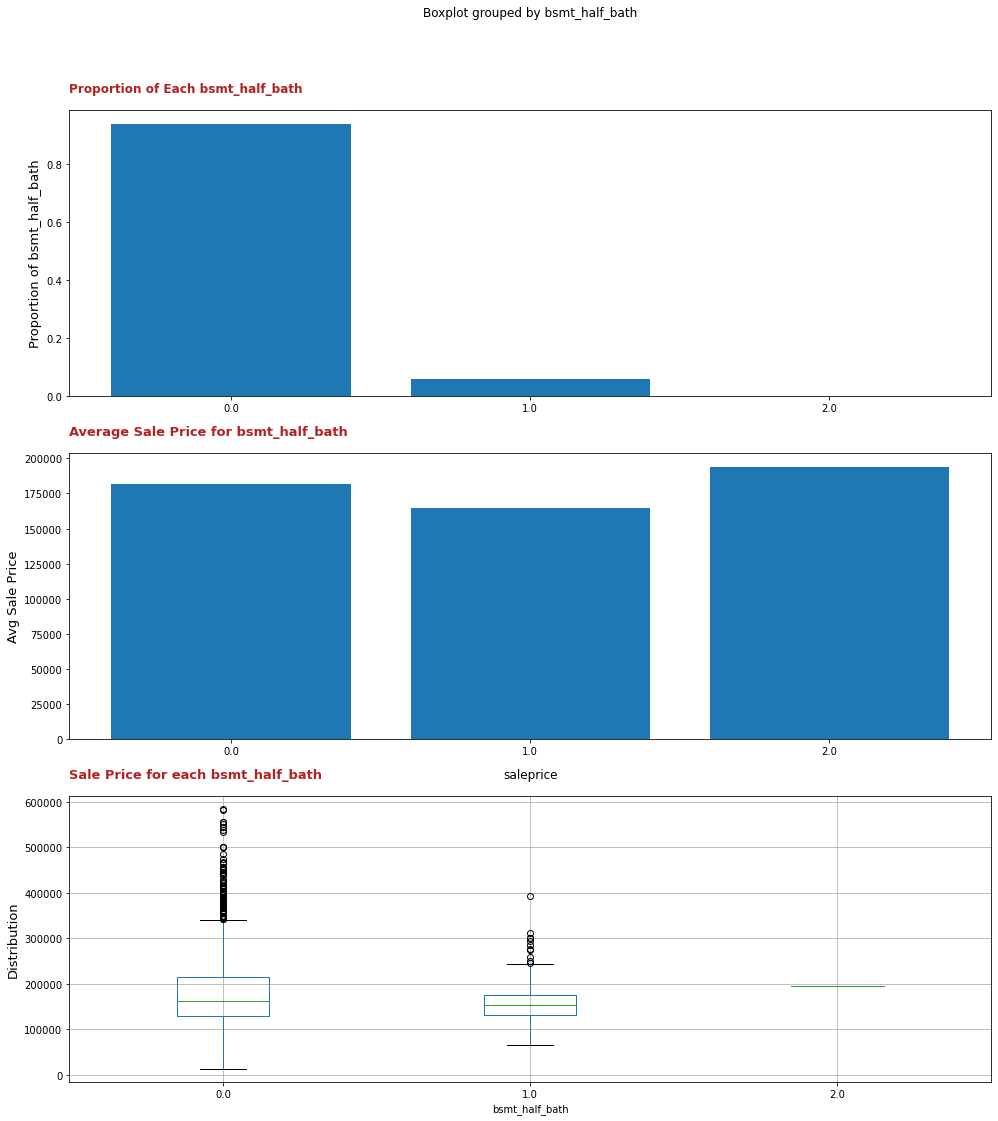

In [245]:
plot_nominal_feature('bsmt_half_bath')

In [246]:
df.bsmt_half_bath.value_counts(normalize=True)

0.0    0.941468
1.0    0.058036
2.0    0.000496
Name: bsmt_half_bath, dtype: float64

In [247]:
df.groupby('bsmt_half_bath')['saleprice'].describe()

count           mean           std       min       25%  \
bsmt_half_bath                                                            
0.0             1898.0  181483.951528  79085.113697   12789.0  129500.0   
1.0              117.0  164802.683761  52873.774507   64500.0  131250.0   
2.0                1.0  194201.000000           NaN  194201.0  194201.0   

                     50%       75%       max  
bsmt_half_bath                                
0.0             162250.0  214375.0  584500.0  
1.0             153000.0  175900.0  392500.0  
2.0             194201.0  194201.0  194201.0

**Basement Half Bath**

Observation
- 94% of the dataset have 0 basement half bathrooms and the groups' Sale Price is skewed right. 
- the median values for 0 and 1 basement half bathrooms is within 11,000 of eachother
- we will not include this feature in our model. 

**Fireplaces** <font color=green>INCLUDED Dummies in model</font>

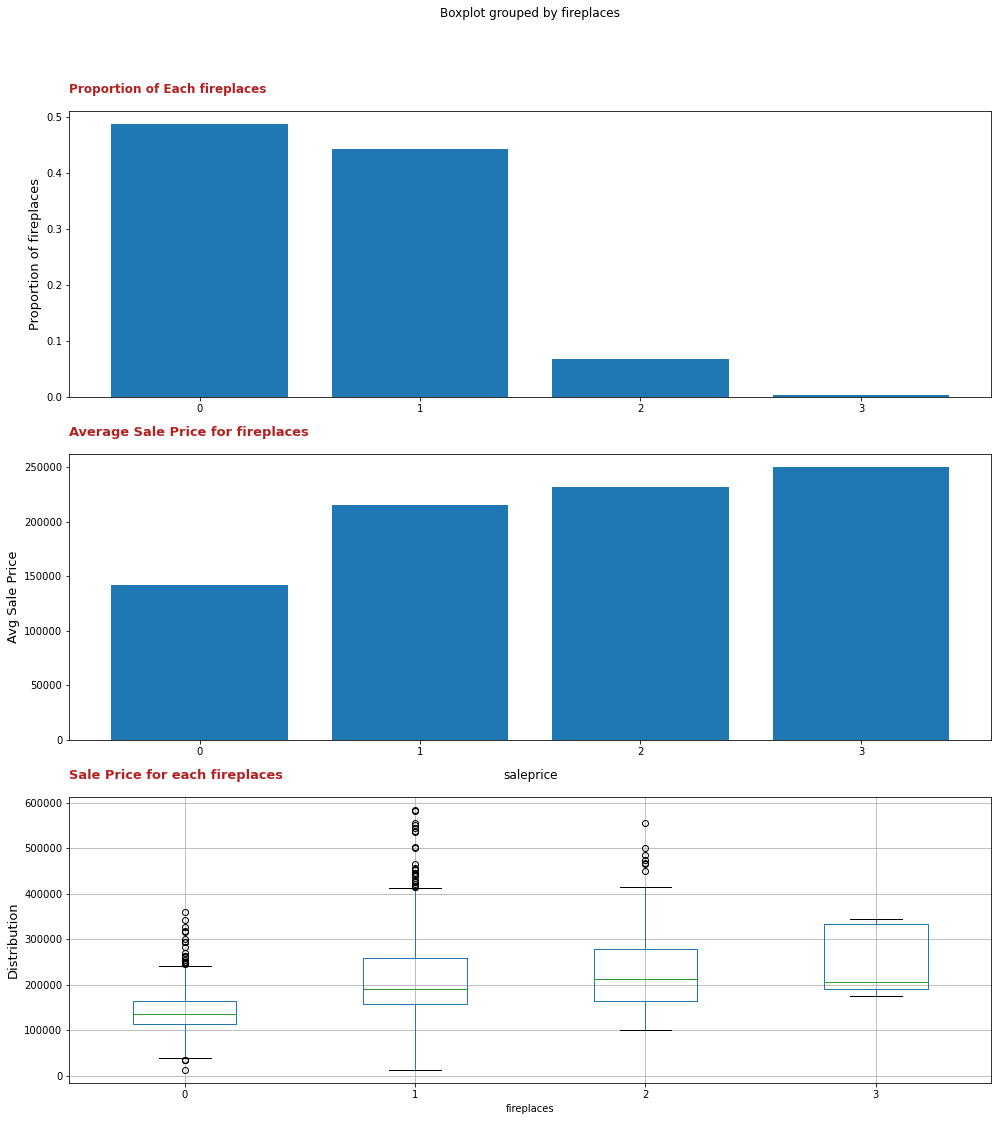

In [248]:
plot_nominal_feature('fireplaces')

In [249]:
df.fireplaces.value_counts()

0    982
1    892
2    137
3      5
Name: fireplaces, dtype: int64

In [250]:
df.groupby('fireplaces')['saleprice'].describe()

count           mean           std       min       25%       50%  \
fireplaces                                                                     
0           982.0  141655.492872  45241.101954   13100.0  113791.5  136150.0   
1           892.0  215020.673767  83164.464867   12789.0  156824.0  190000.0   
2           137.0  231968.394161  89548.046953  100000.0  164000.0  213000.0   
3             5.0  249770.000000  82694.101966  174850.0  190000.0  205000.0   

                 75%       max  
fireplaces                      
0           164925.0  360000.0  
1           259625.0  584500.0  
2           277500.0  555000.0  
3           334000.0  345000.0

**Fireplaces**

- About half of the dataset have no fireplaces and on average those houses' Sale Price is about 50,000 less than houses with 1 fireplace. 
- the median Sale Price for all the other houses is within 25,000 from eachother. I'm going to make dummies for 2 groups -> houses with fireplaces and houses without
- Theres only one house with 4 fireplaces. I'm going to remove this one as it is by itself and cannot alone represent other houses with 4 fireplaces.  

- Reducing category groups 'fire_has' and fire_hasnt'

In [251]:
df['fireplace_has'] = ['fire_has' if num > 0 else 'fire_hasnt' for num in df.fireplaces]

- Creating dummies for the new categories and joining them to the dataframe. 

In [252]:
df = df.join(pd.get_dummies(df['fireplace_has']))

Appending 'fire_has' to features list

In [253]:
features.append('fire_has')

**Kitchen Above Ground** <font color=green>INCLUDED 1 dummy in model</font>

In [254]:
df.kitchen_abvgr.value_counts()

1    1935
2      81
Name: kitchen_abvgr, dtype: int64

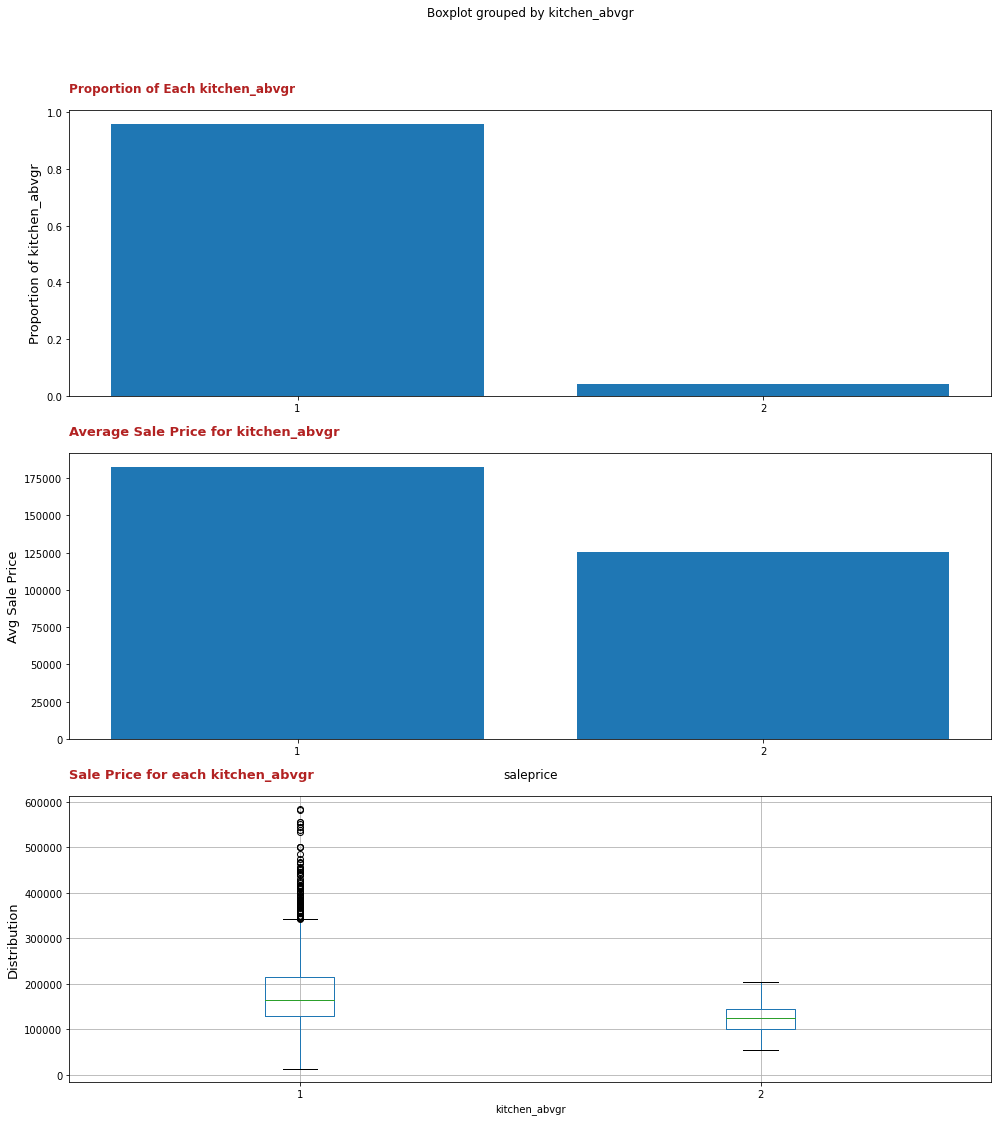

In [255]:
plot_nominal_feature('kitchen_abvgr')

In [256]:
df.groupby('kitchen_abvgr')['saleprice'].describe()

count           mean           std      min       25%  \
kitchen_abvgr                                                           
1              1935.0  182837.354522  78375.822602  12789.0  130000.0   
2                81.0  125214.493827  31934.878419  55000.0  100000.0   

                    50%       75%       max  
kitchen_abvgr                                
1              165000.0  215000.0  584500.0  
2              125000.0  145000.0  205000.0

**Kitchen Above Ground**

Observation
- 96% of the dataset has kitchens, and this group is skewed. 
- the remaining 4% have similar average Sale Prices
- there are only 3 houses with either no kitchen or 3 kitchens in order to better interpret the coefficient as the difference in Sale Price between houses with 1 or 2 kitchens
- I'll remove these 3 houses and make dummies for the remaining 2
- the distribution for 2 kitchen 

- Creating dummies for ```kitchen_abvgr```, joining to df
- 'kitchen_abvgr_2' will be included in our model

In [257]:
df = df.join(pd.get_dummies(df.kitchen_abvgr, prefix='kitchen_abvgr'))

Appending 'kitchen_abvgr_2' to features list

In [258]:
features.append('kitchen_abvgr_2')

**Total Rooms Above Ground**

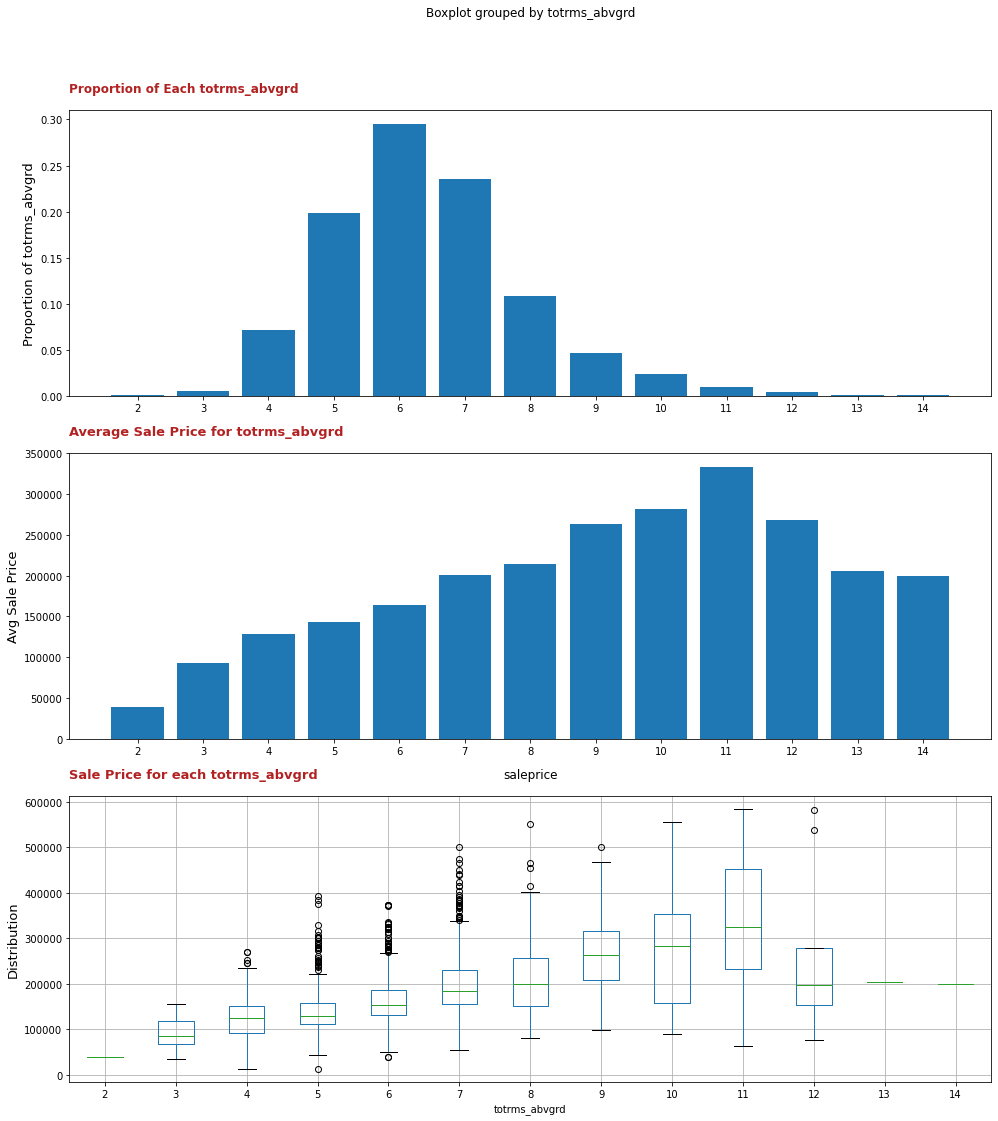

In [259]:
plot_nominal_feature('totrms_abvgrd')

In [260]:
df.totrms_abvgrd.value_counts().sort_index()

2       1
3      11
4     143
5     400
6     596
7     474
8     219
9      94
10     48
11     19
12      9
13      1
14      1
Name: totrms_abvgrd, dtype: int64

In [261]:
df[(df.totrms_abvgrd == 2) | 
   (df.totrms_abvgrd == 13) | 
   (df.totrms_abvgrd == 14)
  ]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
847           190        RH          60.0     10896   Pave       Reg   
1404           20        RL          50.0      5000   Pave       Reg   
1759           90        RL          64.0      8145   Pave       IR1   

     land_contour utilities lot_config land_slope  ... half_bath_1  \
847           Bnk    AllPub     Inside        Gtl  ...           0   
1404          Low    AllPub     Inside        Mod  ...           0   
1759          HLS    AllPub     Corner        Gtl  ...           1   

     half_bath_2 bsmt_full_bath_0.0 bsmt_full_bath_1.0 bsmt_full_bath_2.0  \
847            0                  1                  0                  0   
1404           0                  1                  0                  0   
1759           0                  1                  0                  0   

      fireplace_has  fire_has  fire_hasnt  kitchen_abvgr_1 kitchen_abvgr_2  
847      fire_hasnt         0           1                0               1  
1404     fire_hasnt         0           1                1               0  
1759       fire_has         1           0                0               1  

[3 rows x 133 columns]

In [262]:
df[(df.bedroom_abvgr == 6) |
   (df.bedroom_abvgr == 8) 
  ][['bedroom_abvgr', 'totrms_abvgrd', 'saleprice']]

bedroom_abvgr  totrms_abvgrd  saleprice
524               6             10     119900
528               6             10     125000
811               6              9     135900
847               8             14     200000
971               6             10     145000
1236              6             12     142953
1343              6             10     141000
1427              6             10     130000
1757              6             10     142600
1855              6              8     147983

**Total Rooms Above Ground**
Observation
- asd

**Bedrooms**

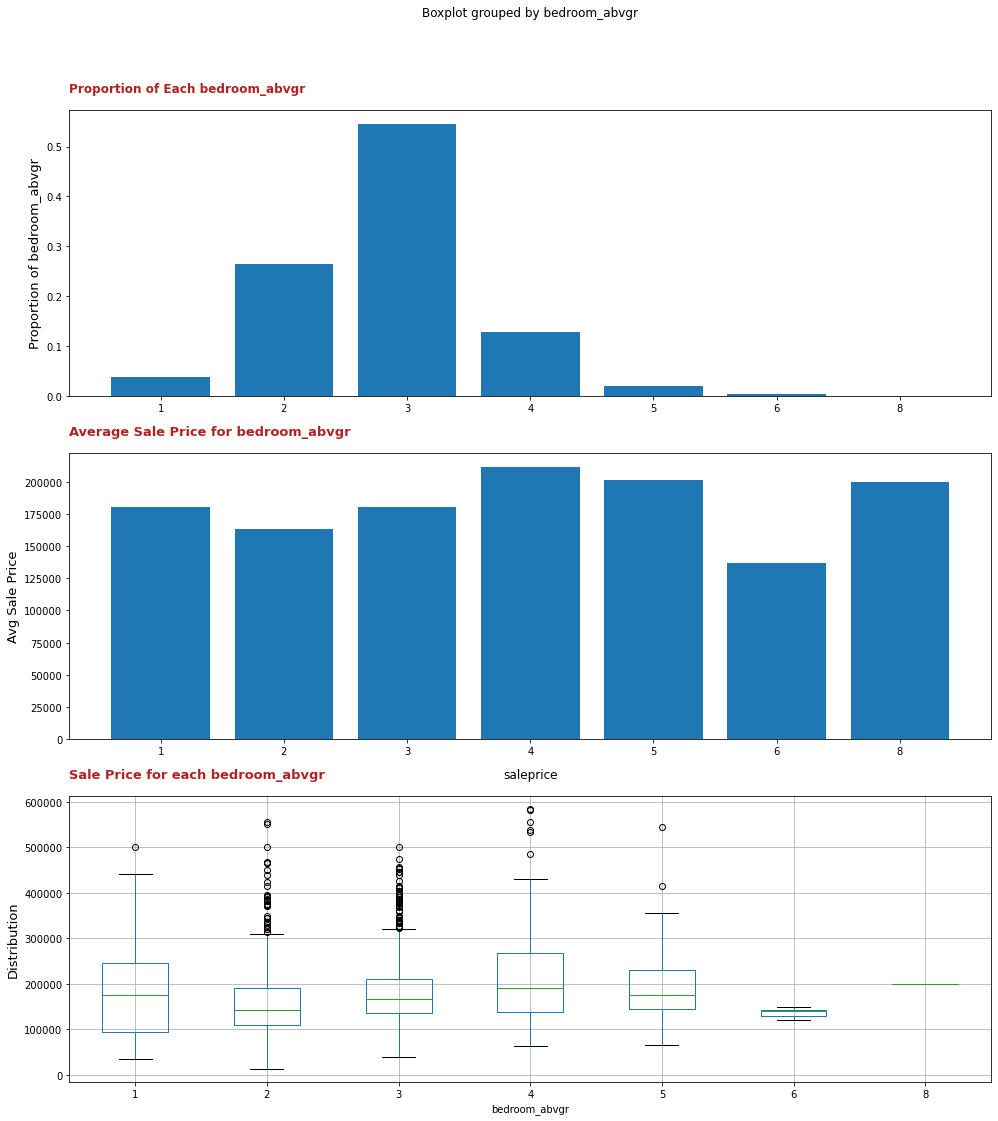

In [263]:
plot_nominal_feature('bedroom_abvgr')

In [264]:
df.bedroom_abvgr.value_counts().sort_index()

1      74
2     533
3    1101
4     258
5      40
6       9
8       1
Name: bedroom_abvgr, dtype: int64

In [265]:
df[df.bedroom_abvgr == 4]['saleprice'].mean() - df[df.bedroom_abvgr == 2]['saleprice'].mean()

48447.97051209331

**Bedrooms**

Obersvation
- for houses with under 6 bedrooms the difference in average Sale Price is less than 50000
- only 10 houses have over 5 bedrooms
- I'm going to create a new column to find the number of extra rooms (total rooms - bedrooms) in order to get fewer groups, then create dummies for them below

**Extra Rooms** <font color=green> INCLUDED 4 dummies in model </font>

Creating new column ```extra_rooms``` calculating difference between total rooms and bedrooms

In [266]:
df['extra_rooms'] = [num - num2 for num, num2 in zip(df.totrms_abvgrd, df.bedroom_abvgr)]

In [267]:
df.groupby('extra_rooms')['saleprice'].mean()

extra_rooms
1    107027.272727
2    127729.965753
3    154583.242105
4    193375.349180
5    246051.764706
6    266628.818182
7    353621.407407
8    359198.166667
Name: saleprice, dtype: float64

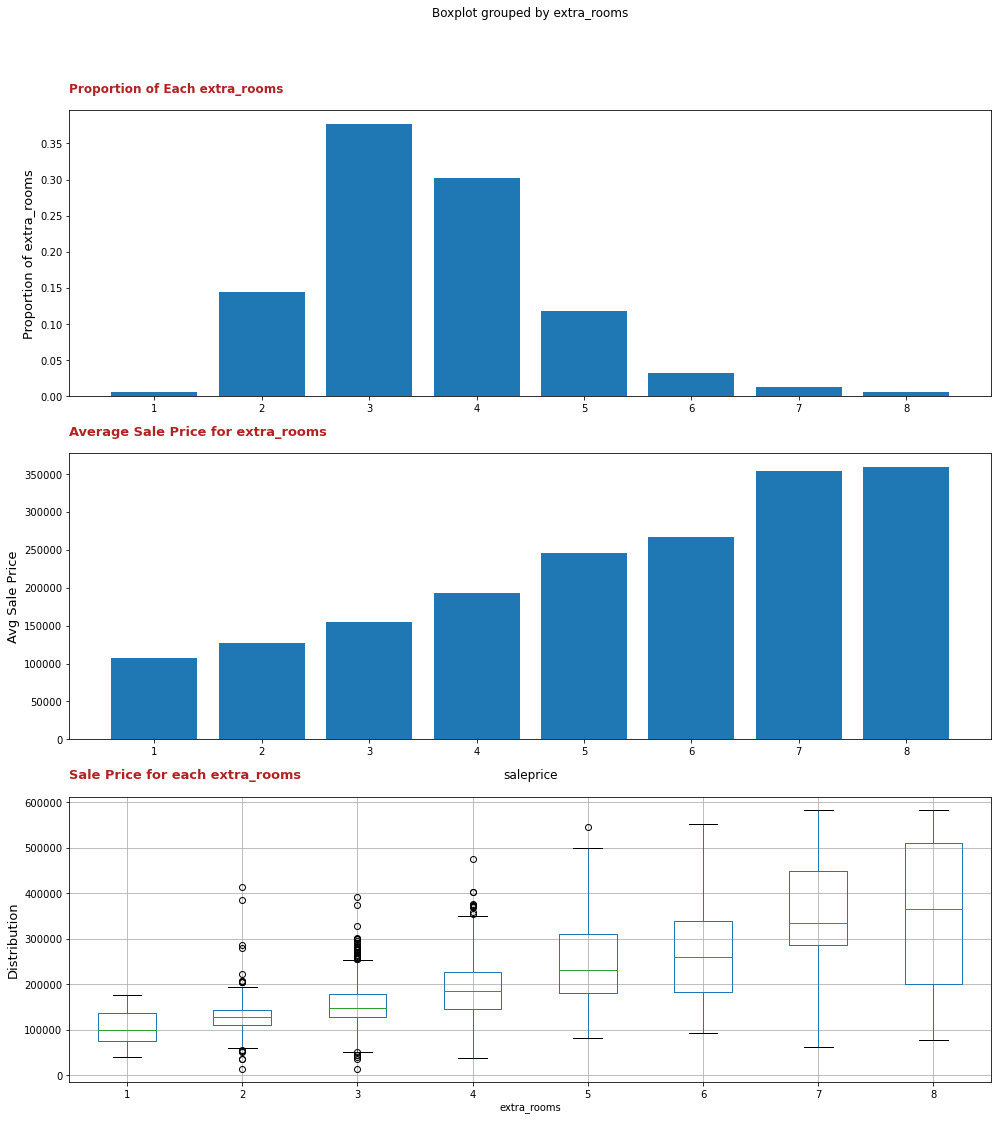

In [268]:
plot_nominal_feature('extra_rooms')

In [269]:
df.extra_rooms.value_counts()

3    760
4    610
2    292
5    238
6     66
7     27
8     12
1     11
Name: extra_rooms, dtype: int64

In [270]:
df.groupby('extra_rooms')['saleprice'].mean()

extra_rooms
1    107027.272727
2    127729.965753
3    154583.242105
4    193375.349180
5    246051.764706
6    266628.818182
7    353621.407407
8    359198.166667
Name: saleprice, dtype: float64

**Extra Rooms** <font color=green>INCLUDED dummies in model</font>

Observation
- there is only 1 house with no extra rooms and 2 with 9 extra rooms. I will drop these 3 rows in order to have fewer groups 
- I'm going to group 1 & 2, 5 & 6, and 7 & 8 as their average sale prices are close

- Creating ```extra_rooms_bins``` to group similar average Sale Price 

In [271]:
df['extra_rooms_bins'] = ['1-2' if x == 1 or x == 2
                         else '5-6' if x == 5 or x == 6
                         else '7-8' if x == 7 or x == 8
                         else str(x)
                         for x in df.extra_rooms]

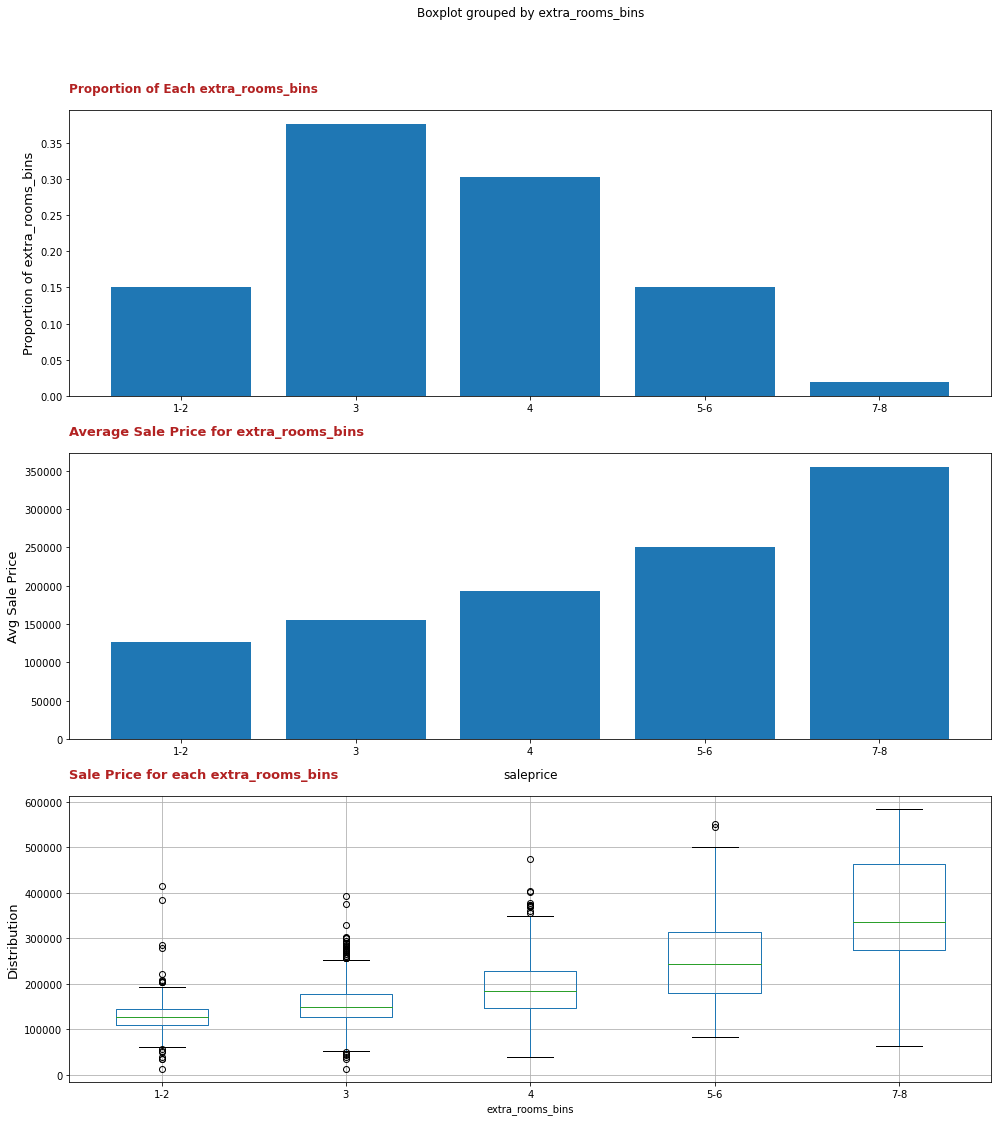

In [272]:
plot_nominal_feature('extra_rooms_bins')

- Creating dummies for new ```extra_rooms_bins```

In [273]:
df = df.join(pd.get_dummies(df.extra_rooms_bins, prefix='extra_rooms'))

Appending 'extra_rooms_3', 'extra_rooms_4', 'extra_rooms_5-6' and 'extra_rooms_7-8' for features list

In [274]:
features.append('extra_rooms_3')
features.append('extra_rooms_4')
features.append('extra_rooms_5-6')
features.append('extra_rooms_7-8')

**Garage Cars** <font color=green>Included Dummies in model</font>

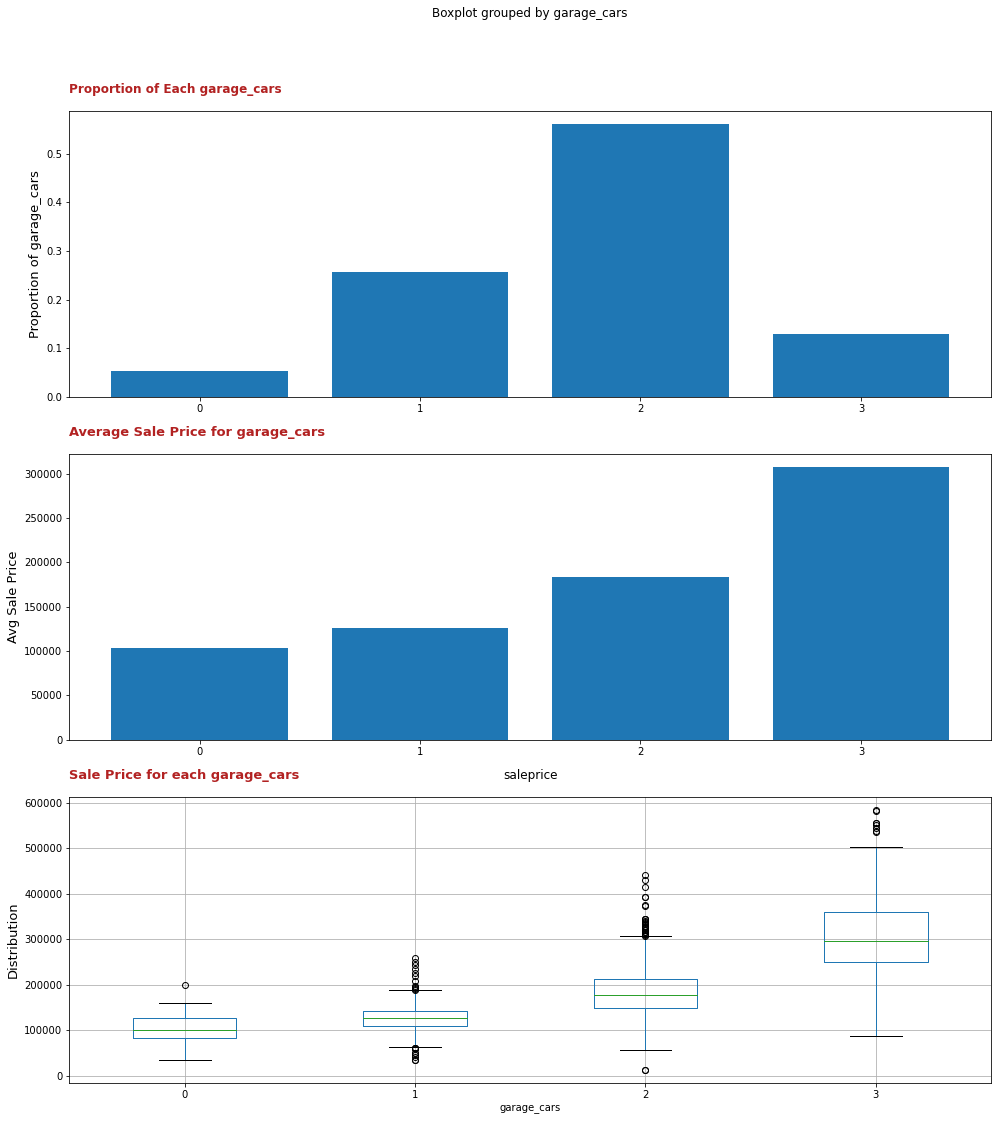

In [275]:
plot_nominal_feature('garage_cars')

In [276]:
df.garage_cars.value_counts(normalize=True)

2    0.560516
1    0.257440
3    0.128472
0    0.053571
Name: garage_cars, dtype: float64

In [277]:
df.groupby('garage_cars')['saleprice'].describe()

count           mean           std      min       25%       50%  \
garage_cars                                                                     
0             108.0  103028.833333  31441.901927  34900.0   82000.0  101000.0   
1             519.0  126022.323699  28953.460074  35000.0  109700.0  127000.0   
2            1130.0  183977.333628  52223.956332  12789.0  148000.0  177219.5   
3             259.0  306971.305019  93506.311700  87000.0  250000.0  296000.0   

                  75%       max  
garage_cars                      
0            127125.0  200000.0  
1            141250.0  259500.0  
2            212000.0  441929.0  
3            360959.5  584500.0

**Garage Cars**

Observations
- there's only one house with a 5 car garage, and the Sale Price is similar to 1 car. garages, so I'm going to drop the row as it's not a good indicator for majority of houses.
- one of the houses with a 4 car garage (out of 13) is an extreme outlier, so we will drop this row to better represent this category
- 3 car garage houses have significantly higher Sale Price and will be a good indicator.
- 2 car garage houses represent the majority of houses and are slightly skewed right.
- I'm going to create dum

- Creating dummies for ```garage_cars```, joining to df, and dropping first (0 cars)

In [278]:
df = df.join(pd.get_dummies(df.garage_cars, prefix='garage_cars'))

Appending 'garage_cars_2' and 'garage_cars_3' to features list

In [279]:
features.append('garage_cars_2')
features.append('garage_cars_3')

# Adding this made the model worse...
- should I not include? Or keep and wait for lass/ridge to sort out?

**Year Built** <font color=green> INCLUDED! in model </font>

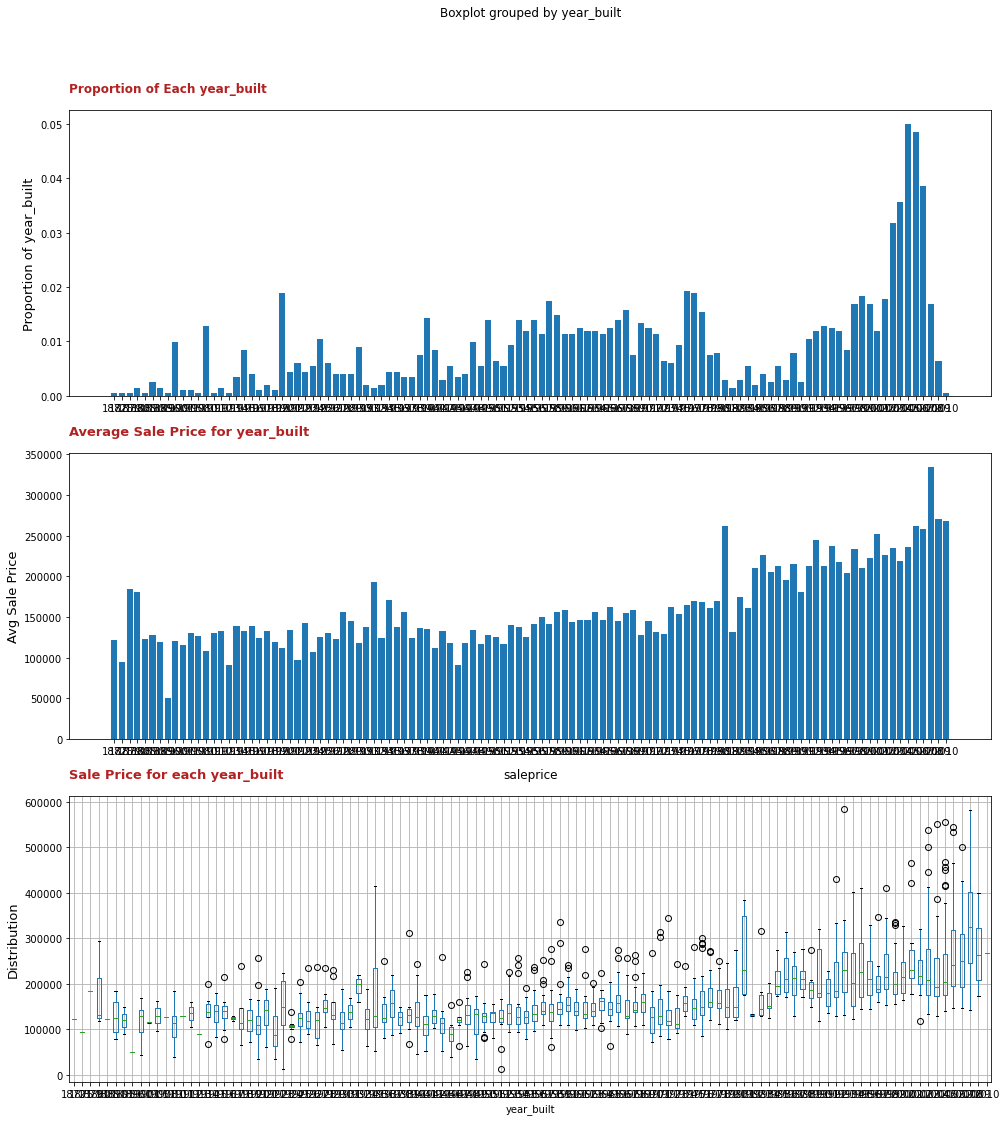

In [280]:
plot_nominal_feature('year_built')

**Year Built**

Observation
- from 1872 to 2010, there is a clear rise in Sale Price. 
- there are 111 years recorded for the entire dataset. 
- this will result in an effective coefficient for this feature
- we removed 2 outliers built in 1893 and 1894 to improve the coefficient slightly. 
- we will include this feature in our model. 

Appending 'year_built' to features list

In [281]:
features.append('year_built')

**Year Remodeled / Add**

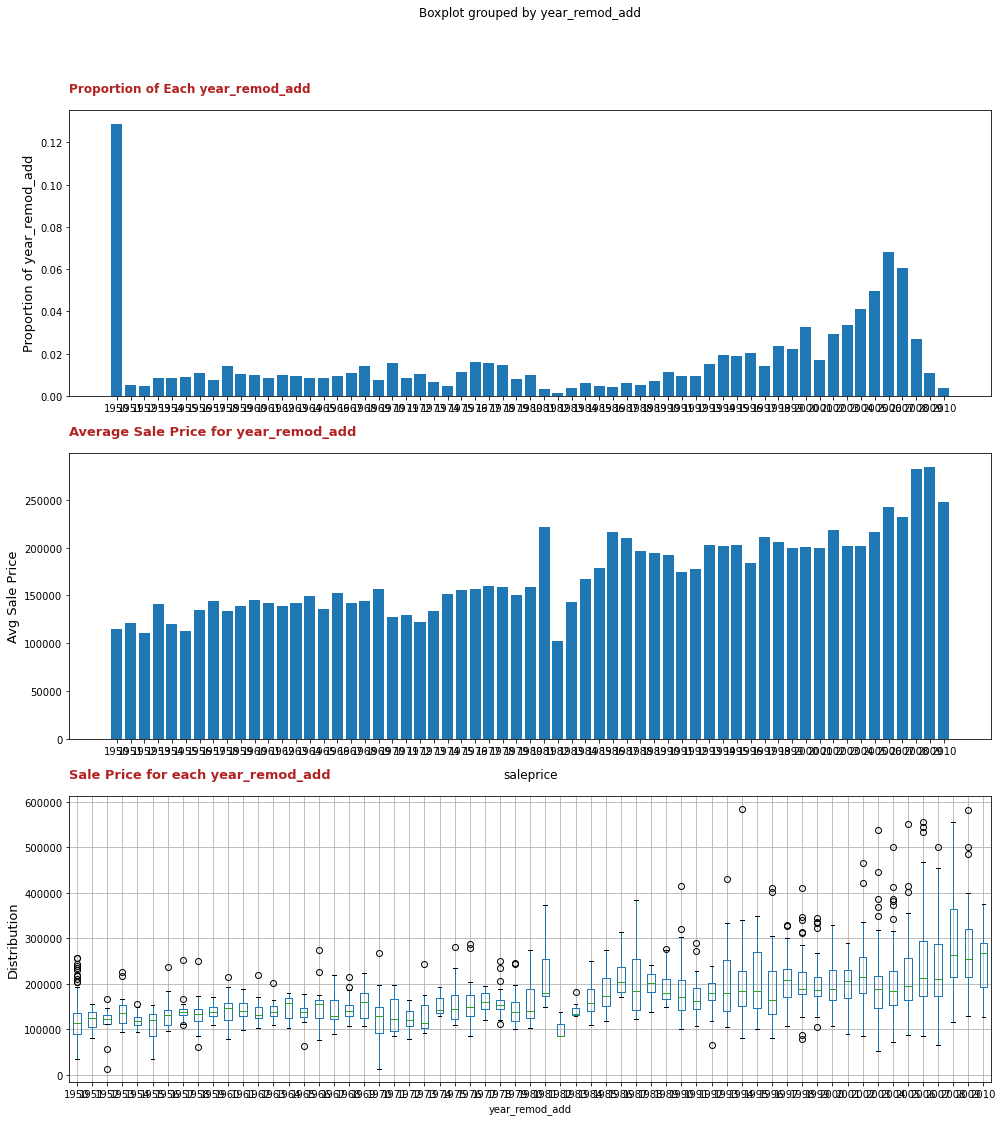

In [282]:
plot_nominal_feature('year_remod_add')

In [283]:
df.year_remod_add.describe()

count    2016.000000
mean     1984.115575
std        21.096235
min      1950.000000
25%      1964.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod_add, dtype: float64

In [284]:
df.year_remod_add.nunique()

61

**Year Remodeled / Add**

Observations
- for all houses that were built before 1950, this feature records them as 1950.
- there are only 66 years recored altogether from 1950-2010.
- 87% of the houses were remodelled or added onto after 1950, this means a coefficient for this feature. 

**MS SubClass - Type of Dwelling** <font color=green> INCLUDED! dummies in model </font>

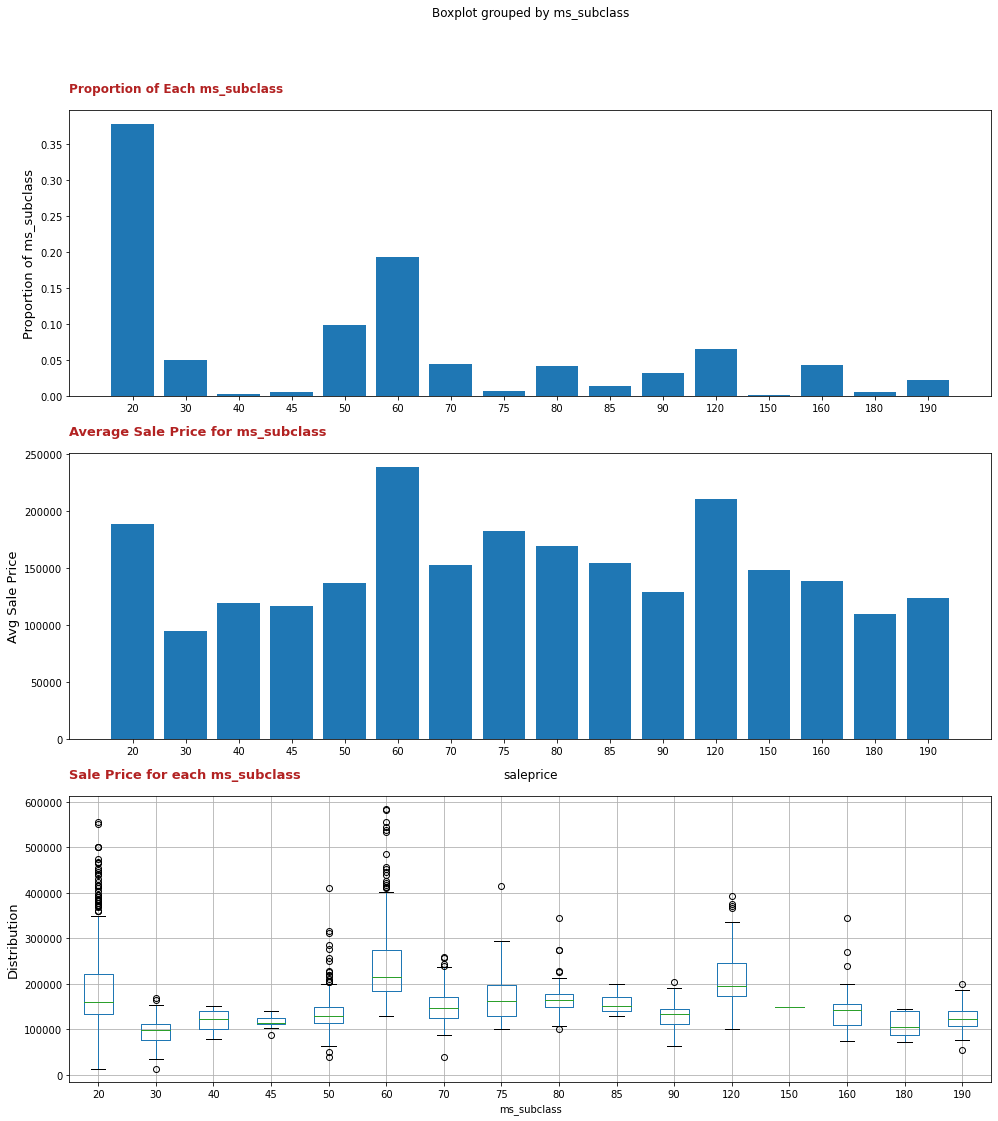

In [285]:
plot_nominal_feature('ms_subclass')

I'm chose to bin ```ms_subclass``` by each groups average sale price reducing the categories from 16 to 5

In [286]:
ms_cuts = pd.cut(df.groupby('ms_subclass')['saleprice'].mean(), 
                 bins=5, 
                 labels=[1, 2, 3, 4, 5])
df['ms_subclass_bins'] = df.ms_subclass.map(ms_cuts.to_dict())

In [287]:
df.groupby('ms_subclass_bins')['saleprice'].mean()

ms_subclass_bins
1    105118.982456
2    139127.853547
3    165188.883929
4    188316.278351
5    231776.634615
Name: saleprice, dtype: float64

In [288]:
df['ms_subclass_bins'].value_counts(normalize=True)

4    0.384921
5    0.257937
2    0.216766
1    0.084821
3    0.055556
Name: ms_subclass_bins, dtype: float64

Plotting the new binned column

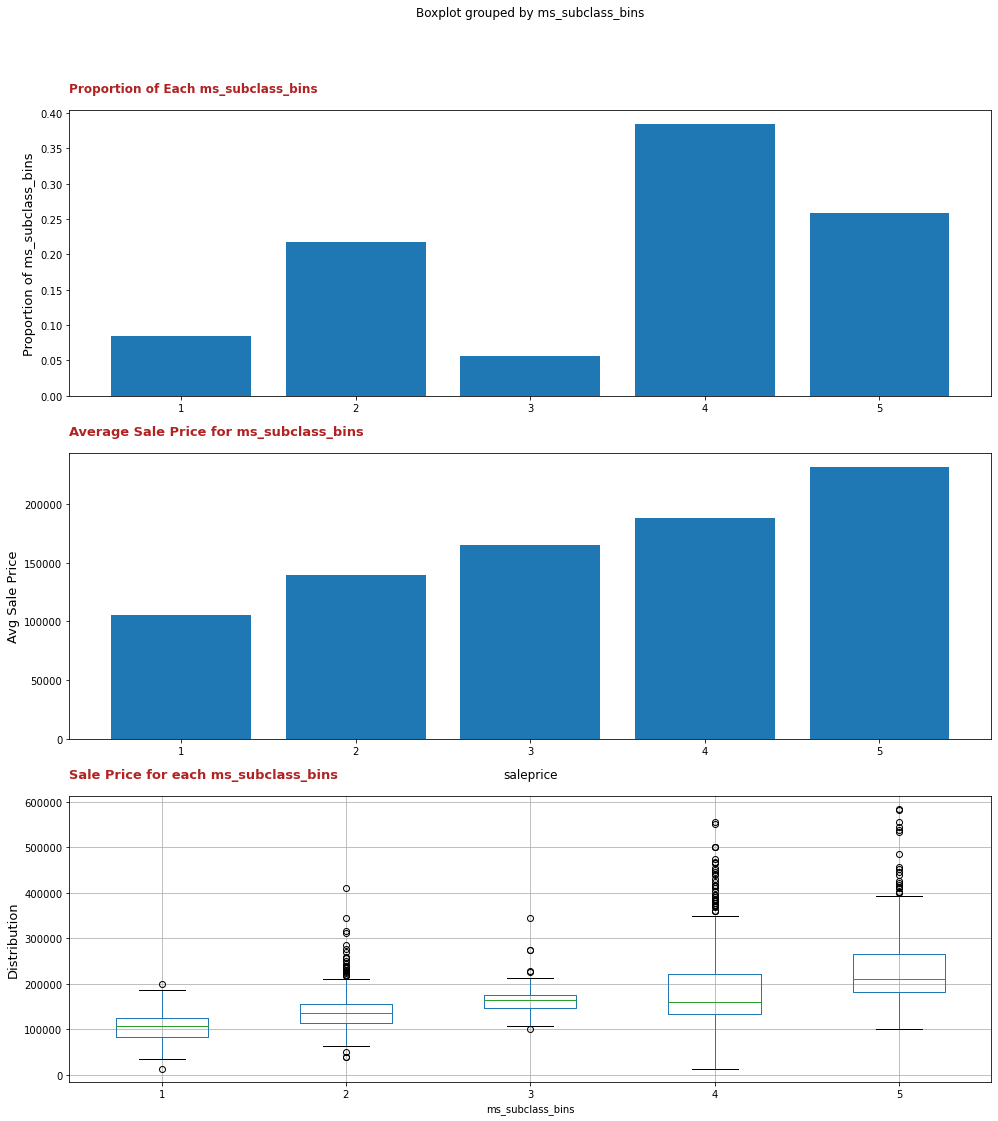

In [289]:
plot_nominal_feature('ms_subclass_bins')

In [290]:
df[df['ms_subclass_bins'] == 1]['ms_subclass'].value_counts()

30     100
190     45
180     11
45      11
40       4
Name: ms_subclass, dtype: int64

In [291]:
df[df['ms_subclass_bins'] == 2]['ms_subclass'].value_counts()

50     197
70      88
160     87
90      64
150      1
Name: ms_subclass, dtype: int64

In [292]:
df[df['ms_subclass_bins'] == 3]['ms_subclass'].value_counts()

80    84
85    28
Name: ms_subclass, dtype: int64

In [293]:
df[df['ms_subclass_bins'] == 4]['ms_subclass'].value_counts()

20    763
75     13
Name: ms_subclass, dtype: int64

In [294]:
df[df['ms_subclass_bins'] == 5]['ms_subclass'].value_counts()

60     390
120    130
Name: ms_subclass, dtype: int64

In [295]:
df[['ms_subclass_bins', 'ms_subclass']].head

<bound method NDFrame.head of       ms_subclass_bins  ms_subclass
0                    5           60
1                    5           60
2                    4           20
3                    5           60
4                    2           50
...                ...          ...
2011                 4           20
2012                 1           30
2013                 2           50
2014                 4           20
2015                 5           60

[2016 rows x 2 columns]>

In [296]:
df.groupby('ms_subclass_bins')['saleprice'].describe()

count           mean           std       min       25%  \
ms_subclass_bins                                                           
1                 171.0  105118.982456  31143.365229   12789.0   83750.0   
2                 437.0  139127.853547  43179.666681   37900.0  114504.0   
3                 112.0  165188.883929  32135.707566  100000.0  147000.0   
4                 776.0  188316.278351  81020.906089   13100.0  133925.0   
5                 520.0  231776.634615  74485.476040   99500.0  181000.0   

                       50%       75%       max  
ms_subclass_bins                                
1                 106500.0  125000.0  200000.0  
2                 135000.0  155000.0  410000.0  
3                 164200.0  175000.0  345000.0  
4                 160000.0  222000.0  555000.0  
5                 211500.0  266250.0  584500.0

In [297]:
df.saleprice.describe()

count      2016.000000
mean     180522.150298
std       77874.522342
min       12789.000000
25%      129500.000000
50%      161500.000000
75%      213062.500000
max      584500.000000
Name: saleprice, dtype: float64

**MS SubClass**

Observations
- I chose to use bins 2, 4, and 5. Together they represent 84% of the dataset. 
- 

I made dummy columns for ```ms_subclass_bins``` and joined them to my dataframe

In [298]:
cols = pd.get_dummies(df.ms_subclass_bins, prefix='ms_subclass', drop_first=True).columns
trial = pd.get_dummies(df.ms_subclass_bins, prefix='ms_subclass', drop_first=True)
df = df.join(trial)

Appending  'ms_subclass_2', 'ms_subclass_4', 'ms_subclass_5' to features list

In [299]:
features.append('ms_subclass_2')
features.append('ms_subclass_4')
features.append('ms_subclass_5')

## Categorical Features

In [300]:
# def make_dummies(feature):
#     cols = pd.get_dummies(df.ms_subclass_bins, prefix=feature, drop_first=True).columns
#     trial = pd.get_dummies(df.ms_subclass_bins, prefix='ms_subclass', drop_first=True)
# def remove_dummies(feature):

In [301]:
# df.drop(labels=cols, axis=1, inplace=True) 

### EDA Conclusion 
- Are we likely to be able to answer "problem statement" with the data. 
- What we've discovered during EDA. 

In [302]:
columns_info(df)

nulls    dtype  nunique_values  \
ms_subclass           0    int64              16   
ms_zoning             0   object               7   
lot_frontage          0  float64             117   
lot_area              0    int64            1450   
street                0   object               2   
...                 ...      ...             ...   
ms_subclass_bins      0    int64               5   
ms_subclass_2         0    uint8               2   
ms_subclass_3         0    uint8               2   
ms_subclass_4         0    uint8               2   
ms_subclass_5         0    uint8               2   

                                                      unique_values  \
ms_subclass       [60, 20, 50, 180, 160, 70, 120, 190, 85, 30, 9...   
ms_zoning               [RL, RM, FV, C (all), A (agr), RH, I (all)]   
lot_frontage      [70.0, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, 72...   
lot_area          [13517, 11492, 7922, 9802, 14235, 16492, 3675,...   
street                                                 [Pave, Grvl]   
...                                                             ...   
ms_subclass_bins                                    [5, 4, 2, 1, 3]   
ms_subclass_2                                                [0, 1]   
ms_subclass_3                                                [0, 1]   
ms_subclass_4                                                [0, 1]   
ms_subclass_5                                                [1, 0]   

                                                       value_counts  
ms_subclass       20     763
60     390
50     197
120    130
30...  
ms_zoning         RL         1575
RM          305
FV          10...  
lot_frontage      60.0     193
70.0     160
80.0     126
63.0   ...  
lot_area          9600     34
7200     27
6000     26
7500     1...  
street            Pave    2009
Grvl       7
Name: street, dtype:...  
...                                                             ...  
ms_subclass_bins  4    776
5    520
2    437
1    171
3    112
N...  
ms_subclass_2     0    1579
1     437
Name: ms_subclass_2, dtype...  
ms_subclass_3     0    1904
1     112
Name: ms_subclass_3, dtype...  
ms_subclass_4     0    1240
1     776
Name: ms_subclass_4, dtype...  
ms_subclass_5     0    1496
1     520
Name: ms_subclass_5, dtype...  

[149 rows x 5 columns]

--- 
---

In [303]:
df_train = df[['saleprice', 'gr_liv_area', 'total_bsmt_sf', 'garage_area',
               'lot_config_col_fr3', 'func_poor', 'func_mod', 'year_built',
               'year_remod_add', 'ms_subclass_2', 'ms_subclass_4', 'ms_subclass_5',
               'garage_cars_2', 'garage_cars_3', 'fire_has', 'full_bath_2', 'full_bath_3',
               'half_bath_1', 'kitchen_abvgr_2', 'bsmt_full_bath_1.0', 'bsmt_full_bath_2.0',
               'kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'paved_drive_P',
               'paved_drive_N', 'electrical_A_F', 'electrical_P_Mix', 'neighborhood_bin_2',
               'neighborhood_bin_3', 'neighborhood_bin_4', 'neighborhood_bin_5', 'bsmt_GLQ',
               'bsmt_YesBas', 'central_air_N', 'extra_rooms_3', 'extra_rooms_4',
               'extra_rooms_5-6', 'extra_rooms_7-8', 'garage_cond_Gd_Ta', 
               'condition_Feedr_RRAe_RRNe', 'condition_Norm_RRAn', 'condition_PosA_PosN',
               'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Lev_Low']]

In [304]:
df_train.shape

(2016, 46)

In [305]:
# X = df_train.iloc[:, 1:]

In [306]:
# y = 

In [307]:
# X

In [308]:
# columns_info(df_train)

In [309]:
df_train.head()

saleprice  gr_liv_area  total_bsmt_sf  garage_area  lot_config_col_fr3  \
0     130500         1479          725.0        475.0                   1   
1     220000         2122          913.0        559.0                   1   
2     109000         1057         1057.0        246.0                   0   
3     174000         1444          384.0        400.0                   0   
4     138500         1445          676.0        484.0                   0   

   func_poor  func_mod  year_built  year_remod_add  ms_subclass_2  ...  \
0          0         0        1976            2005              0  ...   
1          0         0        1996            1997              0  ...   
2          0         0        1953            2007              0  ...   
3          0         0        2006            2007              0  ...   
4          0         0        1900            1993              1  ...   

   extra_rooms_4  extra_rooms_5-6  extra_rooms_7-8  garage_cond_Gd_Ta  \
0              0                0                0                  1   
1              1                0                0                  1   
2              0                0                0                  1   
3              1                0                0                  1   
4              0                0                0                  1   

   condition_Feedr_RRAe_RRNe  condition_Norm_RRAn  condition_PosA_PosN  \
0                          1                    0                    0   
1                          0                    1                    0   
2                          0                    1                    0   
3                          0                    1                    0   
4                          0                    1                    0   

   land_contour_Bnk  land_contour_HLS  land_contour_Lev_Low  
0                 0                 0                     0  
1                 0                 0                     0  
2                 0                 0                     0  
3                 0                 0                     0  
4                 0                 0                     0  

[5 rows x 46 columns]

# Processing and Modeling 
- [ ] Are categorical variables one-hot encoded?
- [ ] Does the student investigate or manufacture features with linear relationships to the target?
- [ ] Have the data been scaled appropriately?
- [ ] Does the student properly split and/or sample the data for validation/training purposes?
- [ ] Does the student utilize feature selection to remove noisy or multi-collinear features?
- [ ] Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: linear regression, lasso, and ridge)?
- [ ] Does the student defend their choice of production model relevant to the data at hand and the problem?
- [ ] Does the student explain how the model works and evaluate its performance successes/downfalls?

### One-Hot Encoding Categorical Variables

### Multicollinearity

In [310]:
# 'gr_liv_area', 'total_bsmt_sf', 'garage_area', 'year_built', 'year_remod_add'

### Train Test Split

In [311]:
len(features)

44

In [312]:
X = df[features]
y = df['saleprice'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=73)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1612, 44) (1612,)
(404, 44) (404,)


### Scaling Data

In [313]:
ss = StandardScaler()

ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [314]:
df_X_train_ss = pd.DataFrame(data=X_train_ss,
            columns=features)

In [363]:
list(zip(X_train.columns, ss.scale_))

[('gr_liv_area', 480.94087303894844),
 ('total_bsmt_sf', 429.12891748020405),
 ('garage_area', 208.93609992222562),
 ('central_air_N', 0.2510890085246618),
 ('bsmt_GLQ', 0.4541972486303576),
 ('bsmt_YesBas', 0.46481657891215467),
 ('condition_Feedr_RRAe_RRNe', 0.24894023852575242),
 ('condition_Norm_RRAn', 0.3253673295955658),
 ('condition_PosA_PosN', 0.14574203569591268),
 ('neighborhood_bin_2', 0.42406858958536225),
 ('neighborhood_bin_3', 0.4625645628364082),
 ('neighborhood_bin_4', 0.17503363098822597),
 ('neighborhood_bin_5', 0.3006605661551522),
 ('lot_config_col_fr3', 0.25001770159424314),
 ('land_contour_Bnk', 0.18930254216139603),
 ('land_contour_HLS', 0.20381031931010923),
 ('land_contour_Lev_Low', 0.14369045516544157),
 ('garage_cond_Gd_Ta', 0.2741907413709433),
 ('kitchen_qual_Ex', 0.25739184496230505),
 ('kitchen_qual_Fa', 0.15743996459042306),
 ('kitchen_qual_Gd', 0.48779466279356987),
 ('electrical_A_F', 0.2563558868689162),
 ('electrical_P_Mix', 0.06089524164668996),
 (

### Final Test

In [357]:
lm = LinearRegression(n_jobs=-1)

lm.fit(X_train_ss, y_train)

lm.score(X_test_ss, y_test), lm.score(X_train_ss, y_train)

(0.8991479733552121, 0.8946503261018071)

In [359]:
metrics.mean_squared_error(y_test, lm.predict(X_test_ss), squared=False)

24778.660000901433

# Model Validation 

**Cross Validation**

In [330]:
lm = LinearRegression(n_jobs=-1)

scores = cross_val_score(lm, X, y, cv=5)

print('Cross val scores:', scores)
print('Mean:', round(scores.mean(), 3))
print('Stdev:', round(scores.std(), 3), '\n')

Cross val scores: [0.88467755 0.89996003 0.90152033 0.88077526 0.89089384]
Mean: 0.892
Stdev: 0.008 



In [360]:
[(feat, coef) for feat, coef in zip(features, lm.coef_)]

[('gr_liv_area', 26083.987556585733),
 ('total_bsmt_sf', 14219.499236072625),
 ('garage_area', 5150.45441608455),
 ('central_air_N', -1076.61732186917),
 ('bsmt_GLQ', -6702.3296045729685),
 ('bsmt_YesBas', -11077.868500017099),
 ('condition_Feedr_RRAe_RRNe', 2021.3795617132969),
 ('condition_Norm_RRAn', 4862.416535399701),
 ('condition_PosA_PosN', 2217.820678830957),
 ('neighborhood_bin_2', 1779.8472153204852),
 ('neighborhood_bin_3', 6403.4529341976),
 ('neighborhood_bin_4', 3000.160351405308),
 ('neighborhood_bin_5', 11485.42645297133),
 ('lot_config_col_fr3', 2281.912150149501),
 ('land_contour_Bnk', 1228.5903273633112),
 ('land_contour_HLS', 4872.016351461221),
 ('land_contour_Lev_Low', 2504.7816184599897),
 ('garage_cond_Gd_Ta', -265.84046999441125),
 ('kitchen_qual_Ex', 14746.885666118),
 ('kitchen_qual_Fa', -1249.1779894318047),
 ('kitchen_qual_Gd', 5681.942125260908),
 ('electrical_A_F', -11.599836406335498),
 ('electrical_P_Mix', -7.955311424858905),
 ('paved_drive_P', -813.96

### Ridge

In [366]:
X = df[features]
y = df['saleprice']

clf = RidgeCV(alphas=np.logspace(0, 5, 200)).fit(X, y)

clf.score(X, y)

0.8959200688539484

### Lasso

In [367]:
lasso_cv = LassoCV(cv=10).fit(X_train_ss, y_train)

print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(X_test_ss, y_test))

best alpha: 56.397481710231126
score: 0.8992790100527904


In [328]:
# X_train_ss

In [378]:
new_lasso = LassoCV(alphas = [.001, .01, .1])
new_lasso.fit(df_X_train_ss, y_train)

# final_columns = [col, coef for col, coef in zip(df_X_train_ss.columns, new_lasso.coef_) if coef]
# final_columns

final_columms = pd.DataFrame(zip(df_X_train_ss.columns, new_lasso.coef_))
final_columms

0             1
0                 gr_liv_area  26084.539736
1               total_bsmt_sf  14218.682781
2                 garage_area   5150.011085
3               central_air_N  -1076.502479
4                    bsmt_GLQ  -6698.366842
5                 bsmt_YesBas -11074.310309
6   condition_Feedr_RRAe_RRNe   2020.630051
7         condition_Norm_RRAn   4861.645805
8         condition_PosA_PosN   2217.420125
9          neighborhood_bin_2   1779.376255
10         neighborhood_bin_3   6402.917794
11         neighborhood_bin_4   2999.939891
12         neighborhood_bin_5  11485.137789
13         lot_config_col_fr3   2281.832796
14           land_contour_Bnk   1228.333712
15           land_contour_HLS   4871.892817
16       land_contour_Lev_Low   2504.745782
17          garage_cond_Gd_Ta   -265.367785
18            kitchen_qual_Ex  14746.890934
19            kitchen_qual_Fa  -1249.009680
20            kitchen_qual_Gd   5681.834630
21             electrical_A_F    -11.500448
22           electrical_P_Mix     -7.906255
23              paved_drive_P   -813.820602
24              paved_drive_N  -1229.216359
25                  func_poor  -2956.456594
26                   func_mod  -3296.475085
27                full_bath_2    137.693070
28                full_bath_3   3810.176394
29                half_bath_1   2804.537221
30         bsmt_full_bath_1.0   3819.927516
31         bsmt_full_bath_2.0   2332.580875
32                   fire_has   4033.762085
33            kitchen_abvgr_2  -6946.184832
34              extra_rooms_3    900.217434
35              extra_rooms_4    876.784679
36            extra_rooms_5-6   2045.923681
37            extra_rooms_7-8   3685.617340
38              garage_cars_2  -1667.694633
39              garage_cars_3   6260.116204
40                 year_built   6871.964252
41              ms_subclass_2  -3441.954319
42              ms_subclass_4   -352.051877
43              ms_subclass_5  -4002.045125

In [379]:
def print_results(scores_list):
    print ('[min, max] = ', (round(min(scores_list), 2), round(max(scores_list), 2))) 
    print ('confidence interval: ', (round(mean(scores_list), 2), (round(2 * stdev(scores_list), 2))))

In [354]:
# fit final linear regression
lr = LinearRegression(n_jobs=-1)

scores = cross_val_score(lr, X[features], y,
                         cv=10, n_jobs=-1)

print_results(scores)

[min, max] =  (0.87, 0.91)
confidence interval:  (0.89, 0.02)


### Choosing Production Model 

In [322]:
test_relative_path = 'datasets/test_set_cleaned.csv'
df_test = pd.read_csv(test_relative_path)

In [323]:
df_test.iloc[:, 1:]

gr_liv_area  total_bsmt_sf  garage_area  lot_config_col_fr3  func_poor  \
0           1928           1020          440                   0          0   
1           1967           1967          580                   0          0   
2           1496            654          426                   0          0   
3            968            968          480                   0          0   
4           1394           1394          514                   0          0   
..           ...            ...          ...                 ...        ...   
873         1877           1084          488                   0          0   
874         1988           1104          480                   0          0   
875         1211            952          322                   0          0   
876          864            864          528                   0          0   
877          925            923          390                   0          0   

     func_mod  year_built  year_remod_add  ms_subclass_2  ms_subclass_4  ...  \
0           0        1910            1950              0              0  ...   
1           0        1977            1977              1              0  ...   
2           0        2006            2006              0              0  ...   
3           0        1923            2006              0              0  ...   
4           0        1963            1963              0              1  ...   
..        ...         ...             ...            ...            ...  ...   
873         0        1974            1974              0              0  ...   
874         0        1966            1999              0              0  ...   
875         0        1968            1968              0              1  ...   
876         0        1971            1971              0              1  ...   
877         0        1955            1955              0              1  ...   

     extra_rooms_4  extra_rooms_5-6  extra_rooms_7-8  garage_cond_Gd_Ta  \
0                0                1                0                  0   
1                1                0                0                  1   
2                1                0                0                  1   
3                0                0                0                  1   
4                0                0                0                  1   
..             ...              ...              ...                ...   
873              1                0                0                  1   
874              0                1                0                  1   
875              0                0                0                  1   
876              0                0                0                  1   
877              0                0                0                  1   

     condition_Feedr_RRAe_RRNe  condition_Norm_RRAn  condition_PosA_PosN  \
0                            0                    1                    0   
1                            0                    1                    0   
2                            0                    1                    0   
3                            0                    1                    0   
4                            0                    1                    0   
..                         ...                  ...                  ...   
873                          0                    0                    1   
874                          0                    1                    0   
875                          1                    0                    0   
876                          0                    1                    0   
877                          0                    1                    0   

     land_contour_Bnk  land_contour_HLS  land_contour_Lev_Low  
0                   0                 0                     0  
1                   0                 0                     0  
2                   0                 0                     0  
3                   0    

### Model Explanation and Evaluation 

### Predicting Target for Kaggle Submission 

In [324]:
X = df_train.iloc[:, 1:]
y = df_train['saleprice']

lm.fit(X, y)

X_test = df_test.iloc[:, 1:]

df_predicted = pd.DataFrame({'Id': df_test['pid'], 
                             'SalePrice': lm.predict(X_test)
                            }, index=None)

In [325]:
# df_predicted.to_csv('datasets/andy_kaggle_submission.csv', index=False)

---
---

#### Cleaned Data Inspection
|column|dtype|nulls|nunique|unique|vtype||
|:--|:-:|:-:|:--|:--|---|--:|
|**Id**|int64|0|2051|Continuous|Continuous|
|**PID**|int64|0|2051|Continuous|Continuous|
|**MS SubClass**|int64|0|16|[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]|Nominal|
|**MS Zoning**|object|0|7|['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']|Nominal|
|**Lot Frontage**|float64|330|118|Continuous|Continuous|
|**Lot Area**|int64|0|1476|Continuous|Continuous|
|**Street**|object|0|2|['Pave' 'Grvl']|Nominal|
|**Alley**|object|1911|2|[nan 'Pave' 'Grvl']|Nominal|
|**Lot Shape**|object|0|4|['IR1' 'Reg' 'IR2' 'IR3']|Ordinal|
|**Land Contour**|object|0|4|['Lvl' 'HLS' 'Bnk' 'Low']|Nominal|
|**Utilities**|object|0|3|['AllPub' 'NoSeWa' 'NoSewr']|Ordinal|
|**Lot Config**|object|0|5|['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']|Nominal|
|**Land Slope**|object|0|3|['Gtl' 'Sev' 'Mod']|Ordinal|
|**Neighborhood**|object|0|28|['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale', 'CollgCr', 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor', 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr', 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']|Nominal|
|**Condition 1**|object|0|9|['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']|Nominal|
|**Condition 2**|object|0|8|['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']|Nominal|
|**Bldg Type**|object|0|5|['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']|Nominal|
|**House Style**|object|0|8|['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']|Nominal|
|**Overall Qual**|int64|0|10|[ 6  7  5  8 10  4  9  3  2  1]|Ordinal|
|**Overall Cond**|int64|0|9|[8 5 7 6 3 9 2 4 1]|Ordinal|
|**Year Built**|int64|0|113|Continuous|Continuous|
|**Year Remod/Add**|int64|0|61|[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989 1991 1986 1982 1983 1974]|Continuous|
|**Roof Style**|object|0|6|['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']|Nominal|
|**Roof Matl**|object|0|6|['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']|Nominal|
|**Exterior 1st**|object|0|15|['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng' 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc' 'AsphShn']|Nominal|
|**Exterior 2nd**|object|0|15|['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd' 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock' 'AsphShn']|Nominal|
|**Mas Vnr Type**|object|22|4|['BrkFace' 'None' nan 'Stone' 'BrkCmn']|Nominal|
|**Mas Vnr Area**|float64|22|373|Continuous|Continuous|
|**Exter Qual**|object|0|4|['Gd' 'TA' 'Ex' 'Fa']|Ordinal|
|**Exter Cond**|object|0|5|['TA' 'Gd' 'Fa' 'Ex' 'Po']|Ordinal|
|**Foundation**|object|0|6|['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']|Nominal|
|**Bsmt Qual**|object|55|5|['TA' 'Gd' 'Fa' nan 'Ex' 'Po']|Ordinal|
|**Bsmt Cond**|object|55|5|['TA' 'Gd' nan 'Fa' 'Po' 'Ex']|Ordinal|
|**Bsmt Exposure**|object|58|4|['No' 'Gd' 'Av' nan 'Mn']|Ordinal|
|**BsmtFin Type 1**|object|55|6|['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']|Ordinal|
|**BsmtFin SF 1**|float64|1|821|Continuous|Continuous|
|**BsmtFin Type 2**|object|56|6|['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']|Ordinal|
|**BsmtFin SF 2**|float64|1|205|Continuous|Continuous|
|**Bsmt Unf SF**|float64|1|967|Continuous|Continuous|
|**Total Bsmt SF**|float64|1|892|Continuous|Continuous|
|**Heating**|object|0|5|['GasA' 'GasW' 'Grav' 'Wall' 'OthW']|Nominal|
|**Heating QC**|object|0|5|['Ex' 'TA' 'Gd' 'Fa' 'Po']|Ordinal|
|**Central Air**|object|0|2|['Y' 'N']|Nominal|
|**Electrical**|object|0|5|['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']|Ordinal|
|**1st Flr SF**|int64|0|915|Continuous|Continuous|
|**2nd Flr SF**|int64|0|504|Continuous|Continuous|
|**Low Qual Fin SF**|int64|0|31|[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234  390  697  114  512  144  514  397  140  479  259  436  156  384  360   53  362  450]|Ordinal|
|**Gr Liv Area**|int64|0|1053|Continuous|Continuous|
|**Bsmt Full Bath**|float64|2|4|[ 0.  1.  2. nan  3.]|Discrete|
|**Bsmt Half Bath**|float64|2|3|[ 0.  1. nan  2.]|Discrete|
|**Full Bath**|int64|0|5|[2 1 3 0 4]|Discrete|
|**Half Bath**|int64|0|3|[1 0 2]|Discrete|
|**Bedroom AbvGr**|int64|0|8|[3 4 2 5 1 0 6 8]|Discrete|
|**Kitchen AbvGr**|int64|0|4|[1 2 0 3]|Discrete|
|**Kitchen Qual**|object|0|4|['Gd' 'TA' 'Fa' 'Ex']|Ordinal|
|**TotRms AbvGrd**|int64|0|14|[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]|Discrete|
|**Functional**|object|0|8|['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']|Ordinal|
|**Fireplaces**|int64|0|5|[0 1 2 4 3]|Discrete|
|**Fireplace Qu**|object|1000|5|[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']|Ordinal|
|**Garage Type**|object|113|6|['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']|Nominal|
|**Garage Yr Blt**|float64|114|100|Continuous|Continuous|
|**Garage Finish**|object|114|3|['RFn' 'Unf' 'Fin' nan]|Ordinal|
|**Garage Cars**|float64|1|6|[ 2.  1.  3.  0.  4.  5. nan]|Discrete|
|**Garage Area**|float64|1|514|Continuous|Continuous|
|**Garage Qual**|object|114|5|['TA' 'Fa' nan 'Gd' 'Ex' 'Po']|Ordinal|
|**Garage Cond**|object|114|5|['TA' 'Fa' nan 'Po' 'Gd' 'Ex']|Ordinal|
|**Paved Drive**|object|0|3|['Y' 'N' 'P']|Ordinal|
|**Wood Deck SF**|int64|0|322|Continuous|Continuous|
|**Open Porch SF**|int64|0|223|Continuous|Continuous|
|**Enclosed Porch**|int64|0|159|Continuous|Continuous|
|**3Ssn Porch**|int64|0|22|[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216  245 182 290  304]|Discrete|
|**Screen Porch**|int64|0|100|Continuous|Continuous|
|**Pool Area**|int64|0|10|[  0 519 576 800 228 480 648 738 368 561]|Discrete|
|**Pool QC**|object|2042|4|[nan 'Fa' 'Gd' 'Ex' 'TA']|Ordinal|
|**Fence**|object|1651|4|[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']|Ordinal|
|**Misc Feature**|object|1986|5|[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']|Nominal|
|**Misc Val**|int64|0|28|[    0   400   500  2000   650   600  1200   480   700   450  3000 12500  4500   460  3500  8300   455   300  1150   900    54  6500   800  1500  2500  1300 17000    80]|Discrete|
|**Mo Sold**|int64|0|12|[ 3  4  1  6  5  9  7  2 12 10 11  8]|Ordinal|
|**Yr Sold**|int64|0|5|[2010 2009 2006 2007 2008]|Ordinal|
|**Sale Type**|object|0|9|['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']|Nominal|
|**SalePrice**|int64|0|828|Continuous|Cintinuous|